In [1]:
import numpy as np
import os
from astropy.io import fits
from astropy import wcs
import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from scipy.optimize import curve_fit
import optical_overlay_plots as oop
import source_search as ss
import co_masses as co

# beam -> specprof -> mom0 -> mom0region -> specprof

In [2]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/CDFS/CDFS-1/calibrated')
fitsfiles = glob.glob('*.fits')
for i in range(len(fitsfiles)):
    print("{}, {}".format(i, fitsfiles[i]))

0, DESopticalCDFS1.fits
1, cdfs1rechan.fromspec.mom0.fits
2, cdfs1rechan.fits
3, cdfs1_150kms_rechan_full.bkg.mom0.fits
4, cdfs1rechan_full.fits
5, cdfs1cube.pbcor.mom1.fits
6, cdfs1rechan.mom0.fits
7, cdfs1cube.pbcor.mom0.fits
8, cdfs1cube.pbcor.fits
9, cdfs1continuummfs.fits


In [3]:
mom1idx = 5
optidx = 0
mom0idx = 3

In [4]:
co.get_beam_crtf(fitsfiles[mom0idx], 2)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
z = np.array([1.0032895, 0.45659, 0.64986914, 0.78256, 0.20429, 1.03458, 0.21201, 0.34459, 1.08807, 0.8068, 0.72811, 
              0.65665, 0.56395, 1.19372, 0.74744, 0.28907, 0.21505, 0.80761, 0.45114, 0.69484, 0.67603, 0.59499, 0.31894, 
              0.34224, 0.35673]) 
z=z[0]
z

1.0032895

In [6]:
txtfiles = glob.glob('*specprof.txt')
txtfiles
# for i in range(len(txtfiles)):
#     print("{} {}".format((i, txtfiles[i])))

['cdfs1rechan.image.pbcor.specprof.txt',
 'cdfs1.cube.specprof.txt',
 'cdfs1.cube.image.pbcor.specprof.txt',
 'xmm3_100kms_rechan_bkg.beamreg.2sig.specprof.txt',
 'cdfs1rechan.2sig.beamregion.specprof.txt',
 'cdfs1_150kms_bkg_92_114.specprof.txt',
 'cdfs1.cube.image.specprof.txt',
 'cdfs2.cube.image.specprof.txt',
 'cdfs1rechan.mom0region.specprof.txt',
 'cdfs1rechan.beamregion.specprof.txt',
 'cdfs1_150kms_rechan_bkg_91_113.beamregion.2sig.specprof.txt']

In [7]:
file25 = glob.glob('*bkg*.txt')
file25

[]

In [8]:
with open(txtfiles[0]) as file:
    specprof = np.genfromtxt(file)
vel, flux = specprof[:, 0], specprof[:, 1]

centfreq = 230.538 * u.GHz / (1 + z)
freq_to_vel = u.doppler_radio(230.528 * u.GHz)
centvel = centfreq.to(u.km/u.s, equivalencies=freq_to_vel).value

vel = vel - centvel

with open('cdfs2_product_veladj.specprof.txt', 'w') as file:
    for i in range(len(vel)):
        file.write('{}    {} \n'.format(vel[i], flux[i]))

rmssigval: 0.001
chi-squared for one Gaussian: 0.389
chi-squared for two Gaussians: 0.526
using a two-gaussian fit: False
One-gaussian integrated flux: 1.180e+00 Jy km/s
Two-gaussian integrated flux: 1.197e+00 Jy km/s
hzmean (usetwog false): 178697559286.59818 Hz
area from calculation: 1.180e+00
uncertainty on area: 3.867e-01
185.69100656135578
1-gaussian FWHM: -1.818e+02
549.1925458463274 -177.8105327236159
'8~11'
-131.89503576225982 468.10496423771053


/Users/dee/Documents/ALMA/alma_reduction/co_masses.py:435: RuntimeWarning: invalid value encountered in sqrt
  stdmat = np.sqrt(cov)


<IPython.core.display.Javascript object>


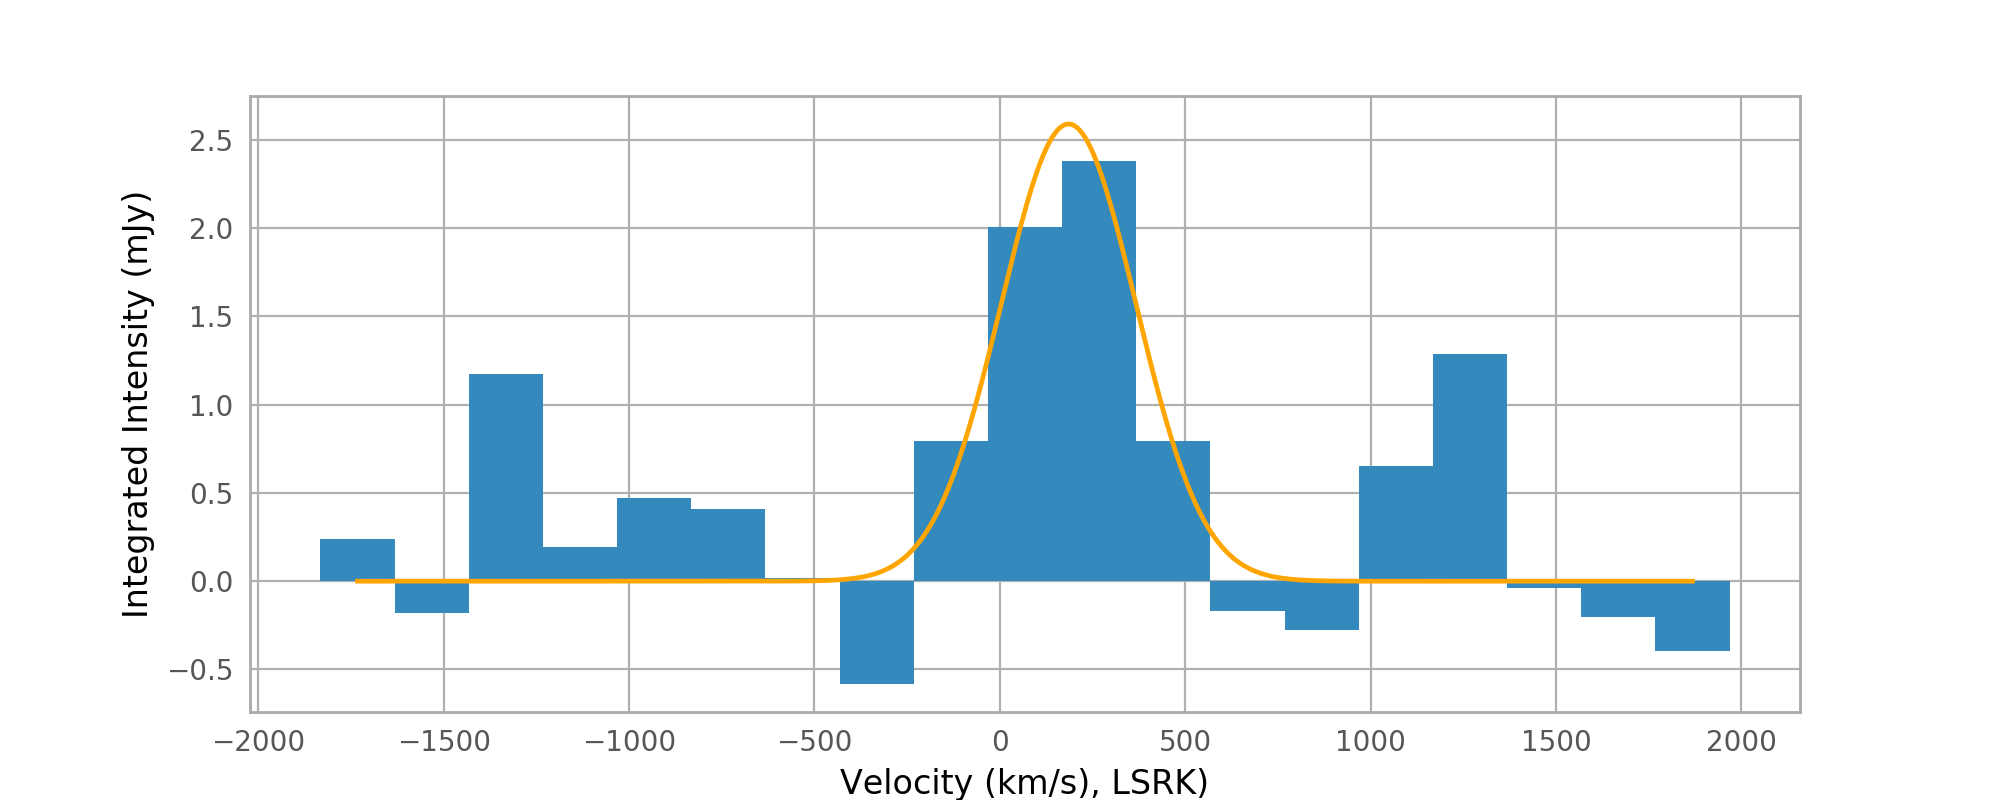

rmssigval: 0.001
chi-squared for one Gaussian: 0.389
chi-squared for two Gaussians: 0.526
using a two-gaussian fit: False
One-gaussian integrated flux: 1.180e+00 Jy km/s
Two-gaussian integrated flux: 1.197e+00 Jy km/s
hzmean (usetwog false): 178697559286.59818 Hz
area from calculation: 1.180e+00
uncertainty on area: 3.867e-01
RMS value: 0.000905695551286604
178697559286.59818 Hz
uncertainty on nuobs: 4.398e+01
1388.568451488384 Mpc
line luminosity: 1.081e+09
dnuobs, nuobs: 43.98479291895766, 178697559286.5982
uncertainty on line luminosity: 3.543e+08
uncertainty on gas mass: 4.168e+08
Gas mass: 1.272E+09


/Users/dee/Documents/ALMA/alma_reduction/co_masses.py:435: RuntimeWarning: invalid value encountered in sqrt
  stdmat = np.sqrt(cov)


In [9]:
# if you want twofiles, rechanfile=25km/s profile, specfile (1st arg)=rebinned with larger channels file
%matplotlib notebook
co.get_mom0_chans(txtfiles[1], 2, z=0.289071524357134, p0=[0.0005, 500, 50, 0], linefree=(0, 20), zvals=(0, 200), n_gauss=1, centmean=False, plot=1, p02=[0.01, 0.01, 0, 10, 50, 50, 0], centline=False, bounds=(np.array([0, 250, 0, 0]), np.array([0.01, 500, 500, 10])))


In [144]:
optfile = glob.glob('DES*.fits')[0]
momfile = glob.glob('*.mom0.fits')[1]
momfile

'cdfs1_150kms_rechan_full.bkg.mom0.fits'

<IPython.core.display.Javascript object>


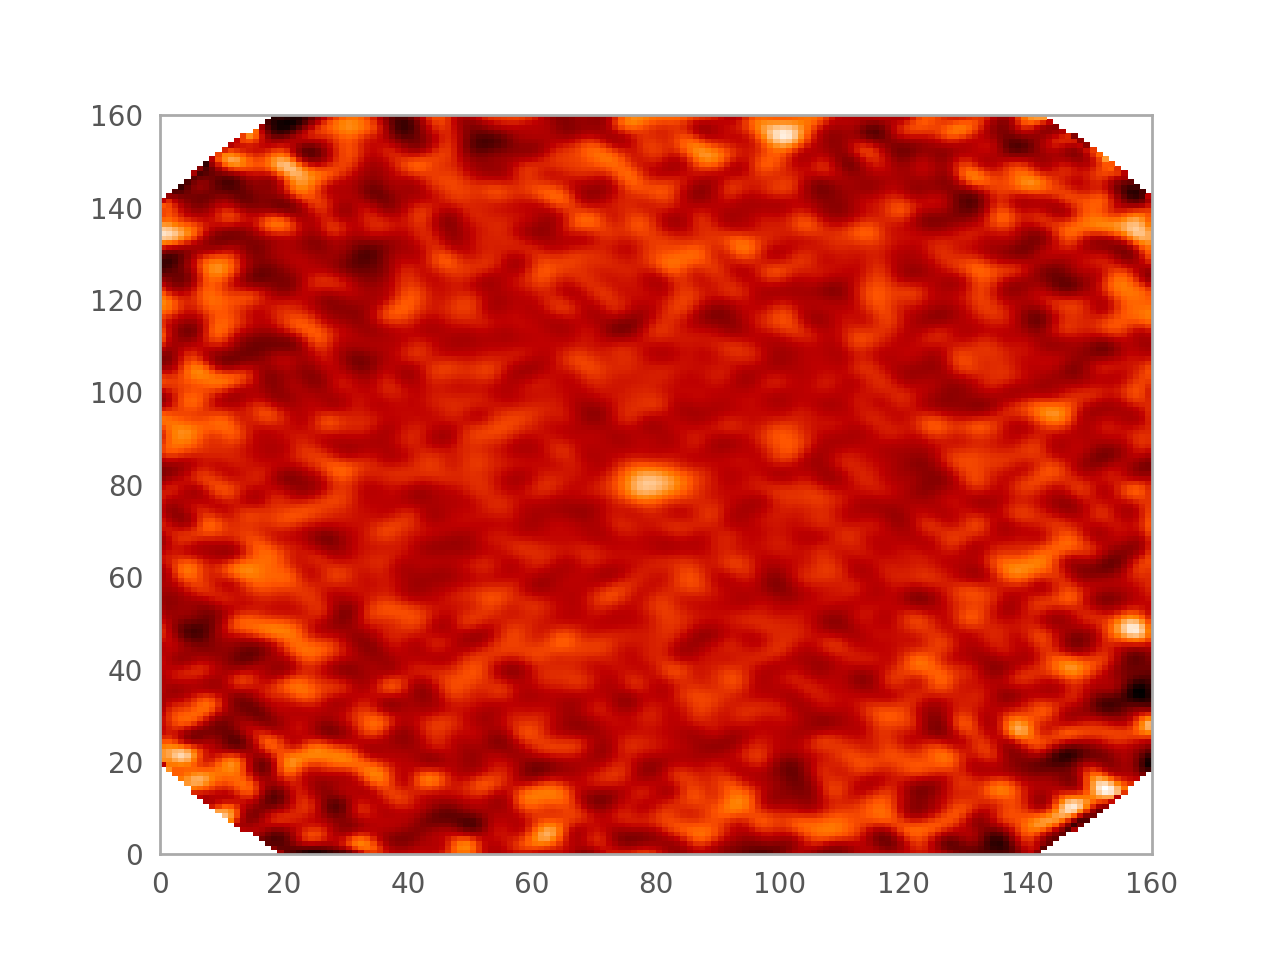

In [9]:
%matplotlib notebook

plt.pcolormesh(fits.open(fitsfiles[mom0idx])[0].data[0,0,:,:])

<IPython.core.display.Javascript object>


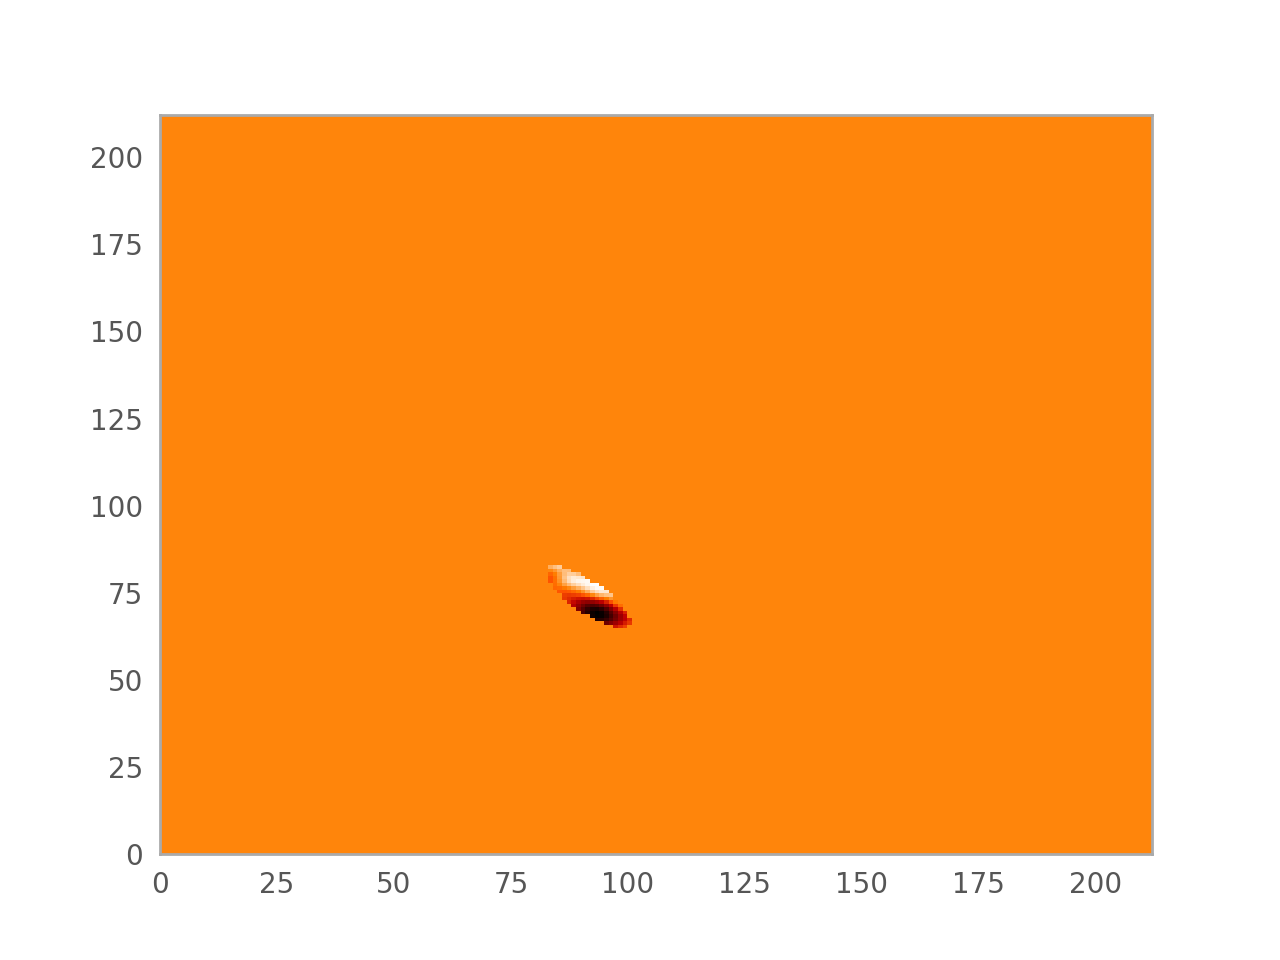

0.26691582203609243 0.41599113900767803


(0.26691582203609243,
 0.41599113900767803,
 91.15502227226882,
 73.34000665565652,
 array([90]),
 array([74]))

In [14]:
%matplotlib notebook
cutout = (85,105)
oop.find_SN_sigma(momfile, cutout, plot=True, rad=30, ycutout=(61,72))

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


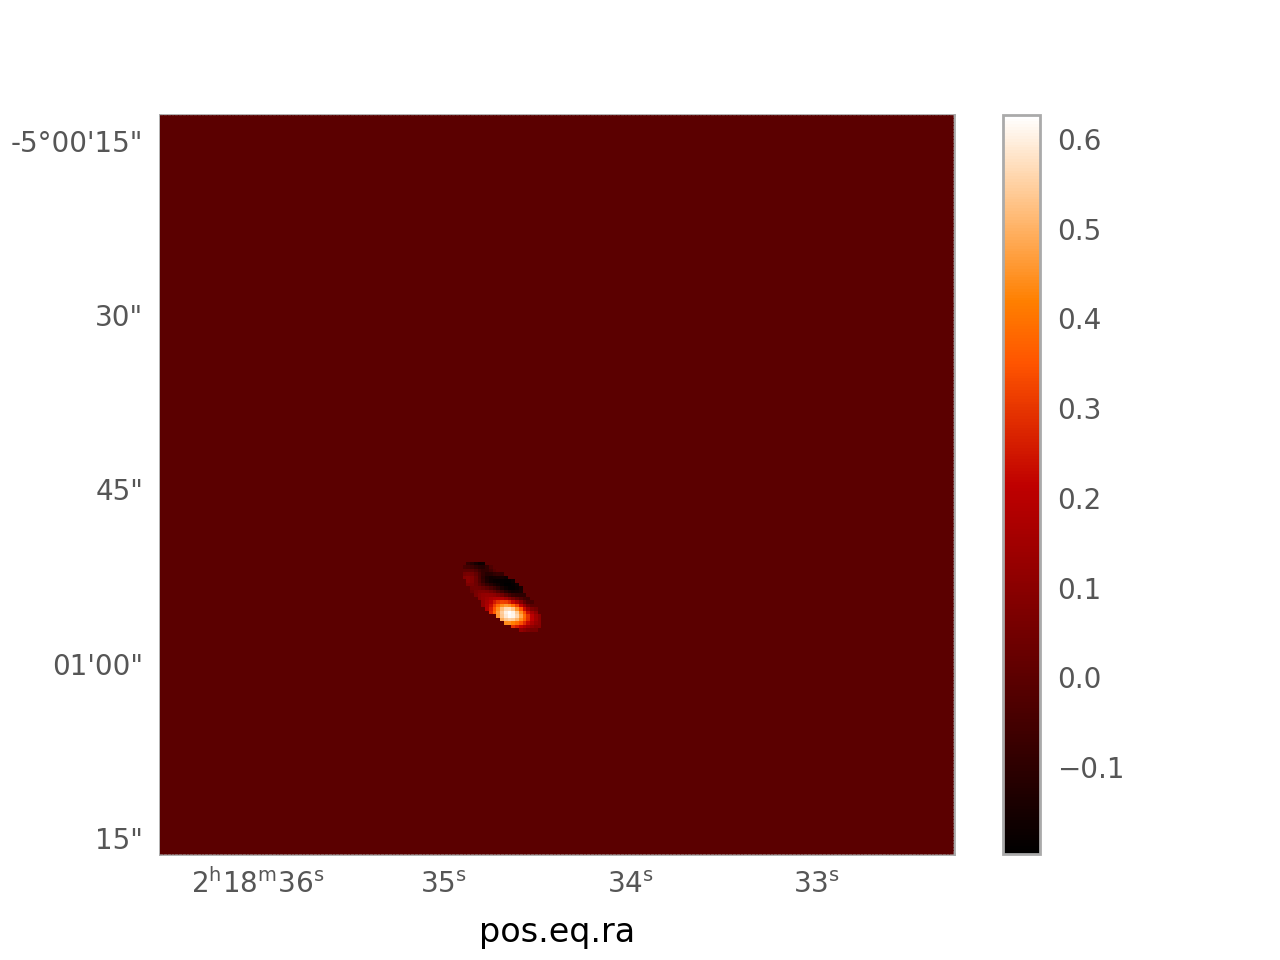

In [17]:
co.get_crtf(momfile, cutout, nstds=3, ycutout=(61,74))

In [1986]:
mom0prof = glob.glob('*.mom0region.specprof.txt')
mom0prof

['xmm1rechan.mom0region.specprof.txt',
 'xmm1_75kms_rechan_full.mom0region.specprof.txt',
 'xmm1_100kms_rechan_full.mom0region.specprof.txt',
 'xmm1_50kms_rechan_full.mom0region.specprof.txt',
 'xmm1_100kms_rechan.mom0region.specprof.txt']

In [112]:
txtfiles = glob.glob('*.beamregion.2sig.specprof.txt')
txtfiles
# for i in range(len(txtfiles)):
#     print("{} {}".format((i, txtfiles[i])))

['es110_150kms_rechan_bkg_143_102.beamregion.2sig.specprof.txt']

rmssigval: 0.001
chi-squared for one Gaussian: nan
chi-squared for two Gaussians: nan
using a two-gaussian fit: False
One-gaussian integrated flux: 1.099e+00 Jy km/s
Two-gaussian integrated flux: 1.228e+00 Jy km/s
hzmean (usetwog false): 178718525506.93958 Hz
area from calculation: 1.099e+00
uncertainty on area: 4.168e-01
RMS value: 0.0007704151768451429
178718525506.93958 Hz
uncertainty on nuobs: 5.347e+01
1388.568451488384 Mpc
line luminosity: 1.006e+09
dnuobs, nuobs: 53.46545377338151, 178718525506.93958
uncertainty on line luminosity: 3.817e+08
uncertainty on gas mass: 4.491e+08
gas mass: 1.184e+09


/Users/dee/Documents/ALMA/alma_reduction/co_masses.py:279: RuntimeWarning: invalid value encountered in double_scalars
  rmsval = np.sqrt(np.sum(obs[linefree[0]:linefree[1]] ** 2) / len(obs[linefree[0]:linefree[1]]))
/Users/dee/Documents/ALMA/alma_reduction/co_masses.py:435: RuntimeWarning: invalid value encountered in sqrt
  stdmat = np.sqrt(cov)


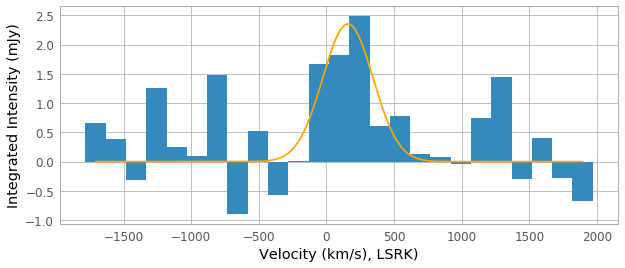

In [8]:
z=0.289071524357134
mgas,_ = co.get_M_gas_txt(txtfiles[0], z, [0.0005, 500, 50, 0], linefree=(0,10), n_gauss=1, center_mean=False, p02=[0.001, 0.001, 0, 500, 100, 50, 0])#, bounds=(np.array([0, -200, 100, -1]), np.array([0.004, 200, 1000, 1])))
print("gas mass: {:.3e}".format(mgas))

In [11]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/ES1/ES1-10')

# files[0]: momfile, files[1]: optfile, files[2]: mipsfile, files[3]: iracfile files[4]: specfile

files = (glob.glob('calibrated/*bkg*.fits')[0], glob.glob('calibrated/*DES*.fits')[0], 
         glob.glob('other_imaging/*M1*.fits')[0], glob.glob('other_imaging/*_I1_*.fits')[0],
        glob.glob('calibrated/*specprof.txt')[-2])
files

('calibrated/es110_150kms_rechan_full.bkg.mom0.fits',
 'calibrated/DESopticalES110.fits',
 'other_imaging/0001_9.76238000_-44.36451000_swire_ES1_M1_v4_mosaic.fits',
 'other_imaging/0001_9.76238000_-44.36451000_swire_ES1_I1_tile_2_1_v4_mosaic.fits',
 'calibrated/es110_150kms_rechan_bkg_143_102.beamregion.2sig.specprof.txt')

In [12]:
crtffiles = glob.glob('calibrated/*.crtf')
print(crtffiles)
regfile = crtffiles[2]

['calibrated/elliptical_mask_3sigma.crtf', 'calibrated/optregions.crtf', 'calibrated/beam_region_2sigma.crtf', 'calibrated/beam_region_3sigma.crtf']


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


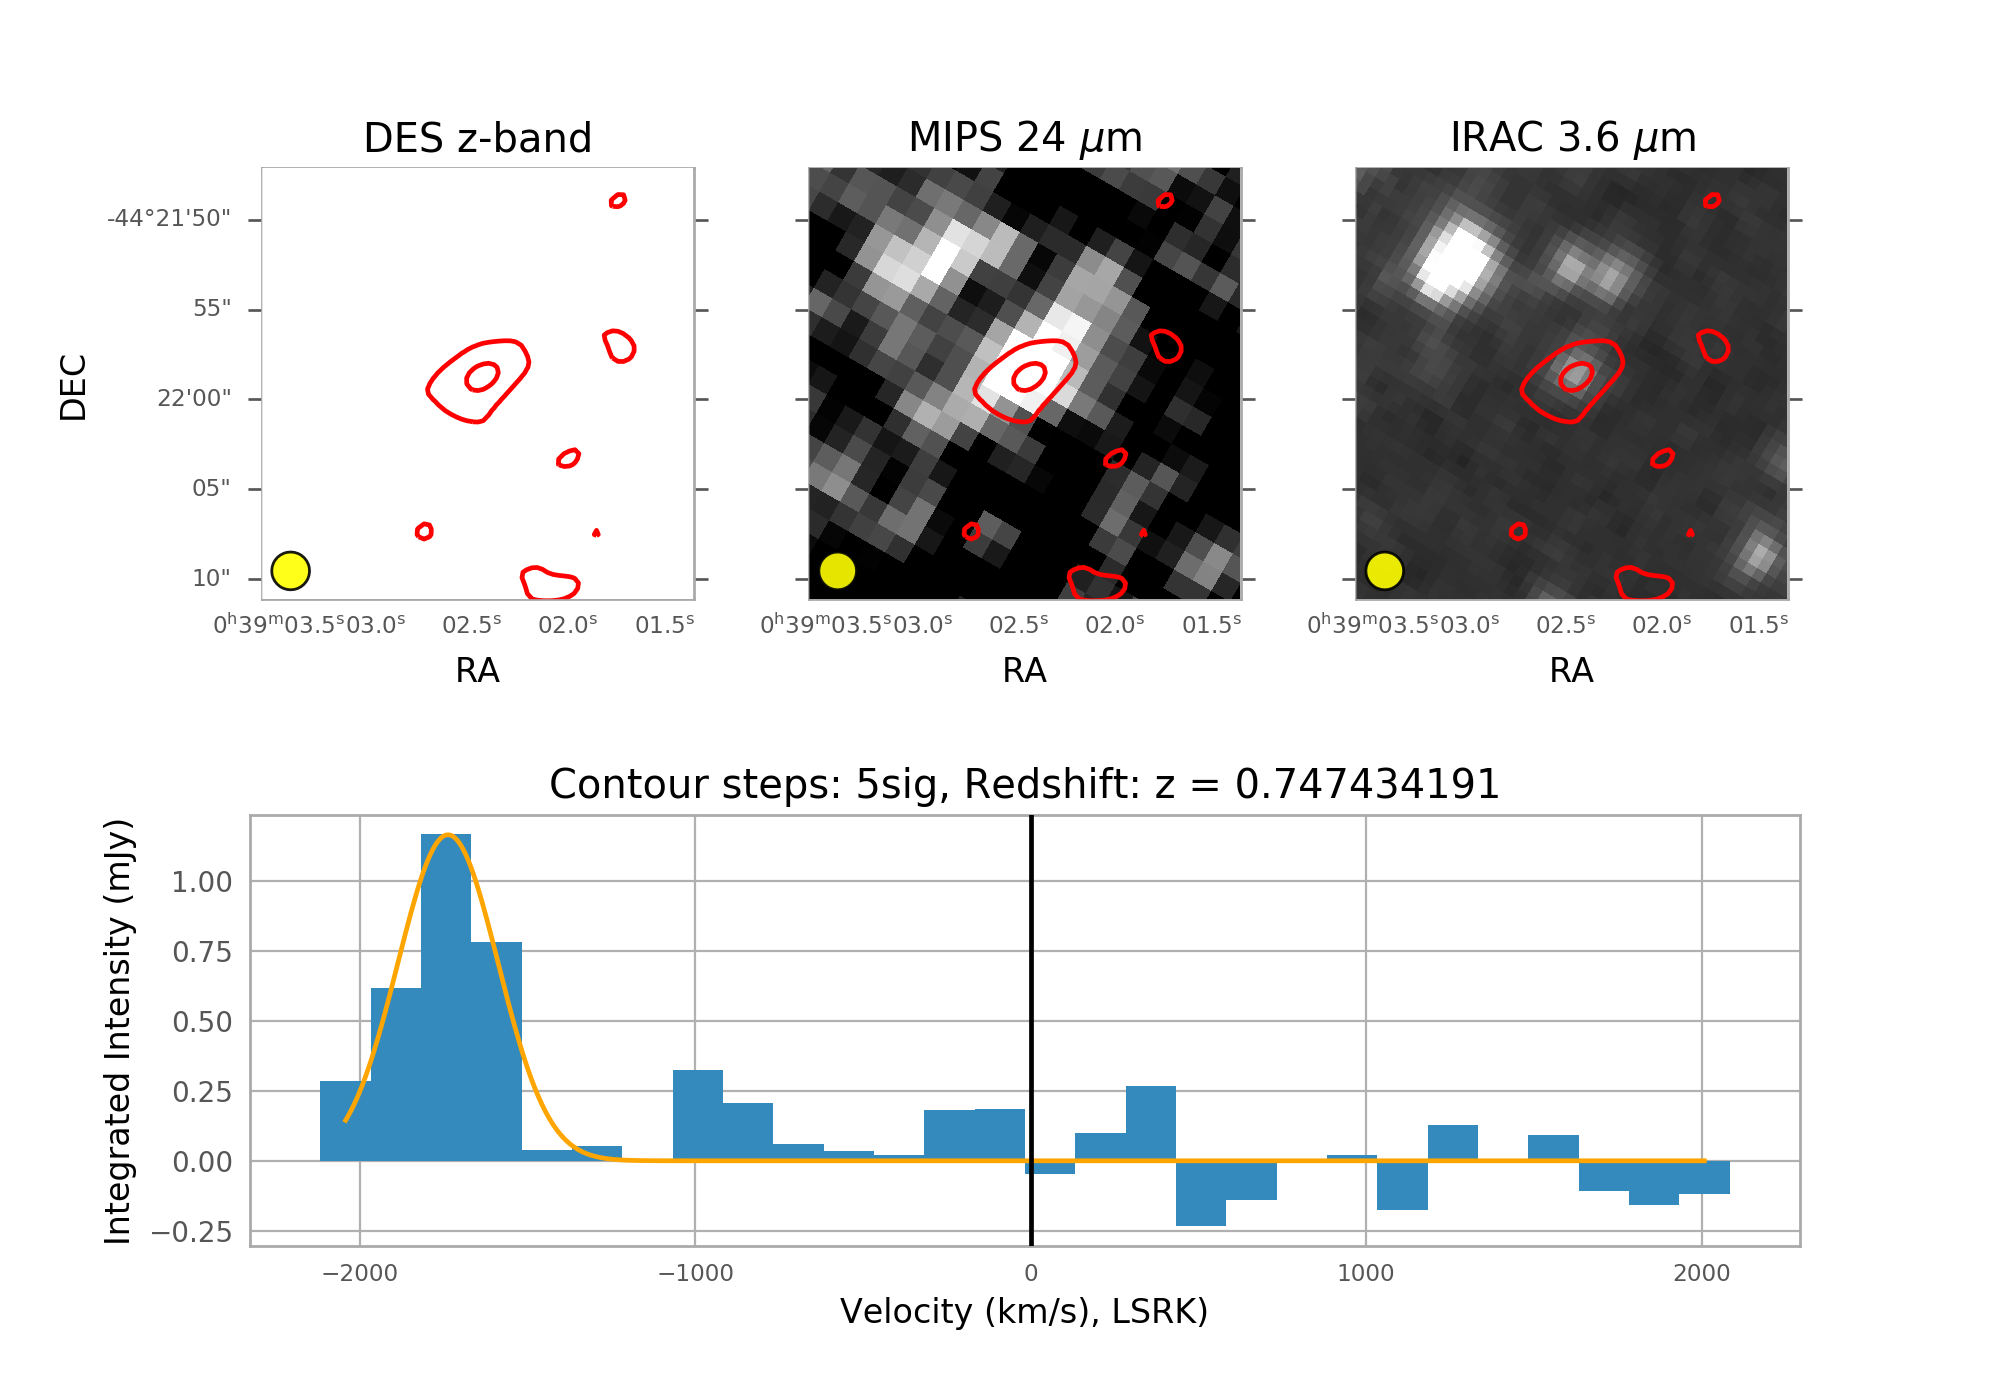

/Users/dee/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/dee/Documents/ALMA/alma_reduction/co_masses.py:279: RuntimeWarning: invalid value encountered in double_scalars
  rmsval = np.sqrt(np.sum(obs[linefree[0]:linefree[1]] ** 2) / len(obs[linefree[0]:linefree[1]]))


In [13]:
datlist = oop.make_stamp_array(files, cutout, 40, z=0.747434191, optext=(1,200), mipsext=(0, 0.2), iracext=(0, 0.4),
                           startstds=2, step=5, p0=[0.003, -1500, 100, 0], n_gauss=1, std=1.1895e-01, 
                           SN=8.47330811265237e+00, xcentpass=143, ycentpass=102,
                           p02=[0.003, 0.003, -100, 100, 100, 100, 0], centmean=False)#, crtf=regfile)#, whole_image=True)#,#, max_scale=44)
#                            bounds=(np.array([0, -200, 0, -1]), np.array([0.004, 200, 1000, 1])))

# CONTOURS ON RGB IMAGE

In [299]:
import tifffile as tif

In [409]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/CDFS/CDFS-2')
fitsfiles = glob.glob('calibrated/*mom0.fits')
fitsfiles

['calibrated/cdfs2rechan.mom0.fits',
 'calibrated/cdfs2cube.pbcor.mom0.fits',
 'calibrated/cdfs2rechan.fromspec.mom0.fits']

In [410]:
contfile = fitsfiles[2]

In [406]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/CDFS/CDFS-2')
files = glob.glob('DECam_CDFS-2/stiff.tif')
files

['DECam_CDFS-2/stiff.tif']

In [407]:
rgbfile = files[0]

<IPython.core.display.Javascript object>


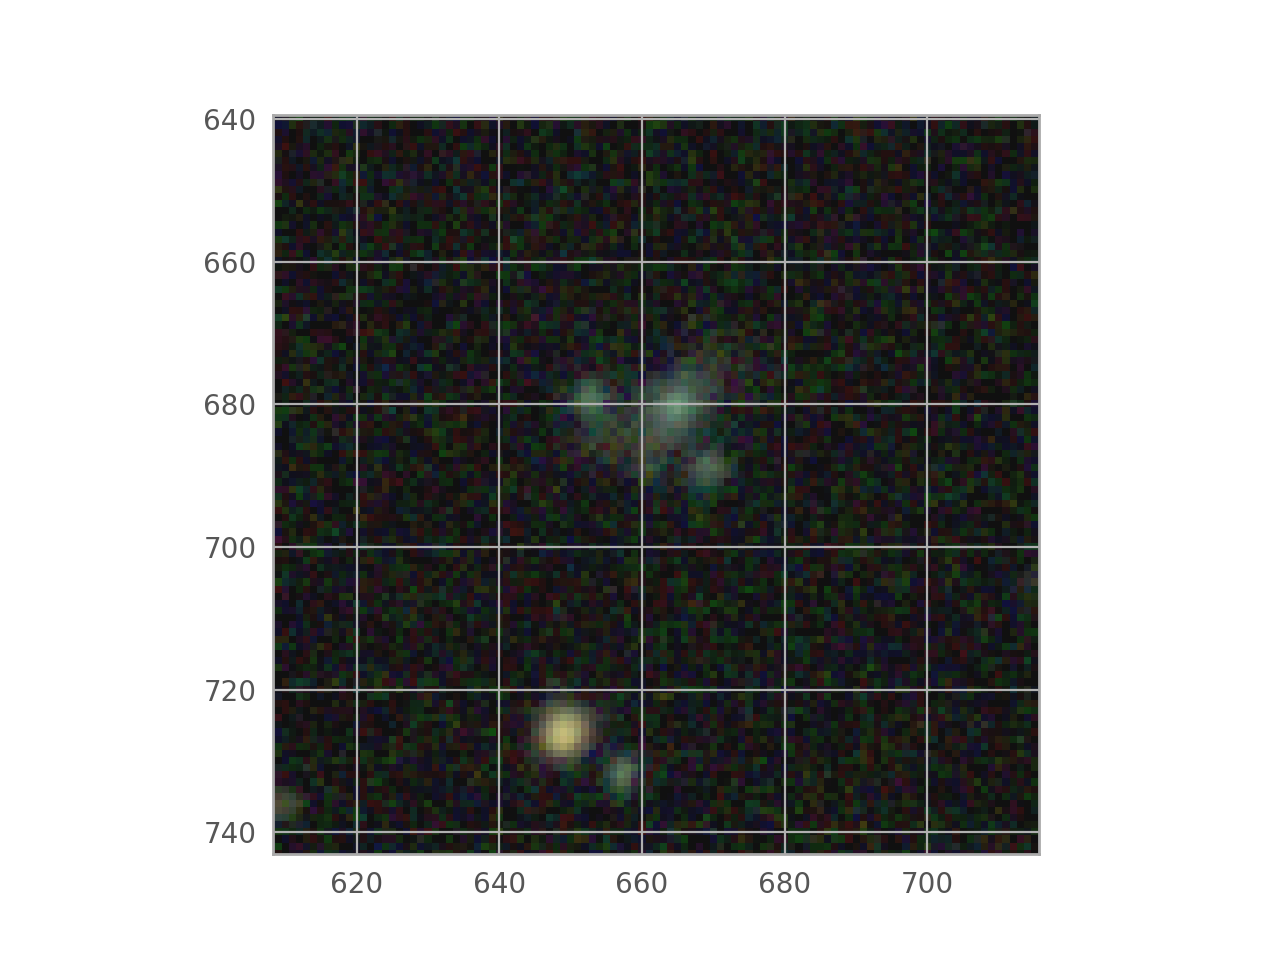

In [375]:
%matplotlib notebook
plt.imshow(tif.imread(rgbfile))

In [430]:
mom_cutout = (70, 110)
max_stds = 50
startstds = 2
step = 5
momstd, momSN, xcent, ycent, xpeak, ypeak = oop.find_SN_sigma(contfile, mom_cutout)
levels = np.ones((max_stds - startstds)//step)*momstd
stds = np.arange(startstds, max_stds, step=step)*momstd
levels = stds

0.09748570003391377 27.90216917282931


In [412]:
rgbdata = tif.imread(rgbfile)
rgbcut = rgbdata[560:815, 563:812, :]

print(rgbdata.shape)

# rgbadd = np.zeros((1376, 1380, 3))
# rgbadd[:,5:,:] = rgbdata

(893, 1150, 3)


In [434]:
opthdr = fits.open('DECam_CDFS-2/r.resamp.fits')[0]
opthdr.header['CD2_2'] = -opthdr.header['CD2_2']
opthdr.header['CRPIX1'] = opthdr.header['CRPIX1'] - 26
opthdr.header['CRPIX2'] = opthdr.header['CRPIX2'] - 3
optwcs = wcs.WCS(opthdr)

<IPython.core.display.Javascript object>


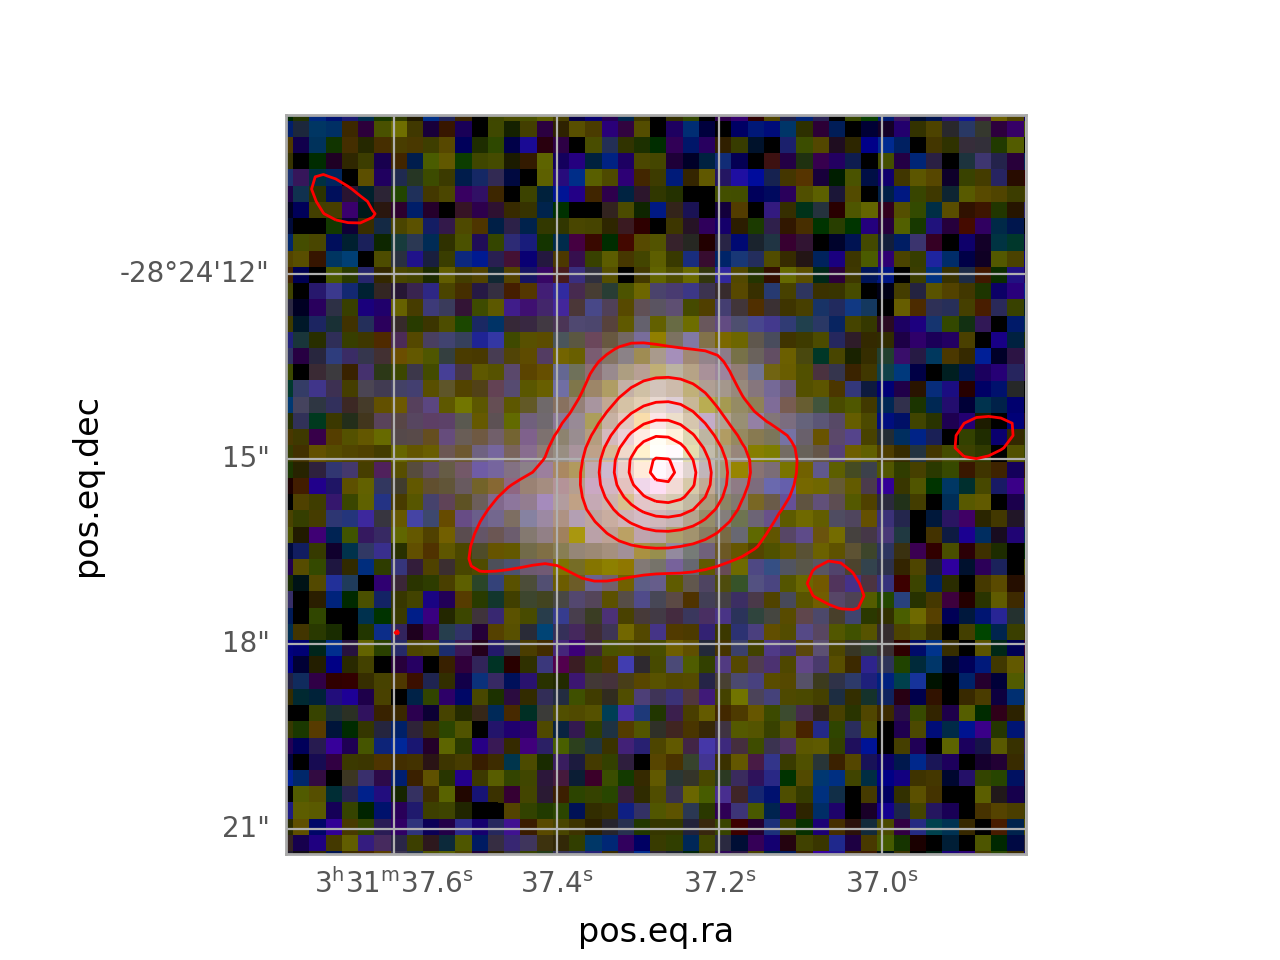

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


(60, 120)

In [435]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = wcs.WCS(fits.open(contfile)[0].header).sub(['celestial']))
ax.contour(fits.open(contfile)[0].data[0,0,:,:], levels=levels, colors='red', zorder=20, linewidths=1)

opttrans = ax.get_transform(optwcs)

plt.imshow(rgbdata, transform=opttrans)

plt.xlim(60,120)
plt.ylim(60,120)

## Make contours in S/N sigma:

In [188]:
# XMM-3
os.chdir('../')

0.12343295262264956 7.564099025849199
[0.24686591 0.37029886 0.49373181 0.61716476 0.74059772 0.86403067
 0.98746362 1.11089657 1.23432953 1.35776248 1.48119543 1.60462838
 1.72806134 1.85149429 1.97492724 2.09836019 2.22179315 2.3452261
 2.46865905 2.59209201 2.71552496 2.83895791 2.96239086 3.08582382
 3.20925677 3.33268972 3.45612267 3.57955563 3.70298858 3.82642153
 3.94985448 4.07328744 4.19672039 4.32015334 4.44358629 4.56701925
 4.6904522  4.81388515 4.9373181  5.06075106 5.18418401 5.30761696
 5.43104992 5.55448287 5.67791582 5.80134877 5.92478173 6.04821468]


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


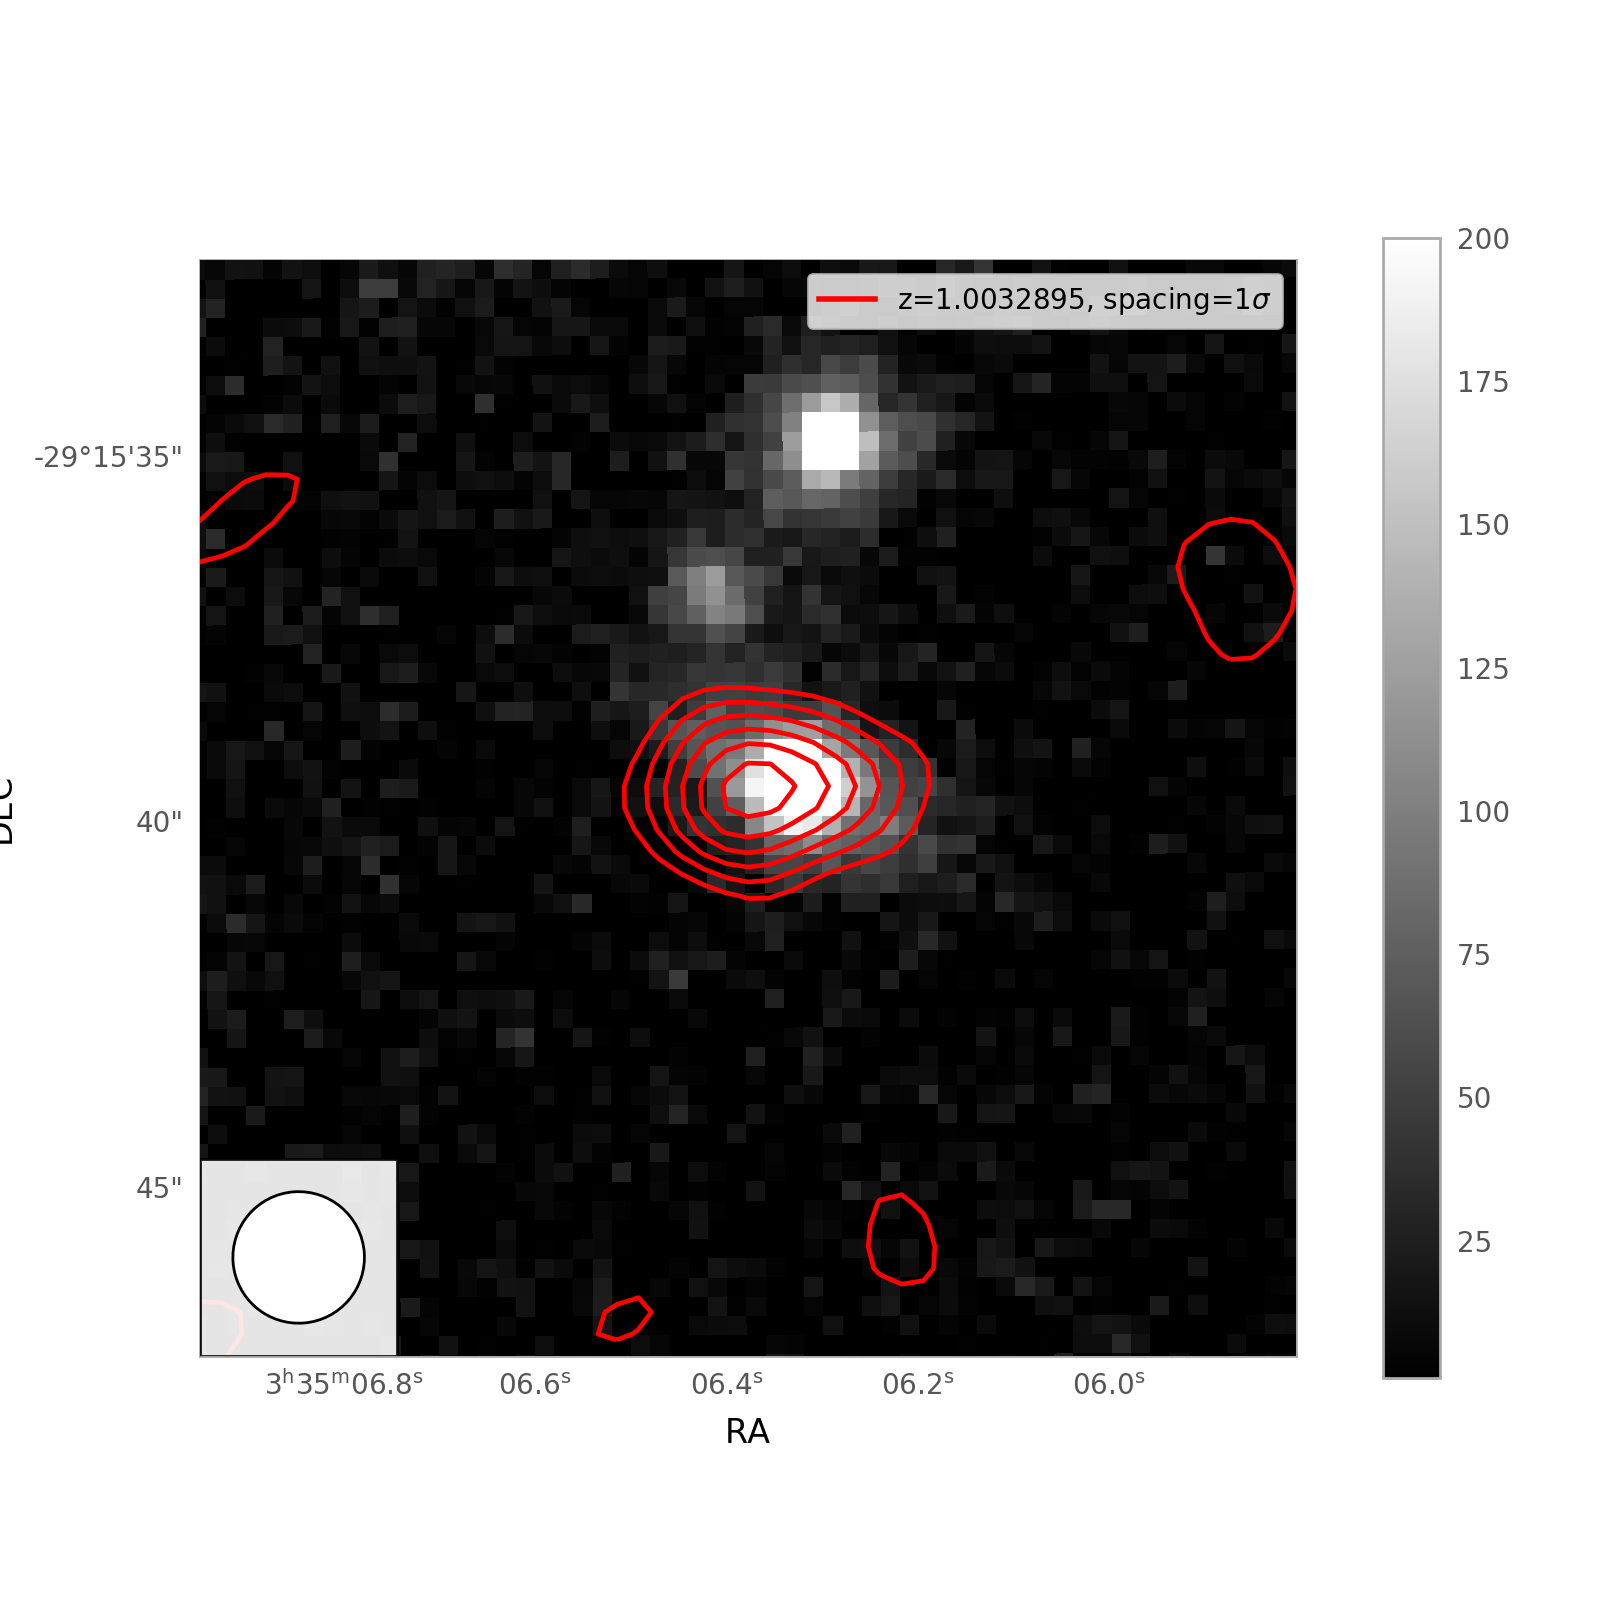

In [10]:
# CDFS-2
cutout=(60,100)
%matplotlib notebook
# ((optical file, moment file), vmin, vmax, (xcutout), (ycutout))
oop.plot_contour_overlay((fitsfiles[optidx], fitsfiles[mom0idx]), 1, 200, cutout, 25, 
                         step=1, inputfreq='z='+str(z), max_stds=50, startsig=2)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


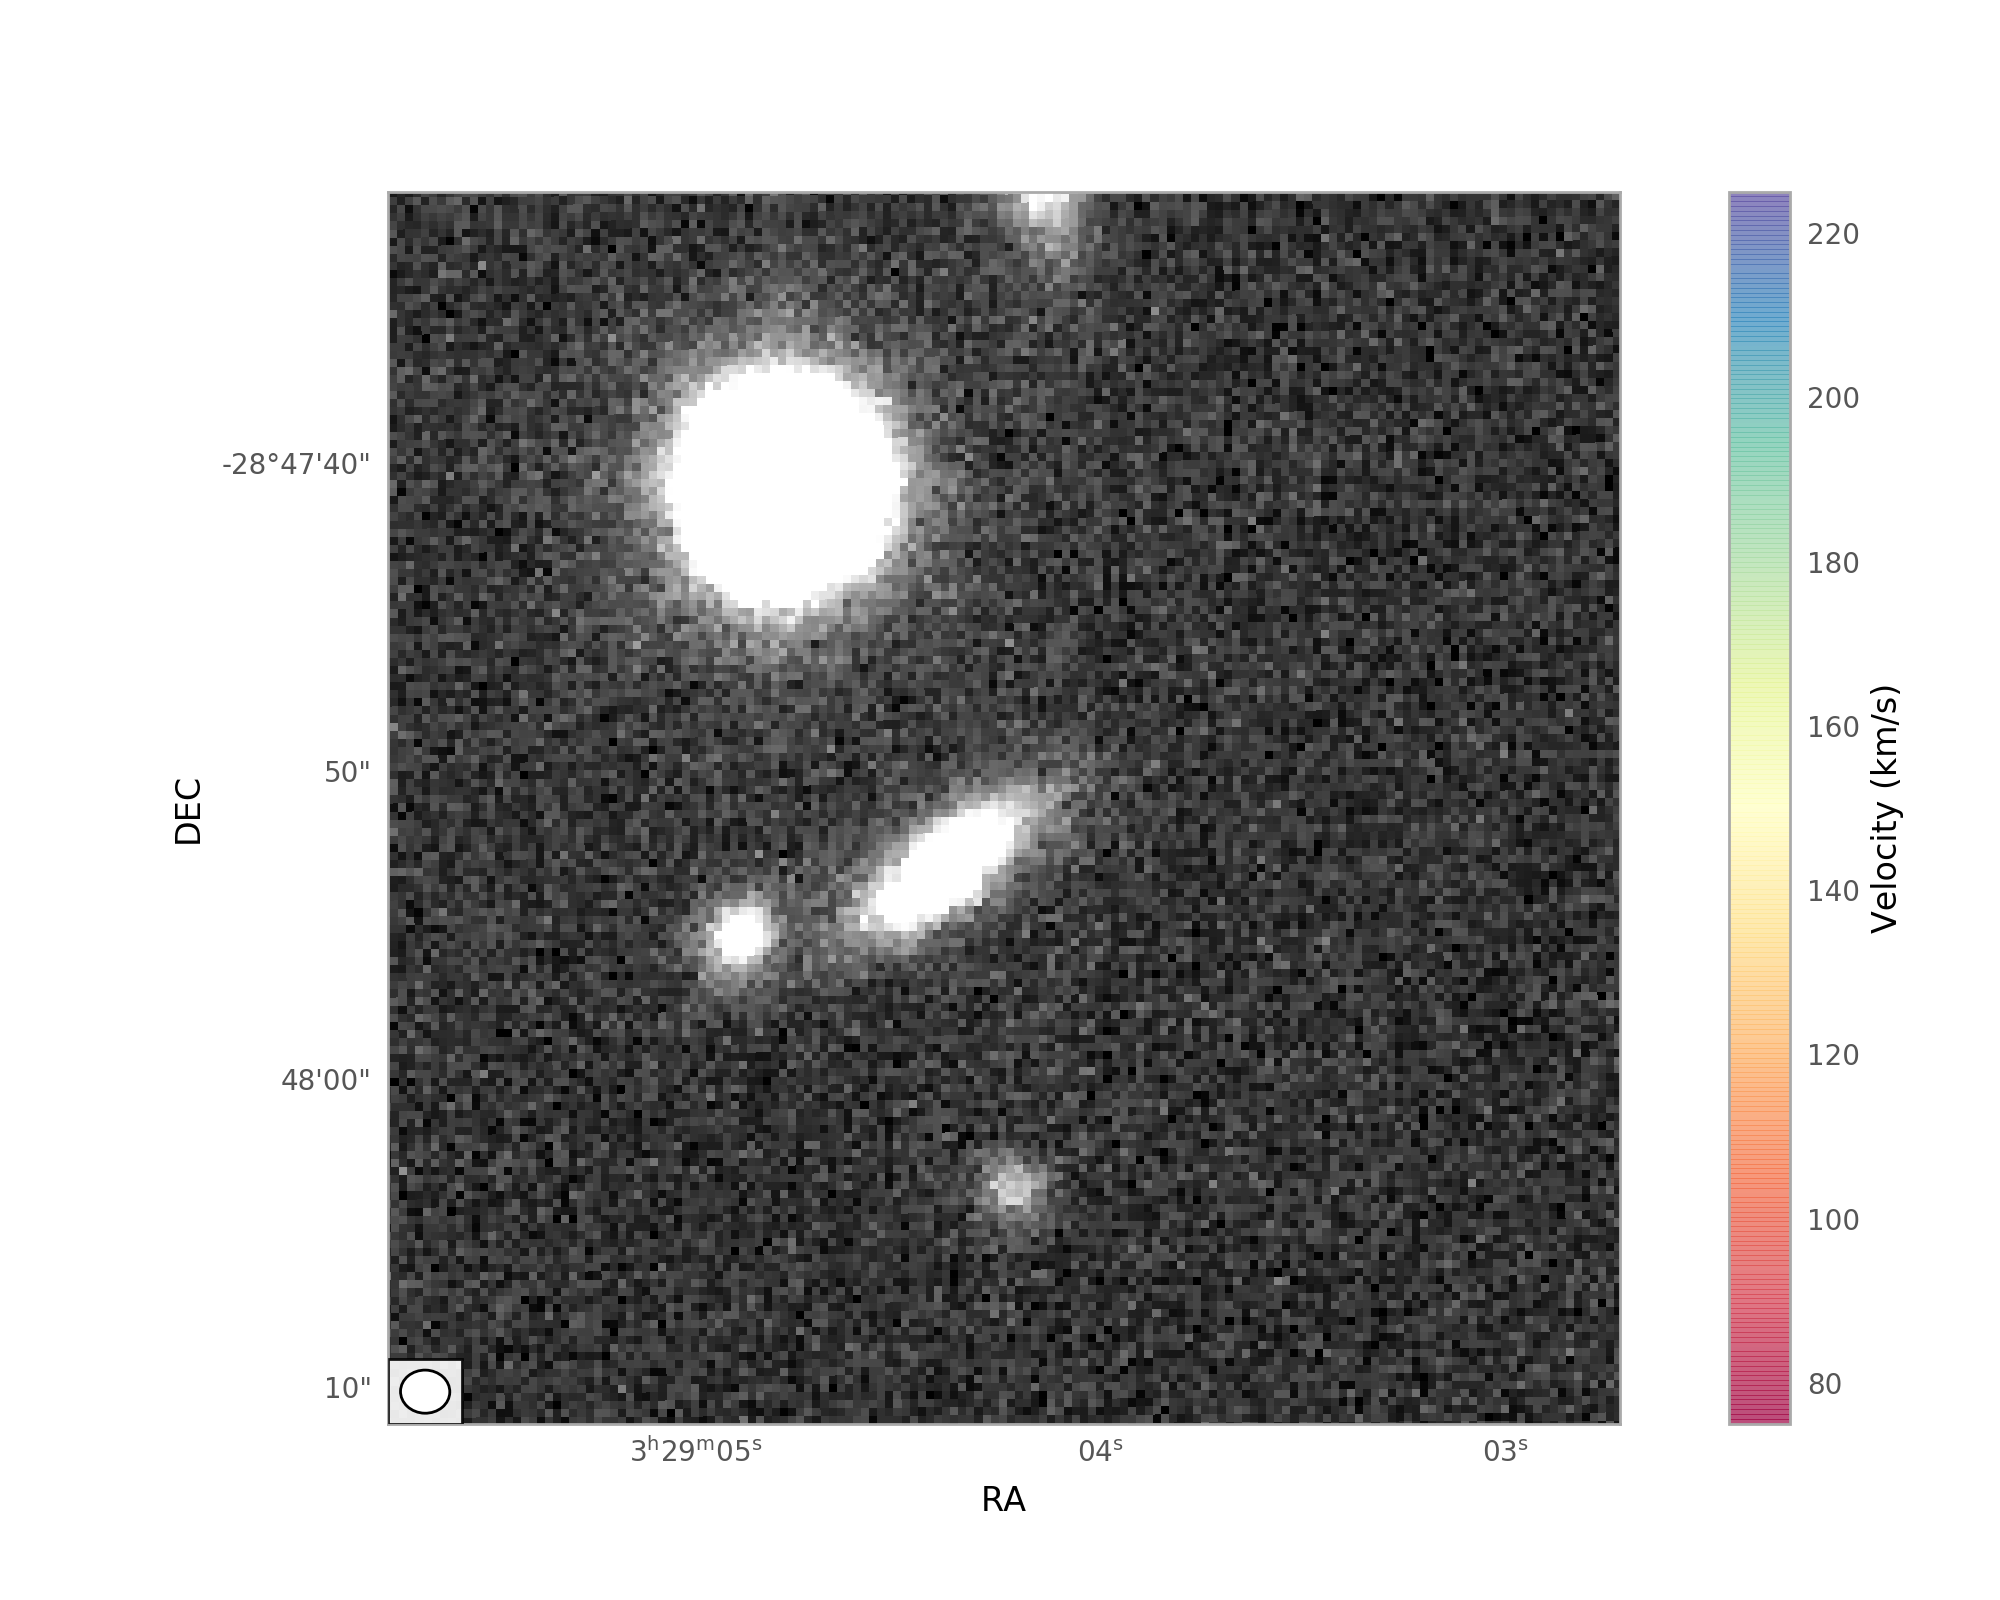

In [13]:
%matplotlib notebook
oop.plot_velocity_overlay((fitsfiles[optidx], fitsfiles[mom1idx]), 1300, 1500, (0,200), (0,200), 
                          alpha=0.7, vmin=75, vmax=225)


# SOURCE SEARCH ALGORITHM

In [2]:
from photutils import detect_sources, source_properties
#ref: https://photutils.readthedocs.io/en/stable/api/photutils.segmentation.SourceProperties.html#photutils.segmentation.SourceProperties
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import ListedColormap
from astropy.visualization import astropy_mpl_style
from astropy.convolution import Tophat2DKernel
from astropy.modeling.functional_models import Ellipse2D
from math import floor
plt.style.use(astropy_mpl_style)
import astropy.units as u
    

In [155]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/')

nodec = [glob.glob('XMM/XMM-4/calibrated/*100kms_rechan.fits')[0], glob.glob('ES1/ES1-5/calibrated/*100kms_rechan.fits')[0],
        glob.glob('CDFS/CDFS-6/calibrated/*100kms_rechan.fits')[0], glob.glob('CDFS/CDFS-9/calibrated/*100kms_rechan.fits')[0],
        glob.glob('CDFS/CDFS-10/calibrated/*100kms_rechan.fits')[0]]
nodec

# xmm5_cubefiles = glob.glob("*.fits")

# xmm5_cubehduls = []
# for i,file in enumerate(xmm5_cubefiles):
#     with fits.open(file) as hdulist:
#         xmm5_cubehduls.append(hdulist)
#         print("{} {}".format(i, file))

['XMM/XMM-4/calibrated/xmm4_100kms_rechan.fits',
 'ES1/ES1-5/calibrated/es15_100kms_rechan.fits',
 'CDFS/CDFS-6/calibrated/cdfs6_100kms_rechan.fits',
 'CDFS/CDFS-9/calibrated/cdfs9_100kms_rechan.fits',
 'CDFS/CDFS-10/calibrated/cdfs10_100kms_rechan.fits']

In [156]:
dec = ['CDFS/CDFS-2/calibrated/cdfs2rechan.fits', 'CDFS/CDFS-11/calibrated/cdfs11rechan.fits']
dec

['CDFS/CDFS-2/calibrated/cdfs2rechan.fits',
 'CDFS/CDFS-11/calibrated/cdfs11rechan.fits']

In [14]:
checkfiles = ['CDFS/CDFS-2/calibrated/cdfs2rechan.stackcheck.specprof.txt', 
             'CDFS/CDFS-11/calibrated/cdfs11rechan.stackcheck.specprof.txt']

In [15]:
with open(checkfiles[0]) as file:
    specprof = np.genfromtxt(file)
vel2, flux2 = specprof[:, 0], specprof[:, 1]
cent2 = len(vel2) // 2
min2, max2 = cent2 - 20, cent2 + 20
flux2 = flux2[min2:max2]

with open(checkfiles[1]) as file:
    specprof= np.genfromtxt(file)
vel11, flux11 = specprof[:, 0], specprof[:, 1]
cent11 = len(vel11) // 2
min11, max11 = cent11 - 20, cent11 + 20
flux11 = flux11[min11:max11]

avgflux = np.mean((flux2, flux11), axis=0)

<IPython.core.display.Javascript object>


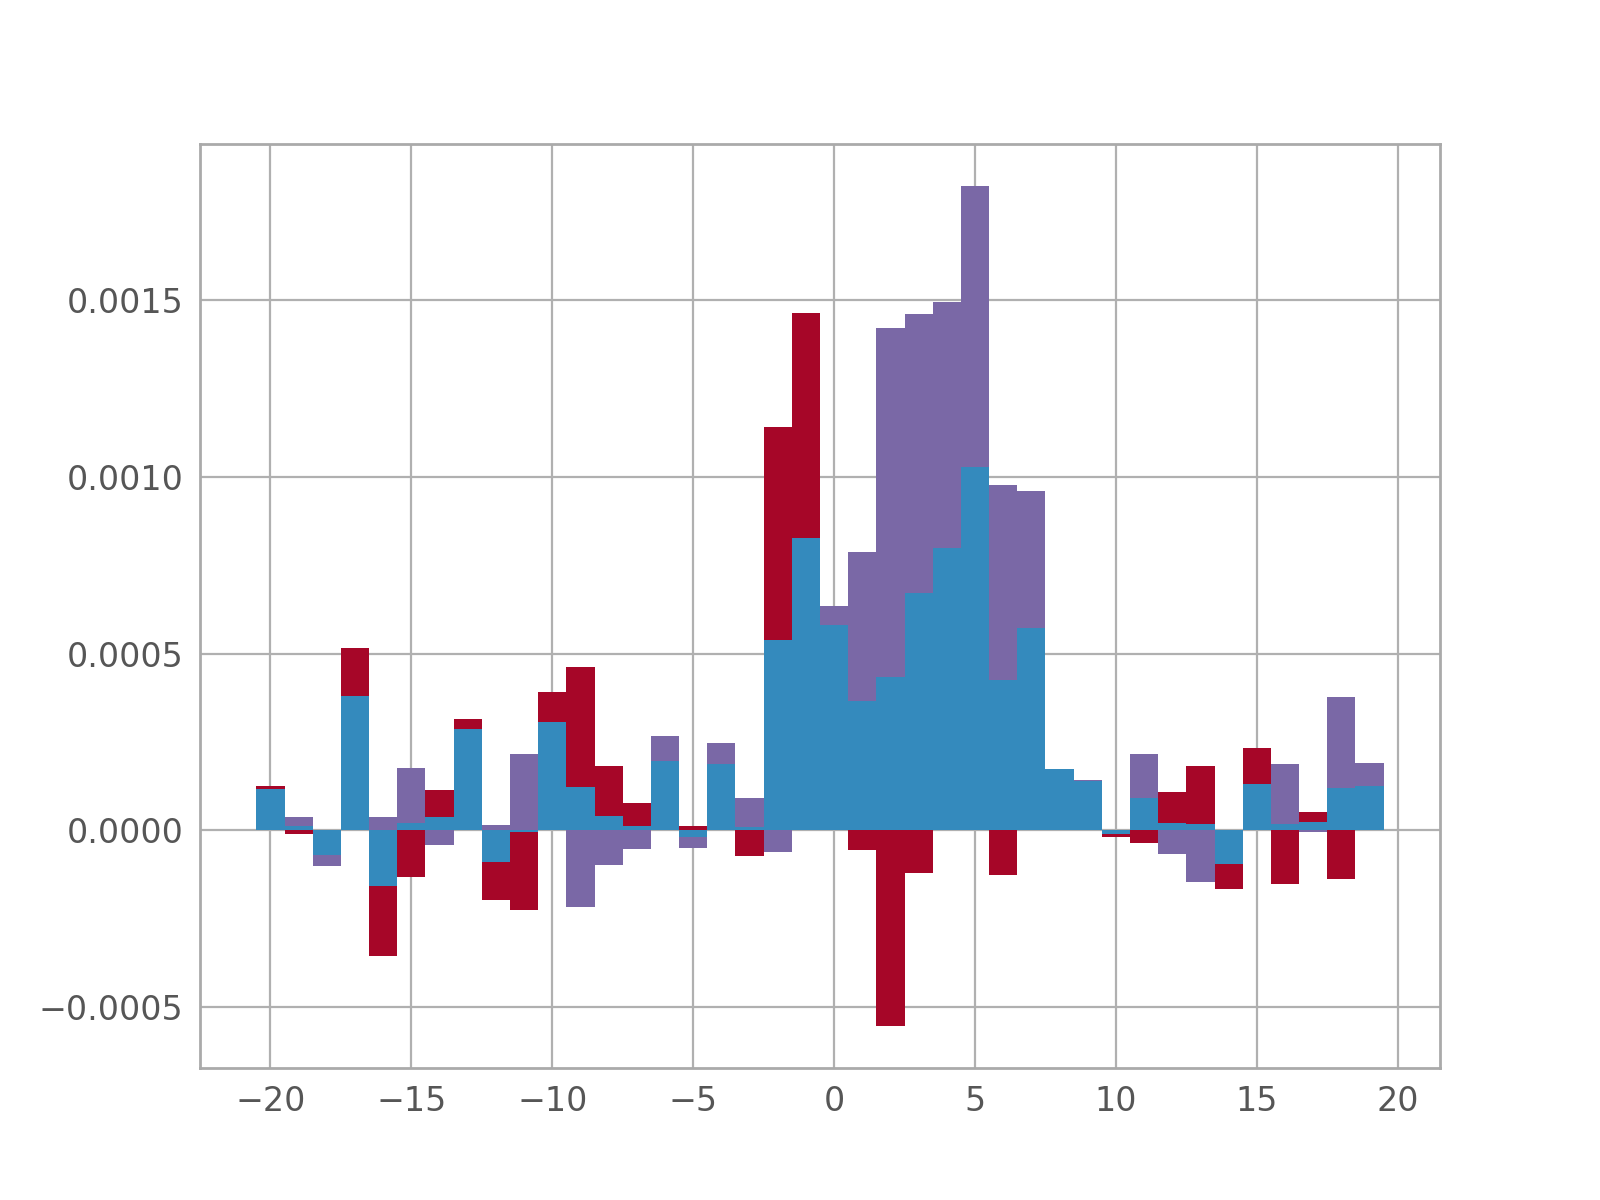

<BarContainer object of 40 artists>

In [16]:
%matplotlib notebook

plt.bar(np.arange(-20, 20), avgflux, width=1, zorder=10)
plt.bar(np.arange(-20, 20), flux2, width=1)
plt.bar(np.arange(-20, 20), flux11, width=1)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


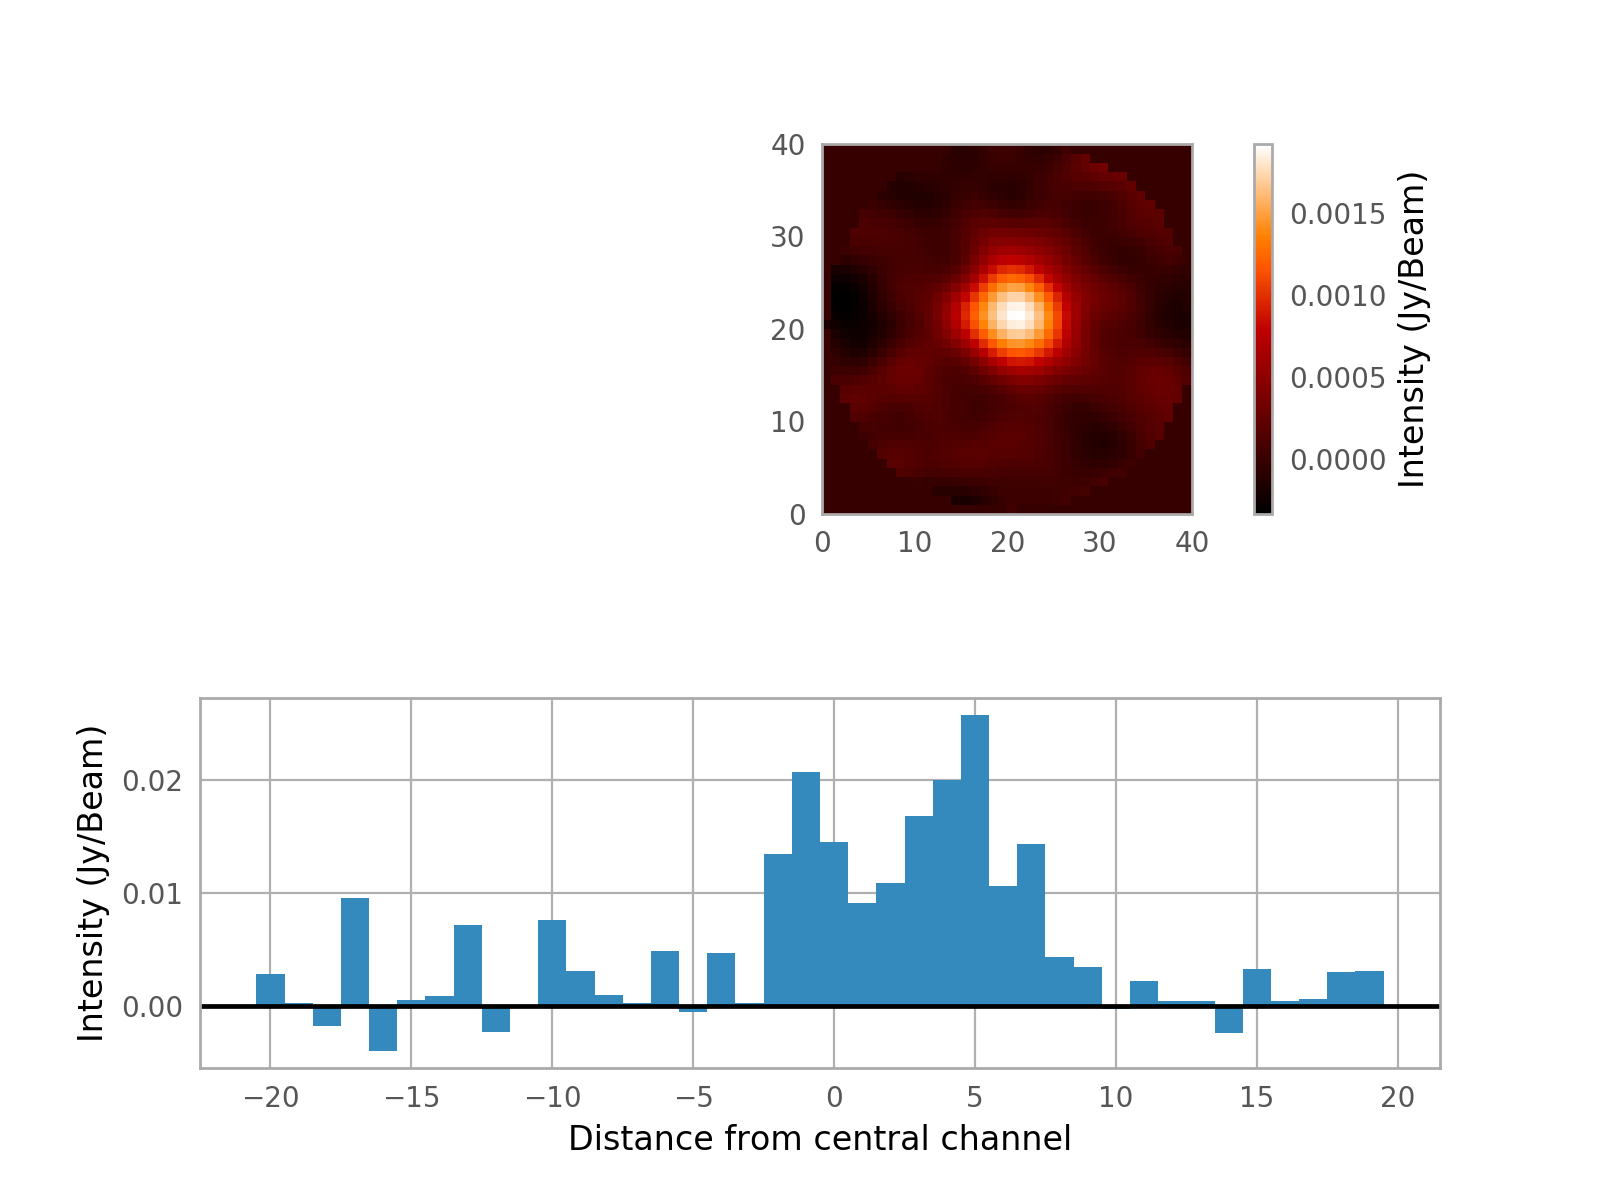

In [157]:
%matplotlib notebook
# (files, nchans, rwindow, profonly=False, imonly=False, sigma=None)
_, myavgflux = ss.image_stack(dec, 40, 20);

<IPython.core.display.Javascript object>


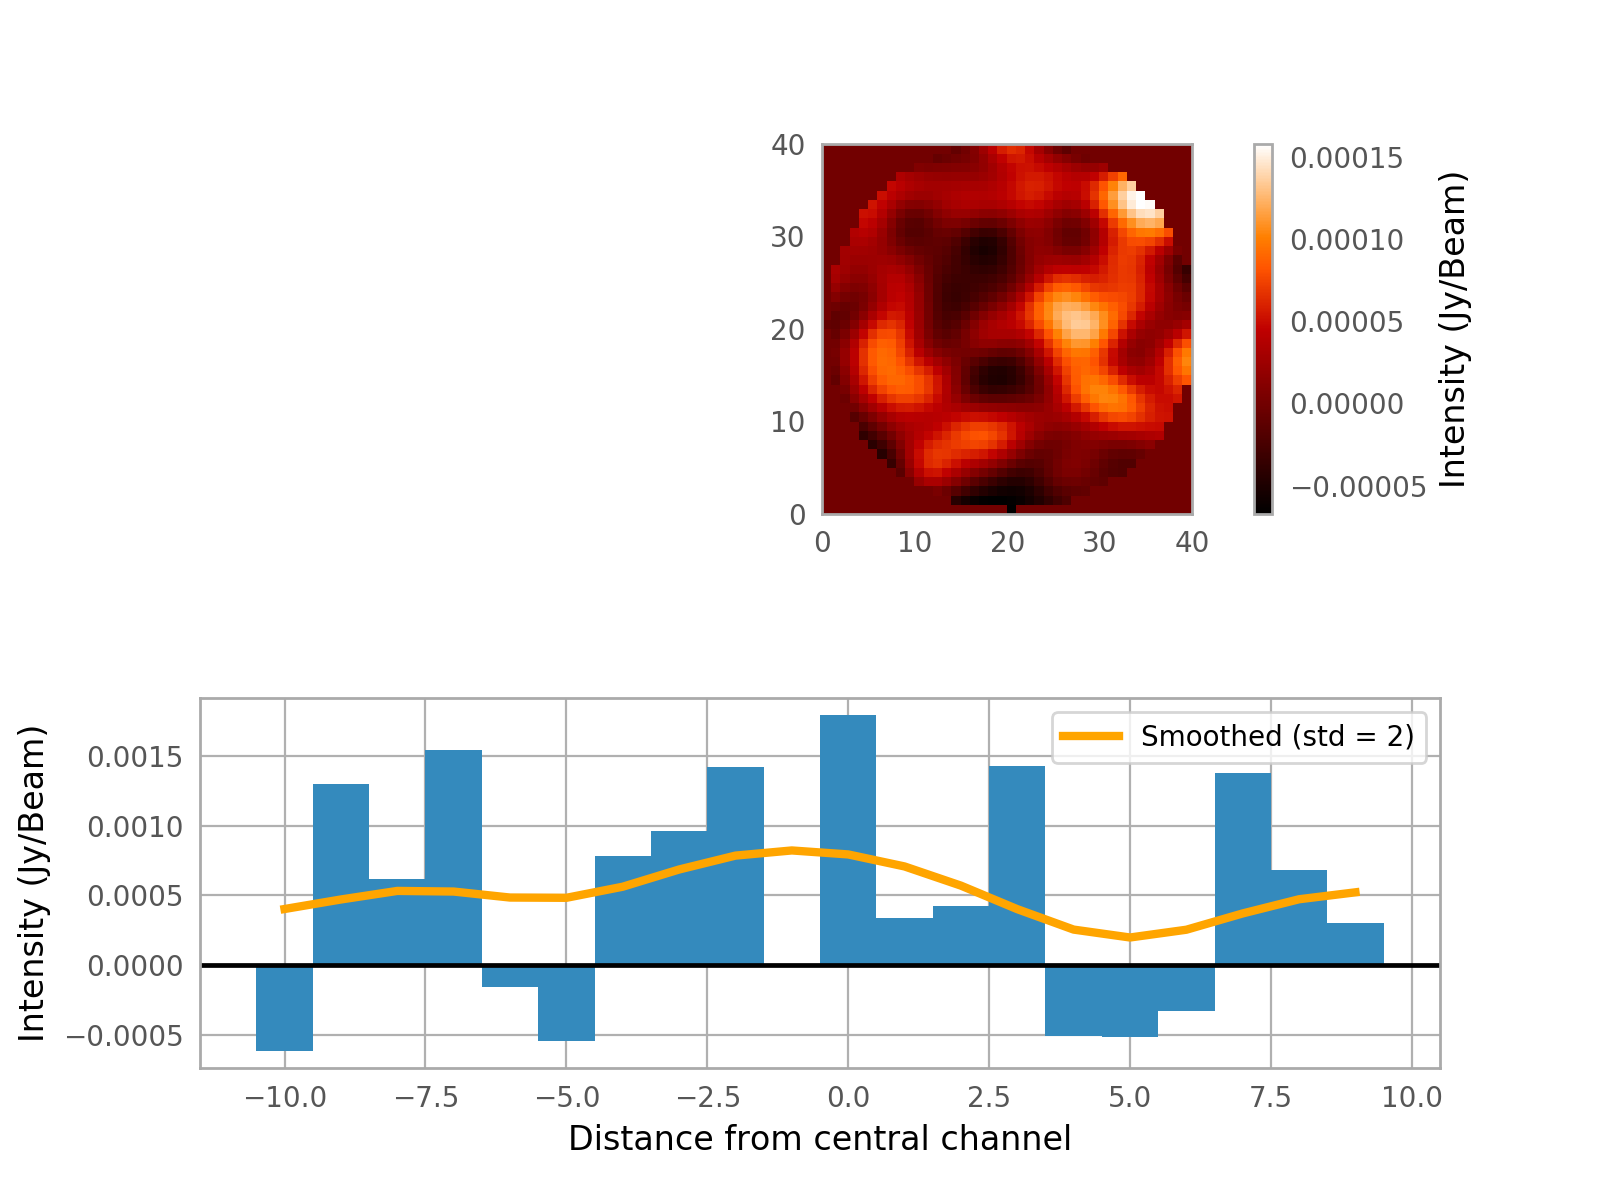

In [9]:
%matplotlib notebook

nodecim, nodecprof = ss.image_stack(nodec, 20, 20, sigma=2)

In [7]:
stackcentarr = [(40, 40), (40, 80), (80, 40), (120, 120), (80, 120)]

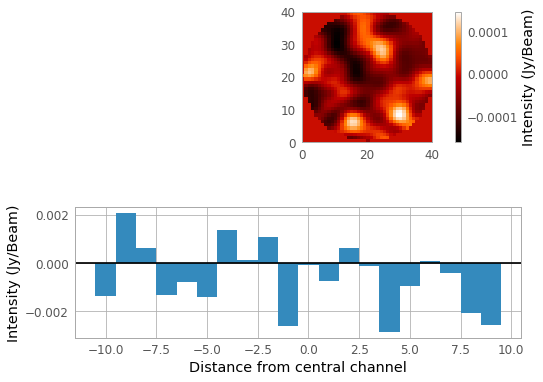

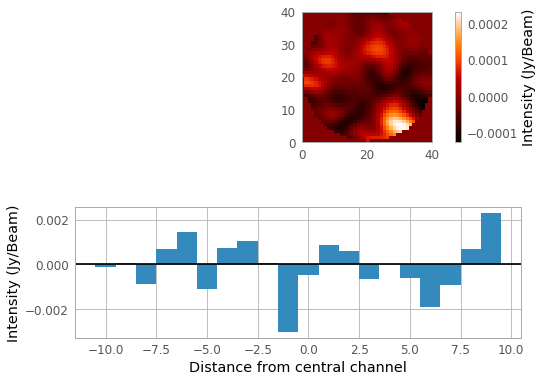

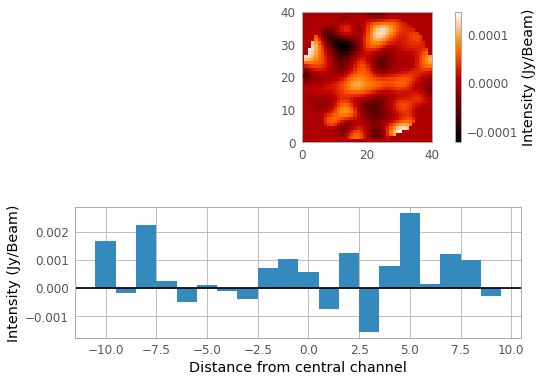

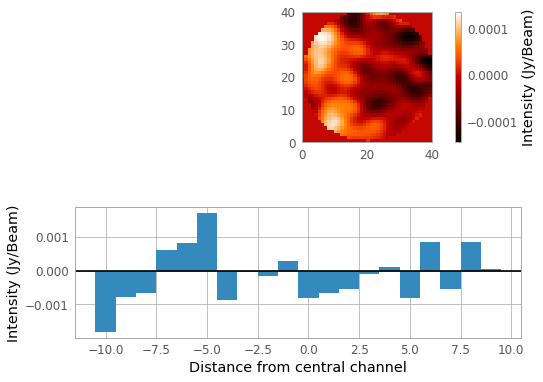

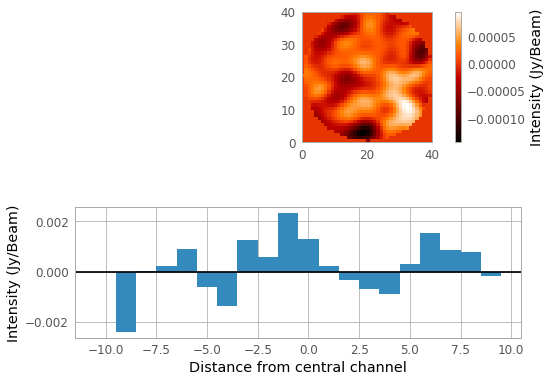

In [8]:
imlist = []
proflist = []
for scent in stackcentarr:
    im, prof = ss.image_stack(nodec, 20, 20, stackcenter=scent)
    imlist.append(im)
    proflist.append(prof)


In [13]:
i=2
i // 3

0

<IPython.core.display.Javascript object>


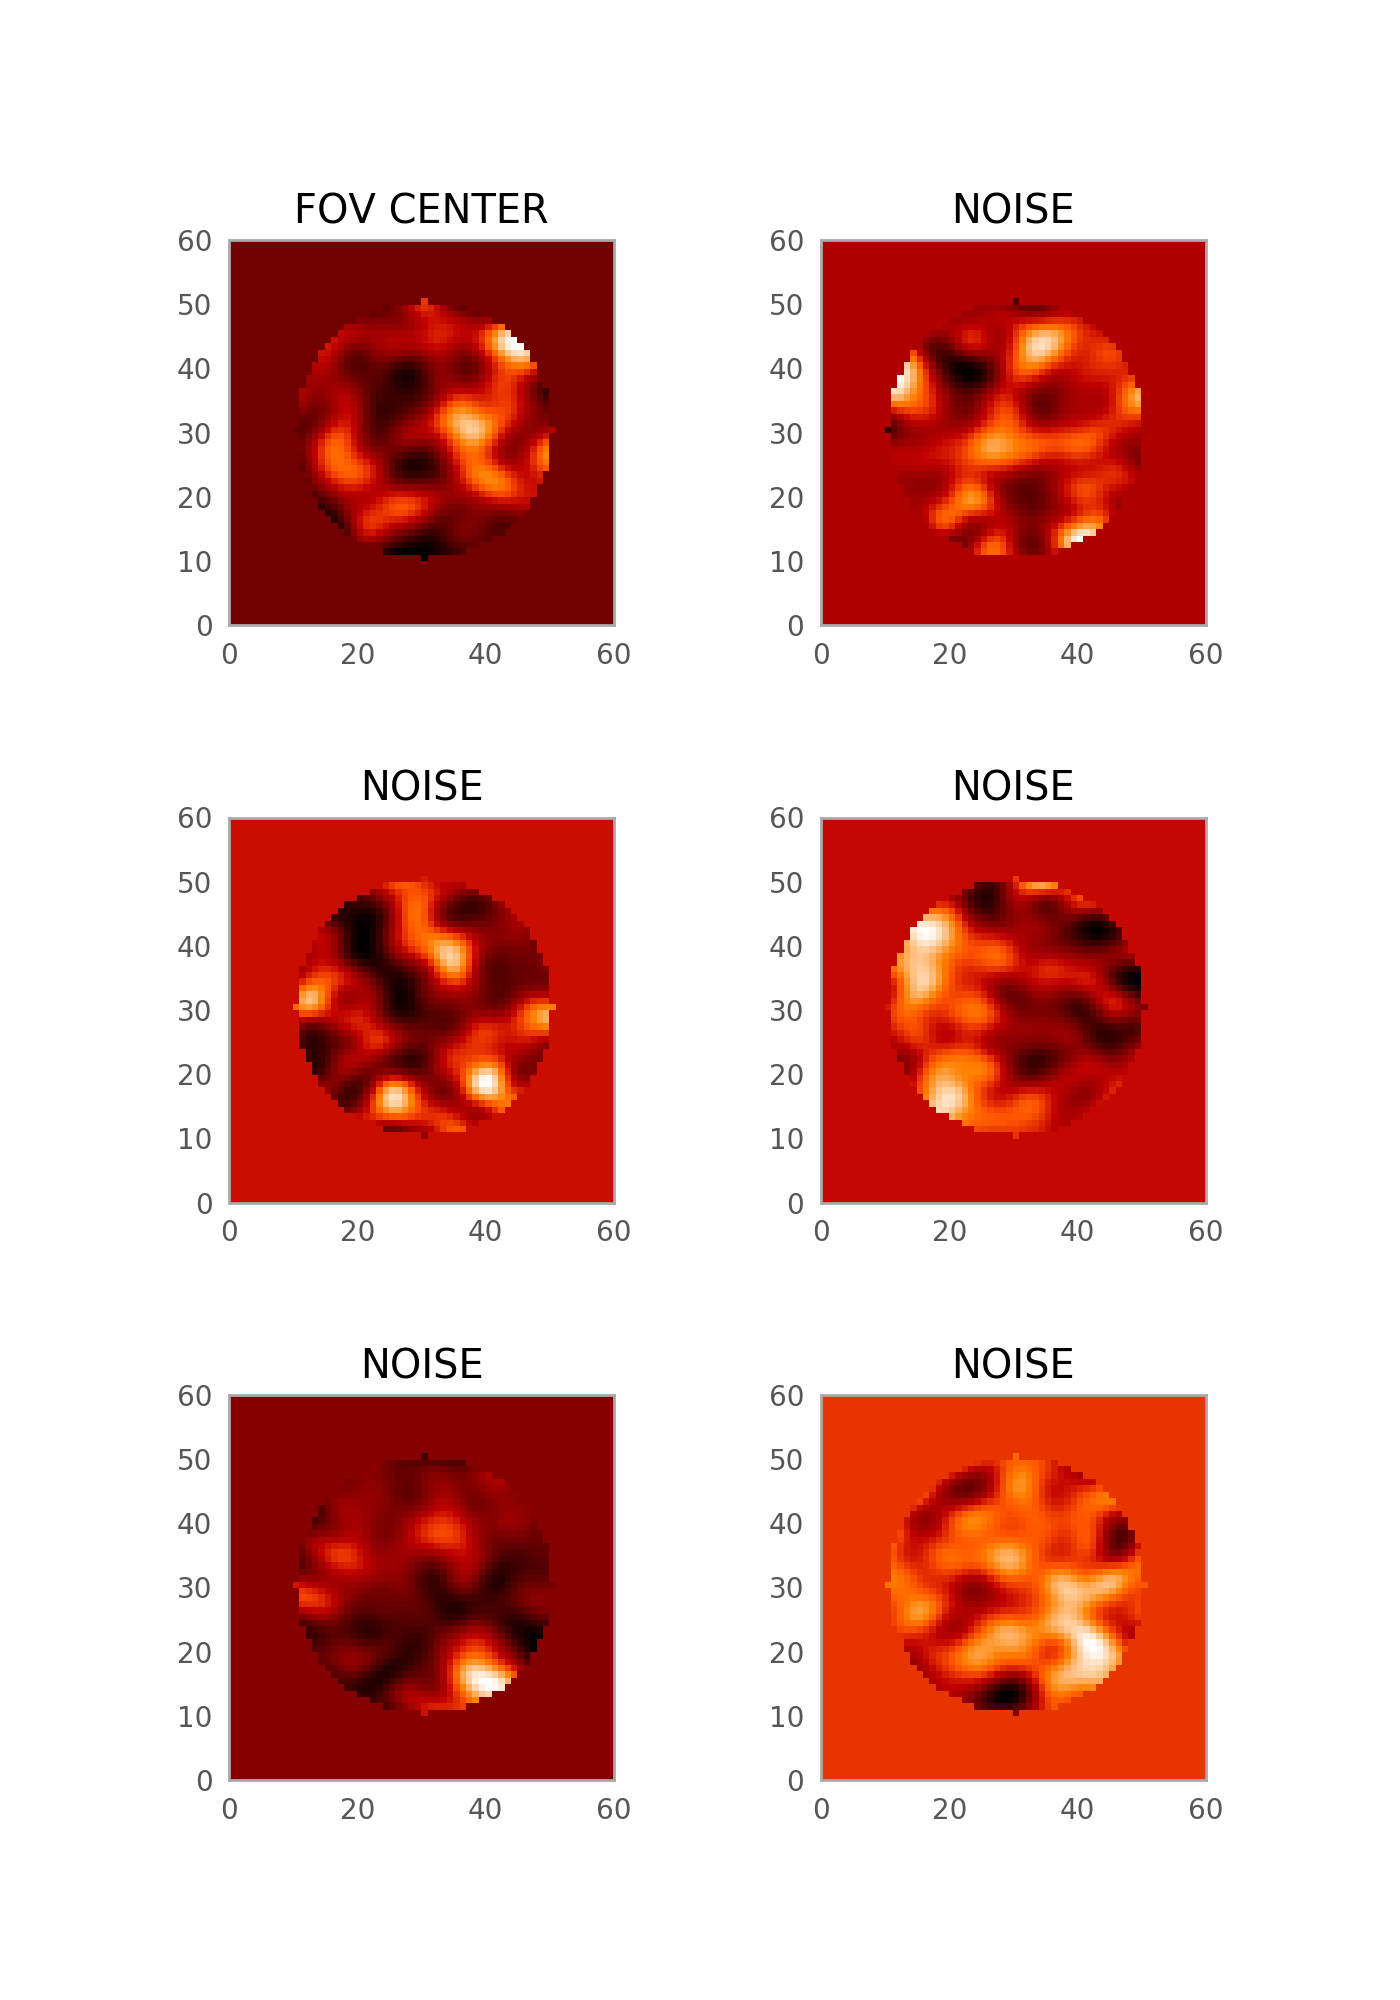

In [27]:
%matplotlib notebook

fig, axs = plt.subplots(3, 2, figsize=(7, 10))

axs[0,0].pcolormesh(nodecim[50:110, 50:110])
axs[0,0].set_aspect(aspect=1)
axs[0,0].set_title('FOV CENTER')

for i, im in enumerate(imlist):
    i += 1
    axs[i % 3, i // 3].pcolormesh(im[50:110, 50:110])
    axs[i % 3, i // 3].set_aspect(aspect=1)
    axs[i % 3, i // 3].set_title('NOISE')

<IPython.core.display.Javascript object>


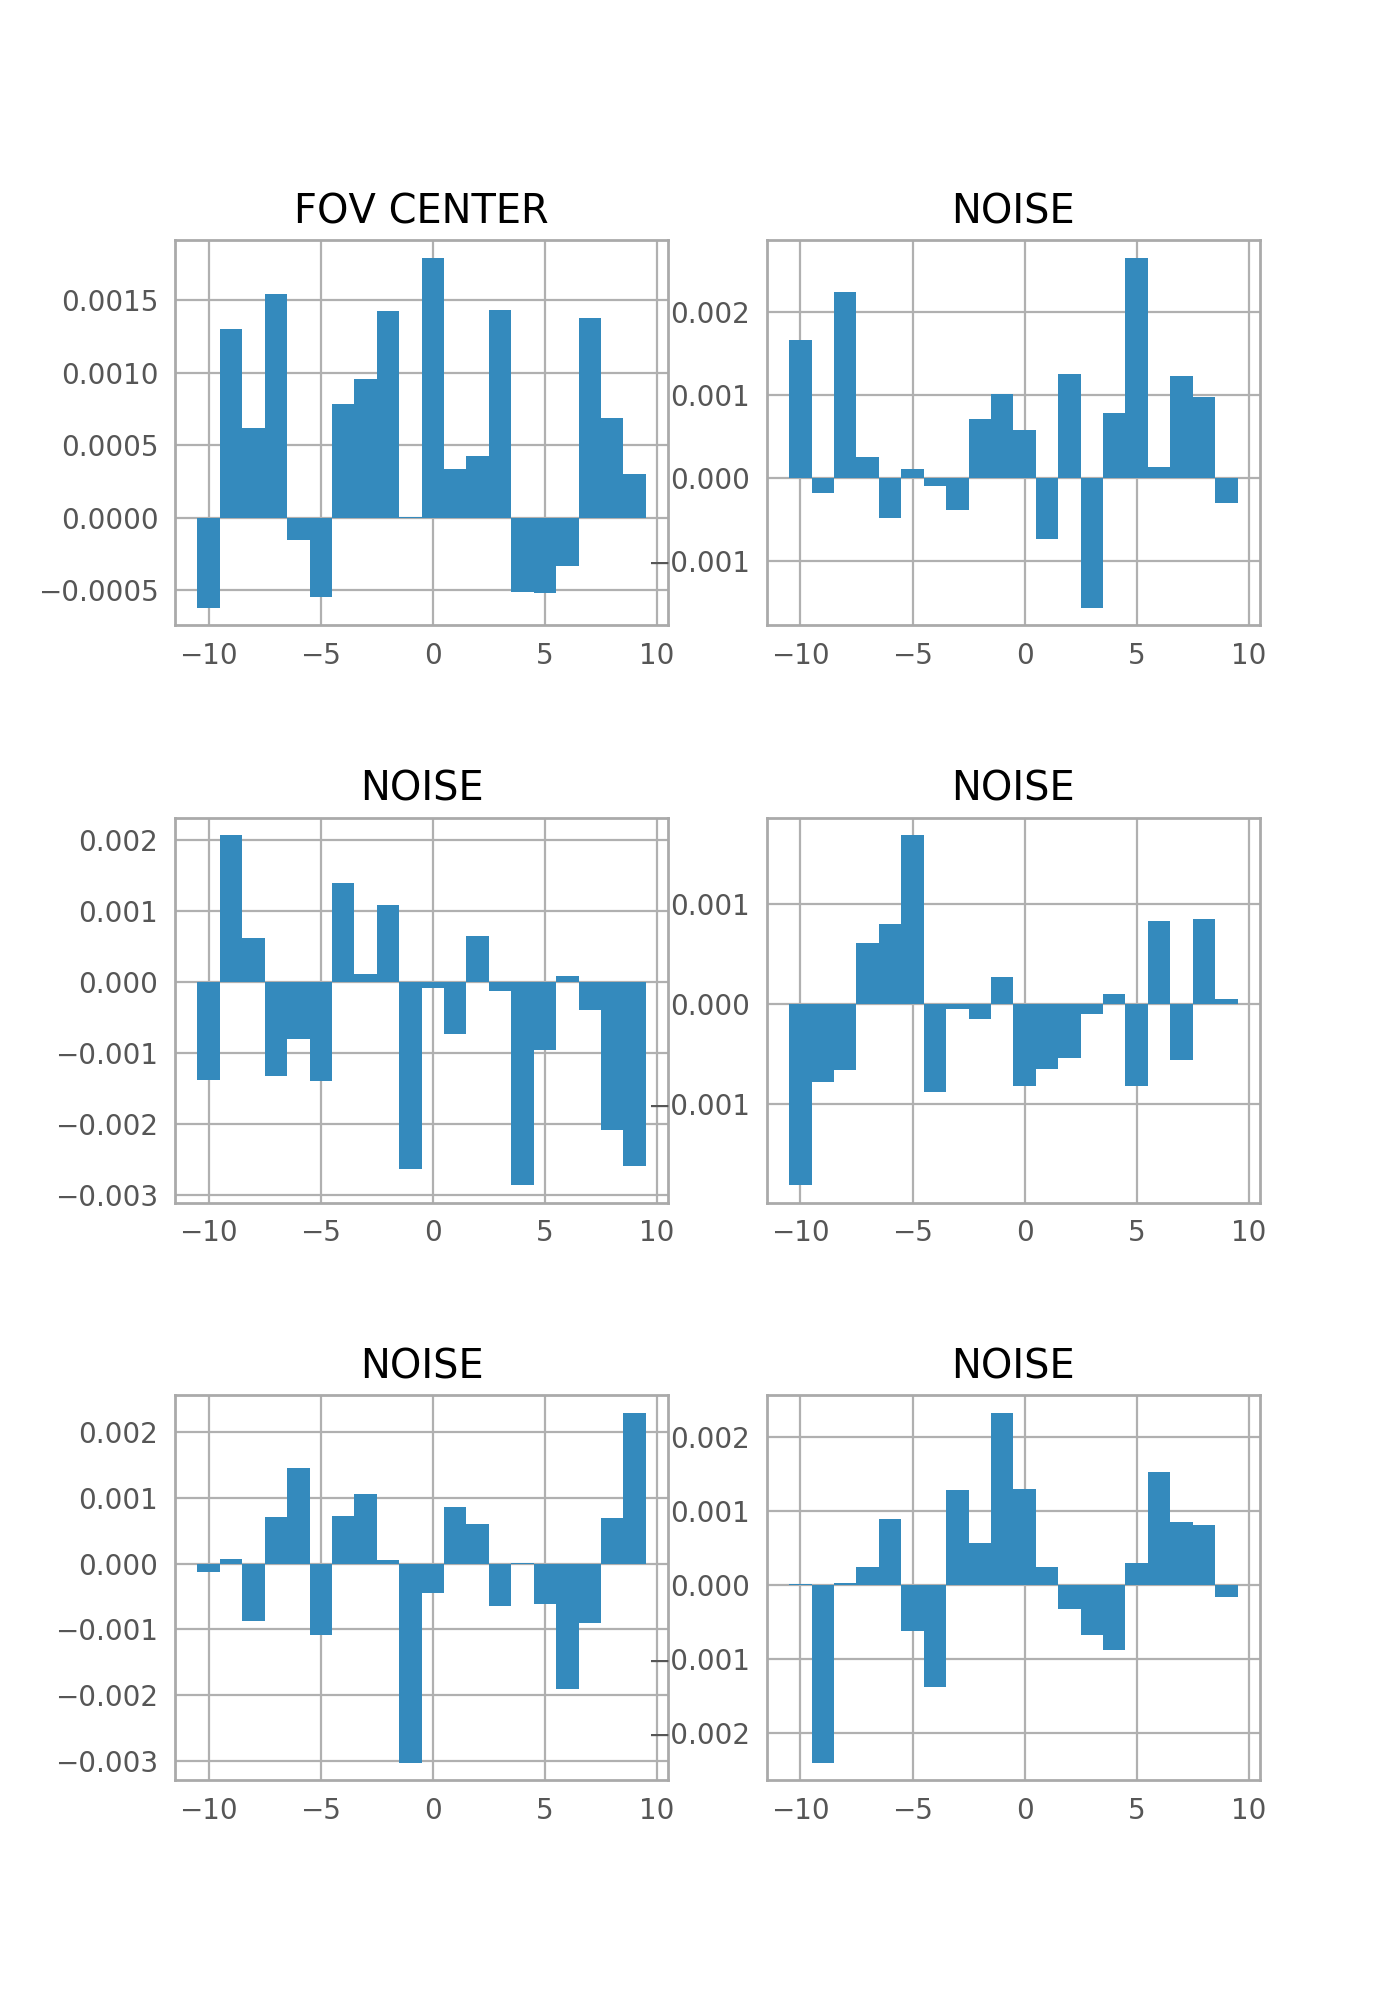

In [32]:
%matplotlib notebook

fig, axs = plt.subplots(3, 2, figsize=(7, 10))

axs[0,0].bar(np.arange(-10, 10), nodecprof, width=1)
axs[0,0].set_title('FOV CENTER')

for i, prof in enumerate(proflist):
    i += 1
    axs[i % 3, i // 3].bar(np.arange(-10, 10), prof, width=1)
    axs[i % 3, i // 3].set_title('NOISE')

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


38


<IPython.core.display.Javascript object>


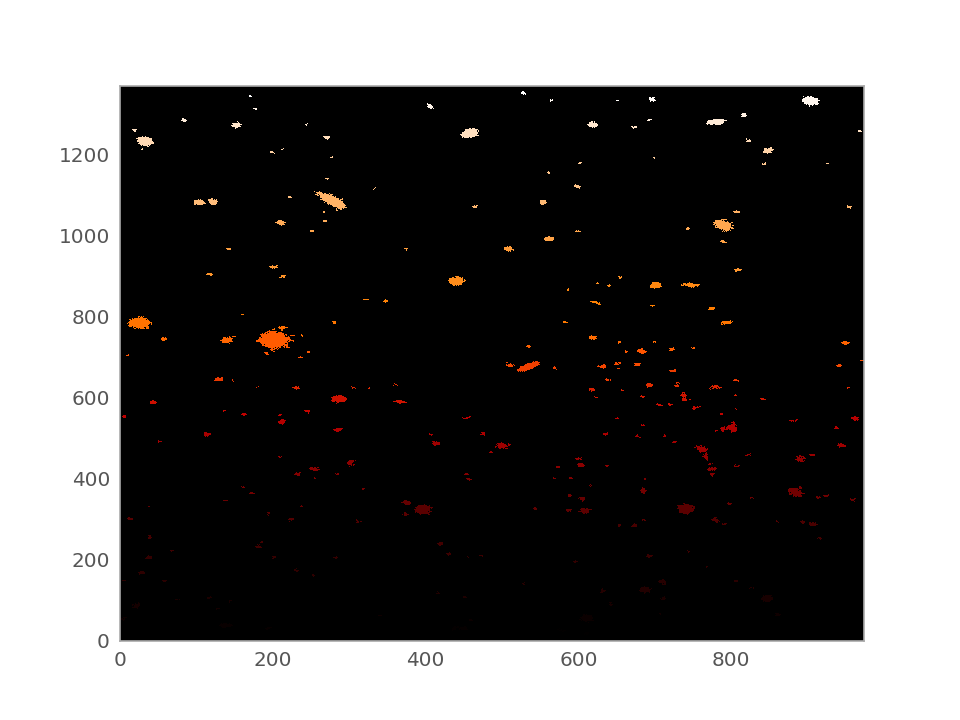

In [18]:
%matplotlib notebook
# findblobs(file, optfile, pbfile, opt threshold, nstds, npix, ndist)
xmm5sources, xmm5blobs, xmm5perims, xmm5poss, xmm5data, cocoords = ss.find_blobs(xmm5_cubefiles[5], xmm5_cubefiles[7], 
                                                                                 xmm5_cubefiles[3], 4, 12, 10, 0.15)

In [20]:
len(xmm5poss)

4

In [21]:
resposs = np.array(xmm5poss)
print(len(np.where(resposs[:, 8] != -1)[0]))

matchidx = np.where(resposs[:,8] != -1)

matchchans = resposs[matchidx, 0][0]
matchchans = np.array([int(x) for x in matchchans])
matchchans

2


array([28, 34])

In [22]:
# all channels with a source, no matter where it is 

schans = np.array([int(x) for x in xmm5poss[:,0]])
schans

array([18, 28, 34, 35])

In [86]:
cschans = find_consec(schans)
print(len(cschans))
cschans

68


array([  0,   1,  28,  29,  30,  35,  36,  41,  42,  45,  46,  48,  49,
        50,  66,  67,  68,  69,  80,  81,  94,  95,  98,  99, 106, 107,
       109, 110, 115, 116, 124, 125, 126, 127, 128, 132, 133, 135, 136,
       139, 140, 146, 147, 162, 163, 164, 170, 171, 172, 173, 174, 180,
       181, 182, 202, 203, 206, 207, 209, 210, 216, 217, 219, 220, 221,
       226, 227, 228])

<IPython.core.display.Javascript object>


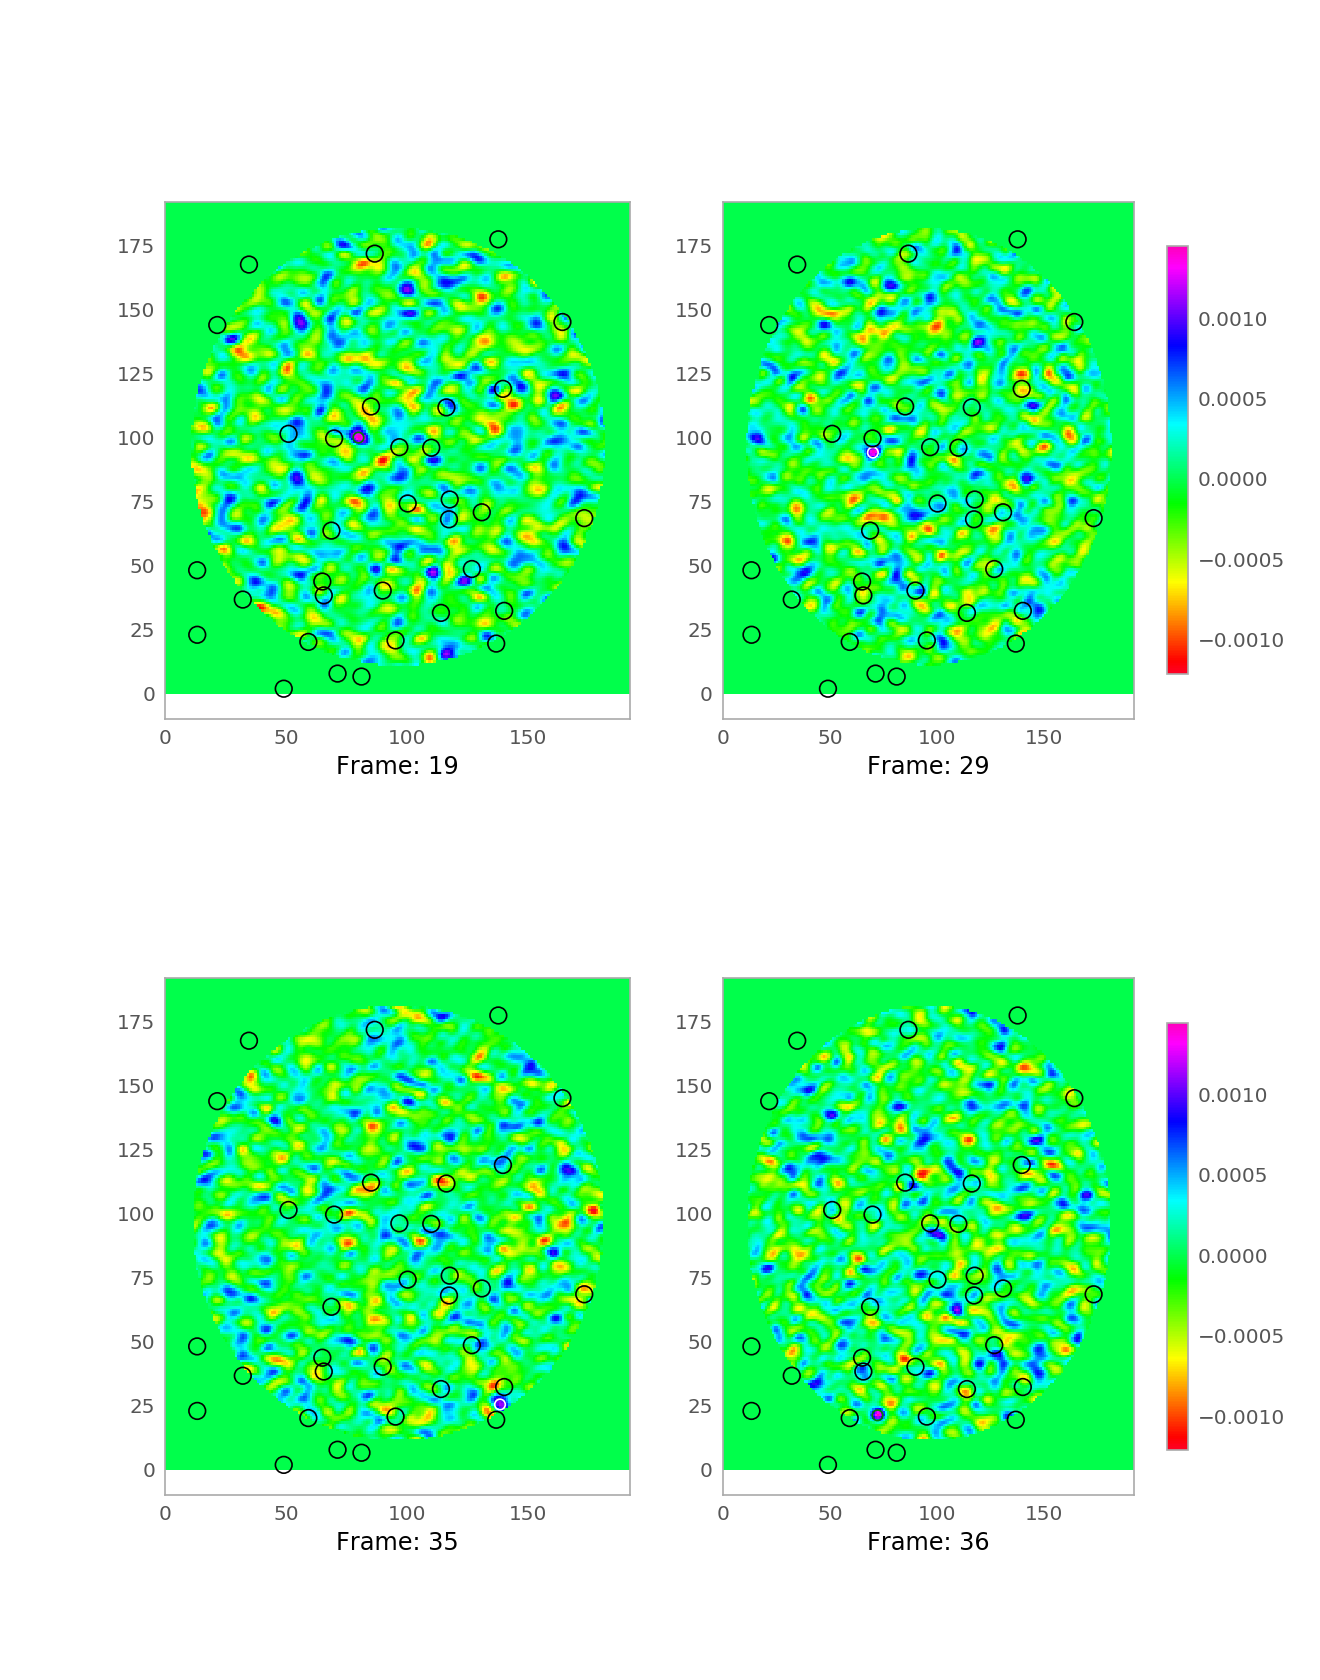

In [23]:
%matplotlib notebook

ss.blobVisualize(xmm5data, xmm5poss, cocoords, schans)

working on a search algorithm that finds sources in the same location in multiple consecutive frames

## XMM-8 3-Gaussian fit

<IPython.core.display.Javascript object>


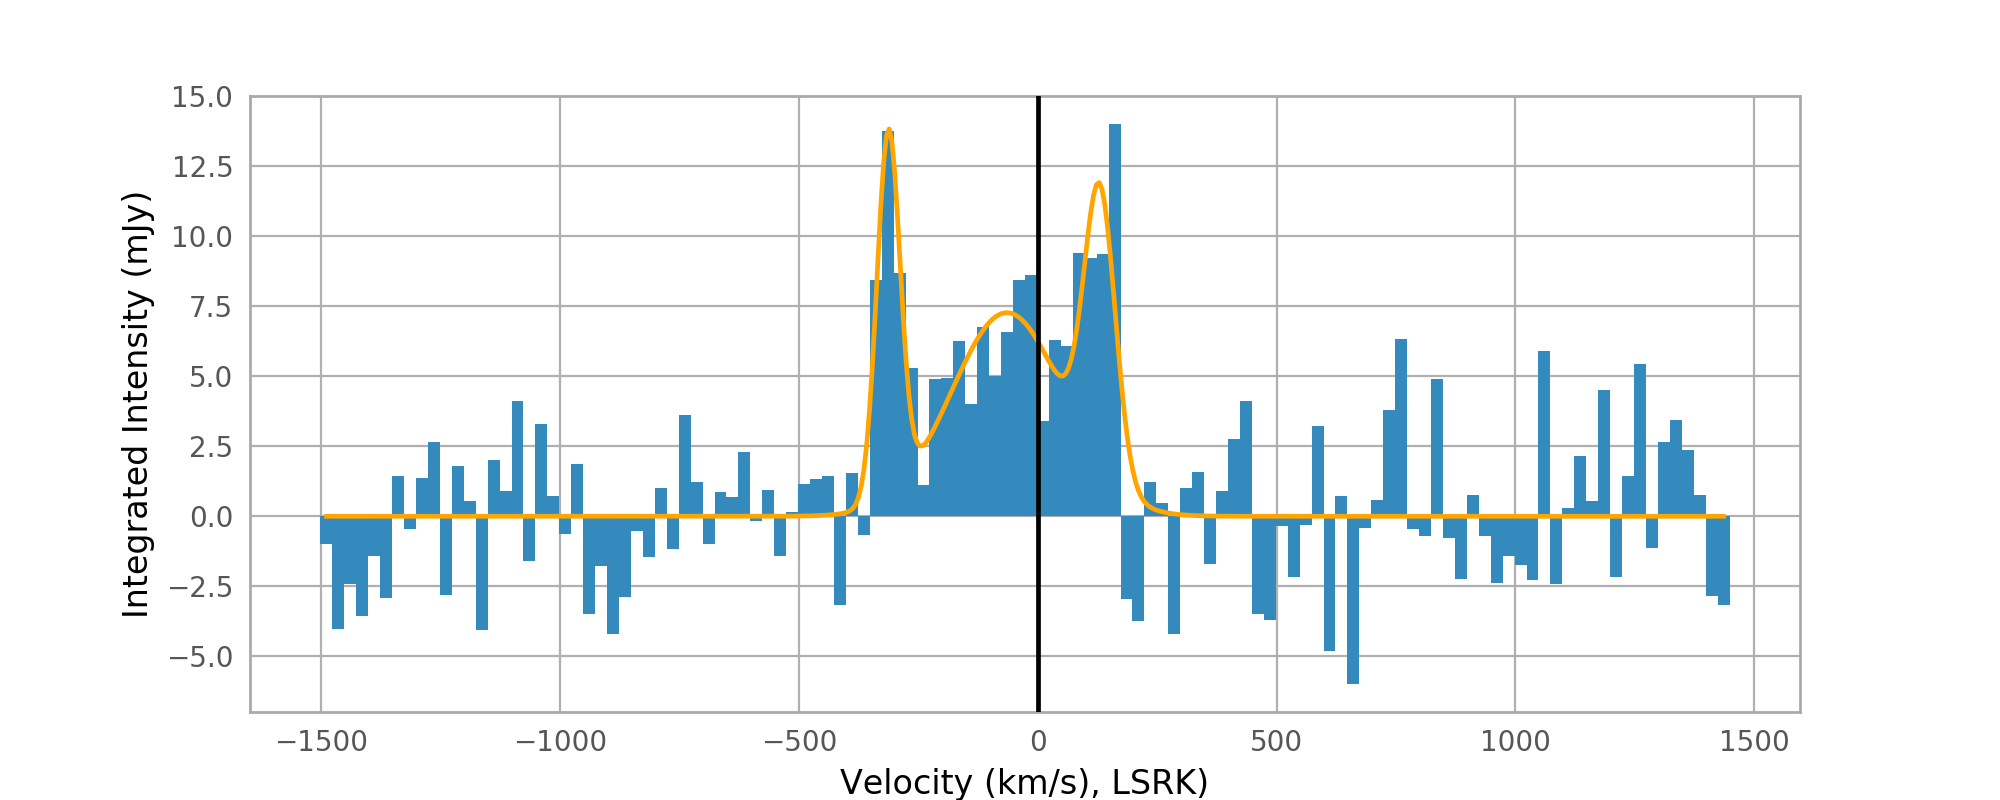

chi-squared for three Gaussian: 1.750
Three-gaussian integrated flux: 3.751e+00 Jy km/s


/Users/dee/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [827]:
# def get_vel_from_txt(specfile, p0=[0.3, 67200, 50, 0], centmean=True, p02=None, linefree=(0,50), n_gauss=None,
#                      zvals=(90, 160), z=None, centline=False):
# load in the spectral profile from the file
from scipy.integrate import quad

def threegaussian(x, amp1, amp2, amp3, mu1, mu2, mu3, sig1, sig2, sig3, C):
    gauss1 = amp1 * np.exp(-np.power(x - mu1, 2.) / (2 * np.power(sig1, 2.)))  # + C
    gauss2 = amp2 * np.exp(-np.power(x - mu2, 2.) / (2 * np.power(sig2, 2.)))  # + C
    gauss3 = amp3 * np.exp(-np.power(x - mu3, 2.) / (2 * np.power(sig3, 2.)))
    return gauss1 + gauss2 + gauss3

os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/XMM/XMM-8/calibrated/')
specfile = glob.glob('*rechan*.txt')[0]
p0 = [0.01, 0.003, 0.01, -300, -100, 50, 50, 100, 50, 0]
linefree=(0,50)
zvals=(90,160)

specprof = np.genfromtxt(specfile)
vel, flux = specprof[:, 0], specprof[:, 1]

zmin,zmax = zvals[0], zvals[1]

# xarray to fit
x = np.linspace(np.min(vel), np.max(vel), num=500)

fig, axs = plt.subplots(1, figsize=(10, 4))

# plot the intensity data to make sure the fit worked
axs.bar(vel, flux * 1e3, width=np.abs(vel[1] - vel[0]))
axs.set_xlabel('Velocity (km/s), LSRK)')
axs.set_ylabel('Integrated Intensity (mJy)')

# fit to three gaussians
opt1, cov1 = curve_fit(threegaussian, vel, flux, p0=p0)

# find the reduced chi-squared value for each fit
rms1, chi1 = co.rms_chi(flux[zmin:zmax], threegaussian(vel[zmin:zmax], *opt1), 12, linefree=linefree)

# print out the chi-squared values for each fit
print("chi-squared for three Gaussian: {:.3f}".format(chi1))

rms = rms1
opt = opt1

axs.plot(x, threegaussian(x, *opt1) * 1e3, color='orange')

# find area under gaussian fit - integration means -> Jy*km/s
specmax1 = quad(threegaussian, np.min(vel), np.max(vel),
                args=(opt1[0], opt1[1], opt1[2], opt1[3], opt1[4], opt1[5], opt1[6], opt1[7], opt1[8], 0))[0]
print("Three-gaussian integrated flux: {:.3e} Jy km/s".format(specmax1))

specmax = specmax1
freq_to_vel = u.doppler_radio(230.528 * u.GHz)
hzmean = (np.mean((opt1[3], opt1[4], opt1[5])) * u.km / u.s).to(u.Hz, equivalencies=freq_to_vel)


centfreq = 230.538 * u.GHz / (1 + z)
# centvel = centfreq.to(u.km / u.s, equivalencies=freq_to_vel)

axs.axvline(x=0, zorder=20, color='k')

In [20]:
lcoxmm8 = co.co_line_luminosity(3.751, 190.211301886948, 0.21201)
print("{:.3e}".format(lcoxmm8))
mgasxmm8 = co.M_gas(lcoxmm8)
print("{:.3e}".format(mgasxmm8))

1.804e+09
2.123e+09


## Check flux values by testing on 1049
(used $3.59 \pm 0.34 \ \mathrm{Jy} \ \mathrm{km} \ \mathrm{s}^{-1}$ at $z=1.7091$ and $\nu_{obs} = 85.0961 \ \mathrm{GHz}$ with $\alpha_{CO}=0.8$ and $r_{21}=0.85$, should give $1.1\times10^{11} M_\odot$

In [21]:
lco1049 = co.co_line_luminosity(3.59, 85.0961, 1.7091)
print("{:.3e}".format(lco1049))
mgas1049 = co.M_gas(lco1049, alpha_CO=0.8)
print("{:.3e}".format(mgas1049))

1.159e+11
1.091e+11


# Upper limits for nondetections

In [2242]:
znodec = np.array([0.7634113, 1.03458, 0.47762, 0.6643, 0.44277, 0.30793])
nuobsnodec = 230.538/(1+znodec)

In [2243]:
lupper = co.co_line_luminosity(np.array([6.7088e-02, 7.0653e-02, 1.3795e-01, 7.7292e-02, 9.6913e-02, 1.1842e-01]), 
                               nuobsnodec, znodec)
mgasupper = co.M_gas(lupper)

In [2244]:
mgasupper

array([5.35068147e+08, 1.03351245e+09, 4.20766262e+08, 4.64691526e+08,
       2.52682917e+08, 1.45293127e+08])

## Get fluxes and errors from MIPS catalogues

In [773]:
import astropy.io as apio
xmmcatfile = '/Users/dee/Documents/ALMA/catalogues/cdfs_24_aopbmg.tbl'

In [774]:
xmmcat = apio.ascii.read(xmmcatfile)
xmmcat

<Table length=90765>
 col1  col2    col3     col4     col5   ...  col21    col22  col23   col24  
int64 int64  float64  float64  float64  ... float64  float64  str1  float64 
----- ------ -------- ------- --------- ... -------- ------- ----- ---------
    1      1 5823.613   0.132    53.808 ...   -4e-06    1.85     N  3.904963
    2      2 5317.455   0.145     91.25 ...   -5e-06    1.01     N  8.095416
    3      3 5975.074   0.222    92.615 ...   -8e-06    1.08     N  3.903294
    4      4 5332.822   0.141   101.347 ...   -4e-06     1.3     N  7.971799
    5      5 5367.264   0.636   101.472 ... -1.2e-05   0.925     N 10.337338
    6      6 5251.172   0.668   101.273 ... -3.7e-05     1.4     N  7.792848
    7      7 5718.305   0.203   108.479 ...   -1e-05    1.31     N 11.842096
    8      8 5350.596   0.713   114.636 ... -4.5e-05   0.611     N  9.851039
    9      9 5774.221   0.447   125.826 ... -1.4e-05   0.794     N  9.963028
   10     10 5633.999    0.64    135.72 ... -2.7e-05    1.18     N 11.142761
  ...    ...      ...     ...       ... ...      ...     ...   ...       ...
90756 158804 3145.492   0.176  11007.07 ...   -8e-06    1.91     N 15.459807
90757 158805 3365.164   0.496 11016.875 ... -2.7e-05   0.713     N 14.926229
90758 158806 3554.777    0.56 11026.534 ...   -5e-06   0.978     N  7.571005
90759 158807 3172.992   0.381 11035.547 ... -1.9e-05   0.968     N 12.736493
90760 158808 3288.424   0.517 11040.753 ...   -3e-05    1.02     N 11.771075
90761 158809 3343.294   0.702 11055.271 ...   -3e-05   0.517     N  17.23111
90762 158810 3339.186   0.551 11098.789 ... -1.7e-05    0.36     N 11.375381
90763 158811 3203.934   0.621 11108.936 ...  1.2e-05    1.42     N 10.871301
90764 158812 3457.944    0.48 11110.667 ... -1.3e-05   0.895     N  7.353226
90765 158813 3091.815   0.461 11126.699 ... -1.3e-05   0.716     N   6.68227

In [775]:
xmmmips_ap1 = np.array(xmmcat['col8'])
xmmmips = np.array(xmmcat['col13'])
xmmerr = np.array(xmmcat['col14'])
xmmra = np.array(xmmcat['col17'])
xmmdec = np.array(xmmcat['col19'])

In [785]:
mipsval =1897.386261
print(xmmmips[np.where(xmmmips_ap1 == mipsval)])
print(xmmerr[np.where(xmmmips_ap1 == mipsval)])
print(xmmra[np.where(xmmmips_ap1 == mipsval)])
print(xmmdec[np.where(xmmmips_ap1 == mipsval)])

[1877.844537]
[15.095213]
[54.071052]
[-28.380374]


## Get fluxes from IRAC catalogs

In [3]:
os.chdir('/Users/dee/Documents/ALMA/catalogues')

In [4]:
cat = readsav('XMMLSS_finalzIRAC.sav', verbose=True)

NameError: name 'readsav' is not defined

# Science Plots

In [557]:
np.mean(fwhma)

356.00137181624996

In [16]:
mips_err = np.array([22.220, 18.235, 18.960, 20.409, 18.356, 17.752,  23.790, 18.960, 20.892, 19.684, 23.428,
                    19.684, 23.186, 19.443, 16.302, 17.510, 17.148, 12.197, 16.544, 14.491, 17.510, 14.733, 17.269, 
                    15.095])

mips_err += 0.3 * mips

In [156]:
# EDGE01 galaxies
# BCGs of 'extreme cooling-flow clusters'
# have CO 1-0, 2-1, 3-2, and 4-3

# cluster masses, dust masses, and molecular gas masses all listed in Popesso 2020 (table 3 in appendix)

egals = ['A11', 'A262', 'A291', 'RX JO338+09', 'RX J0352+19', 'A478', 'RX J0439+05', 'RX J0747-19/PKS 0745–191',
         'A646', 'RX J0821+07', '4C + 55.19/NGC3079',
        'Zw 2089', 'Hydra A', 'Zw 3146', 'A1068', 'Zw 3916', 'A1664', 'RX J1347-11', 'A1795',
        'A1835', 'Zw 7160', 'RX J1532+30', 'A2146', 'A22204', 'Zw 8193', 'Zw 8197', 'Zw 8276',
        'A2390', 'A2597', 'NGC 1275', 'I09104+41', '3C 48', 'R0107+32', 'A1367']

ez = np.array([0.1503, 0.0171, 0.196, 0.0338, 0.109, 0.0882, 0.208, 0.1028, 0.1268,
              0.110, 0.242, 0.235, 0.052, 0.2906, 0.1386, 0.204, 0.1276, 0.4503, 0.0620,
              0.2523, 0.2578, 0.3615, 0.2343, 0.1514, 0.1825, 0.1140, 0.0757, 0.2328, 0.0852,
              0.0184, 0.4420, 0.3695, 0.0175, 0.218])

emgas = np.array([2.6e10, 9e8, 2.3e10, 3.9e9, 1.2e10, 4.5e9, 3.3e10, 7.6e9, 1.3e10,
                 3.9e10, 4.5e10, 4.6e10, 2e9, 1.6e11, 8.5e10, 1.6e10, 4.4e10, 6.8e10, 2.7e9,
                 1.8e11, 6.1e10, 2.5e11, 3.5e10, 2.3e10, 4.3e10, 1.1e10, 8.2e9, 4.9e10, 8.1e9,
                 1.7e10, 5.1e10, 1.6e10, 2.2e9, 5.2e8])

edmgas = np.array([7e9, 1.3e8, -1, 0.4e9, 0.3e10, 2.6e9, -1, -1, -1, 0.4e10, -1, -1, -1, 0.3e11, 0.6e10,
                  -1, 0.7e10, -1, -1, 0.2e11, 2.4e10, 0.4e11, -1, 0.6e10, -1, 0.3e10, 1.2e9, -1, 3.3e9,
                  0.2e10, -1, 0.6e10, 0.3e9, 1e8])

# esfr = [35, 0.54, 6.3, 2.1, 11.1, 'A478', 18.7, 17.2, 7.1, 
#          37, 5.6,
#         271, 'Hydra A', 61, 254.4, 'Zw 3916', 14.6, 'RX J1347-11', 'A1795',
#         202.0, 'Zw 7160', 97, 'A2146', 'A22204', 59, 3.6, 3.7,
#         8.8, 2.1, 'NGC 1275', 'I09104+41', '3C 48', 'R0107+32', 'A1367']
# sfr for NGC 3079 from https://arxiv.org/pdf/1005.5251.pdf
esfr = np.array([35, 0.54, 6.3, 2.1, 11.1, -99, 18.7, 17.2, 7.1, 37, 5.6, 271, -99, 61, 254.4, -99, 14.6, -99,
                 -99, 202.0, -99, 97, -99, -99, 59, 3.6, 3.7, 8.8, 2.1, -99, -99, -99, -99, -99])
# o'Dea et al estimates using IR luminsoity and Bell (2003):
# SFR = A(L_IR/L_sun)(1+sqrt(10^9 Lsun/L_IR)) with A=1.57e-10 for Lir > 1e11 Lsun and A=1.17e-10 otherwise


edsfr = ['A11', 'A262', 'A291', 'RX JO338+09', 'RX J0352+19', 'A478', 'RX J0439+05', 'RX J0747-19', 'A646', 
         'RX J0821+07', '4C + 55.19',
        'Zw 2089', 'Hydra A', 6, 6.8, 'Zw 3916', 'A1664', 'RX J1347-11', 'A1795',
        0.5, 'Zw 7160', 'RX J1532+30', 'A2146', 'A22204', 'Zw 8193', 'Zw 8197', 'Zw 8276',
        0.1, 0.2, 'NGC 1275', 'I09104+41', '3C 48', 'R0107+32', 'A1367']

emstellar = ['A11', 'A262', 'A291', 'RX JO338+09', 'RX J0352+19', 'A478', 'RX J0439+05', 'RX J0747-19/PKS 0745–191',
         'A646', 'RX J0821+07', '4C + 55.19/NGC3079',
        'Zw 2089', 'Hydra A', 'Zw 3146', 'A1068', 'Zw 3916', 'A1664', 'RX J1347-11', 'A1795',
        'A1835', 'Zw 7160', 'RX J1532+30', 'A2146', 'A22204', 'Zw 8193', 'Zw 8197', 'Zw 8276',
        'A2390', 'A2597', 'NGC 1275', 'I09104+41', '3C 48', 'R0107+32', 'A1367']

# e36um = [1.36, 16.93, 1.16, 9.43, 2.04, 'A478', 1.71, 3.95,
#          1.78, 2.52, '4C + 55.19/NGC3079',
#         0.94, 'Hydra A', 'Zw 3146', 3.41, 1.43, 2.27, 'RX J1347-11', 'A1795',
#         'A1835', 'Zw 7160', 0.82, 1.18, 3.31, 4.92, 2.17, 3.24,
#         'A2390', 'A2597', 'NGC 1275', 'I09104+41', '3C 48', 'R0107+32', 'A1367']
e36um = np.array([1.36, 16.93, 1.16, 9.43, 2.04, -99, 1.71, 3.95, 1.78, 2.52, -99, 0.94, -99, -99, 3.41, 1.43, 2.27,
                  -99, -99, -99, -99, 0.82, 1.18, 3.31, 4.92, 2.17, 3.24, -99, -99, 7.581, -99, -99, -99, -99])
e36um = (e36um*u.mJy).to(u.Jy)

# value for NGC 1275 from IPAC 2010MNRAS.408.1982L
# NGC 3079 has 3.2um in https://arxiv.org/pdf/1005.5251.pdf
# Hydra A has 4.5, 8 um in IPAC refcode 2011ApJ...732...40D

e45um = np.array([1.03, 9.97, 0.87, 5.70, 1.57, -99, 1.36, 2.76, 1.27, 1.81, -99, 1.15, -99, -99, 2.98, 1.12, 1.61,
                  -99, -99, -99, -99, 0.71, 1.19, 2.43, 3.73, 1.48, 2.15, -99, -99, -99, -99, -99, -99, -99])*u.mJy
e45um = e45um.to(u.Jy)

e58um = np.array([0.89, 7.96, 0.54, 4.55, 1.41, -99, 0.85, 2.12, 0.85, 1.62, -99, 1.77, -99, -99, 3.66, 0.62, 1.34,
                  -99, -99, -99, -99, 0.48, 1.37, 1.67, 2.40, 0.97, 1.63, -99, -99, -99, -99, -99, -99, -99])*u.mJy
e58um = e58um.to(u.Jy)

e80um = np.array([1.71, 6.57, 0.50, 9.61, 2.07, -99, 0.92, 2.87, 0.77, 7.03, -99, 3.94, -99, -99, 9.23, 0.49, 2.67,
                  -99, -99, -99, -99, 0.95, 2.53, 1.79, 3.99, 0.99, 1.62, -99, -99, -99, -99, -99, -99, -99])*u.mJy
e80um = e80um.to(u.Jy)


e24um = np.array([10.59, 4.03, 0.53, 2.39, 5.14, -99, 2.10, 10.34, 2.52, 18., 3520, 33.59, 7.861900, -99, 74.47,
                  0.41, 4.01, -99, -99, -99, -99, 3.77, 24.10, 2.85, 10.66, 0.85, 3.22, -99, -99, 2822.7, -99,
                  1.310000e+2, -99, -99])
                 
# value for NGC 3079 from https://arxiv.org/pdf/1005.5251.pdf
# value for Hydra A from IPAC refcode 2013SSTSLC4.2....0C
# value for NCG 1275 from IPAC 2013SSTSLC4.2....0C
# value for 3C 48 from IPAC 2005ApJ...629...88S


emcluster = np.array([-99, 1.6, -99, -99, 8.38, 10.1, 18.7, -99, 9.10, 5.25, -99, 16.6, 4, 30, 2.29, 10.5, 9.46, 
                      16, 7, 31.8, 17.2, 28.9, 8.5, 25, 7.09, 6.9, 8.4, 28, 8.8, 12, 8.2, -99, -99, 3.5])*1e14

In [160]:
missingiracidx = np.where(np.logical_and(edmgas > 0, e80um < 0))[0]

for i in missingiracidx:
    print(emstellar[i])

A478
Zw 3146
A1835
Zw 7160
A2597
NGC 1275
3C 48
R0107+32
A1367


In [18]:
# castignani et al 2020 (A&A manuscript): Molecular gas in CLASH BCGs
# Cluster Lensing and Supernova survey with Hubble
# dense-cores, x-ray selected (cool core?)

cgals = ['A209', 'M0329', 'M0429', 'M0647', 'M0744', 'A611', 'M1115', 'A1423', 'M1206', 'CL1226', 'M1311', 'RX1347',
        'M1423', 'RX1532', 'M1720', 'A2261', 'M1932', 'M2129', 'RX2129']

cz = np.array([0.206, 0.450, 0.399, 0.591, 0.686, 0.288, 0.352, 0.213, 0.440, 0.891, 0.494, 0.451, 0.545, 0.361,
              0.391, 0.224, 0.353, 0.570, 0.234])

cmstellar = np.array([2, 3.69, 4.68, 5.13, 8.20, 3.45, 2.19, 1.96, 4.93, 15, 4.49, 3.68, 4.95, 2.2, 3.83, 1.74, 
                      6.9, 2.44, 2.21])*1e11

cdmstellar = np.array([0.16, 0.21, 0.23, 1.79, 0.43, 0.42, 0.17, 0.11, 1.39, 1.99, 1.05, 0.85, 0.13, 0.05, 0.94, 
                      0.18, 0.8, 0.17, 0.32])*1e11

cmgas = np.array([2, 3.4, 3.3, 4.5, 6.6, 1.8, 2.1, 1.7, 3, 11.7, 2.1, 2.5, 5.1, 8.7,
                 3, 2, 9.2, 5.6, 1.2])*1e10

cdmgas = np.array([-1, 1, -1, -1, -1, -1, -1, 0.5, 1, -1, -1, -1, -1, 1.1, -1, -1, 1.5,
                  1.4, -1*1e10])

ctransition = np.array([1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 4, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1])

In [19]:
# Genzel et al. 2010 A study of the gas-star formation relation over cosmic time 
# z ~1-3 normal star-forming galaxies

# Molecular gas mass: Mmol-gas= 1.36 α R1JLJ(CO) (M⊙), where α is the conversion factor (3.2 for SFGs, 
# 1 for z≥ 1 SMGs) and R1J=L′CO 1-0/L′CO J-(J−1)= 1.2 and 2 for J= 2 and 3 SFGs. For the z≥ 1 SMGs we use R1J= 1.1, 
# 1.3 and 1.6 for J= 2, 3 and 4. Conversion factors are probably uncertain by ±30 per cent for SFGs and a factor of 
# at least ±50 per cent for z∼ 0 ULIRG/z≥ 1 SMGs.

# Stellar masses for a Chabrier IMF, obtained from SED population synthesis fitting to the combined 
# UV/optical/near-IR SEDs (Erb et al. 2006b; Noeske et al. 2007; Daddi et al. 2007, 2010a; Förster Schreiber et al. 
# 2009); uncertainty ±40 per cent.

ggals = ['EGS13004291', 'EGS12007881', 'EGS13017614', 'EGS13035123', 'EGS13004661', 'EGS13003805', 'EGS12011767',
         'EGS12012083', 'EGS13011439', 'EGS13011148', 'HDF-BX1439', 'Q1623-BX599', 'Q1623-BX663', 'Q1700-MD69', 
         'Q1700-MD94', 'Q1700-MD174', 'Q1700-BX691', 'Q2343-BX389', 'Q2343-BX442', 'Q2343-BX610', 'Q2343-MD59',
         'SMMJ02399-0136', 'SMMJ09431+4700', 'SMMJ105141+5719', 'SMMJ123549+6215', 'SMMJ123634+6212', 
         'SMMJ123707+6214', 'SMMJ131201+4242', 'SMMJ131232+4239', 'SMMJ163650+4057', 'SMMJ163658+4105', 
         'BzK4171', 'BzK210000', 'BzK16000', 'BzK17999']

gz = np.array([1.20, 1.17, 1.18, 1.12, 1.19, 1.23, 1.28, 1.12, 1.10, 1.17, 2.19, 2.33, 2.43, 2.29, 2.34, 2.34, 2.19,
               2.17, 2.18, 2.21, 2.01, 2.81, 3.35, 1.21, 2.20, 1.22, 2.49, 3.41, 2.33, 2.39, 2.45, 1.47, 1.52, 1.52, 
               1.41])

gmgas = np.array([2.8e+11, 8.3e+10, 9.3e+10, 1.3e+11, 2.4e+10, 1.8e+11, 2.6e+10, -8.7e+09, 4.5e+10, 3.0e+10, -5.9e+10,
                  1.6e+11, -5.1e+10, 1.1e+11, 5.3e+11, 1.6e+11, 3.5e+10, -3.3e+10, 1.0e+11, 2.3e+11, 9.2e+10, 8.8e+10,
                  5.5e+10, 3.4e+10, 7.1e+10, 5.2e+10, 3.4e+10, 6.7e+10, 5.0e+10, 1.2e+11, 1.0e+11, 9.4e+10, 1.0e+11,
                  6.6e+10, 7.7e+10])

gdmgas = 0.30*gmgas

gmstellar = np.array([3.3e+11, 1.6e+11, 1.1e+11, 3.4e+11, 3.0e+10, 2.1e+11, 1.2e+11, 5.2e+10, 1.3e+11, 1.6e+11, 
                      5.7e+10, 5.7e+10, 6.9e+10, 1.9e+11, 1.5e+11, 2.4e+11, 7.6e+10, 6.9e+10, 1.5e+11, 1.7e+11,
                      7.6e+10, -99, -99, -99, 1.2e+11, -99, 1.2e+11, -99, -99, 2.3e+11, 2.6e+11, 6.5e+10, 6.5e+10,
                      6.5e+10, 6.5e+10])

gdmstellar = 0.40*gmstellar

In [20]:
# Hatsukade et al. 2020 molecular gas mass of GAMMA-RAY BURST HOST GALAXIES

hz = np.array([0.296, 1.057, 0.480, 1.923, 1.496, 0.979, 0.983, 1.416])

hmgas = np.array([2.9e9, 3.6e10, 5.9e9, 5.7e10, 2.9e10, 2.0e10, 1.9e10, 4.3e10])

hdmgas = np.array([0.5e9, 0.4e10, 1.7e9, 1.1e10, 0.5e10, 0.3e10, 0.3e10, 0.5e10])

In [21]:
# Decarli et al. 2016 ALMA SPECTROSCOPIC SURVEY IN THE HUBBLE ULTRA DEEP FIELD: MOLECULAR GAS RESERVOIRS IN HIGH–
# REDSHIFT GALAXIES 
# ALMA spectroscopic survey of Hubble UDF - mostly main sequence field galaxies

# molecular gas mass is assuming αCO=3.6 M(K km s−1pc2)−1
# sfr, mstar, and ssfr all found by SED fitting with MAGPHYS using 26 photometric measurements from 8um to U-band

decid = np.arange(11) + 1

decz = np.array([2.543, 1.551, 1.382, 1.088, 1.098, 1.094, 1.221, 0.999, 2.447, 2.224, 0.895])

decmgas = np.array([206, 65, 15.9, 13.4, 15, 25, 10, 2.3, 21, 19, 6.2])*1e9

decdmgas = np.array([34, 8, 1.9, 1.7, 4, 6, 3, -1, -1, -1, -1])*1e9

decmstellar = np.array([17.8, 275, 52, 28, 5.8, 75, 15.1, 70, 2.6, 12, 15.9])*1e10

decdmstellarup = np.array([1.8, 70, 12, 7, 0.6, 12, 1.5, 11, 0.3, 1.2, 9])*1e10

decdmstellardown = np.array([1.7, 40, 10, 5, 0.5, 13, 1.4, 17, 0.2, 1.2, 1.4])*1e10

decsfr = np.array([63, 74, 18, 23, 44, 16, 148, 40, 11.8, 22, 42])

decssfr = decsfr/decmgas*1e9

decdsfrup = np.array([6., 60, 9, 20, 4, 11, 15, 14, 1.2, 41, 4])

decdsfrdown = np.array([6, 30, 7, 9, 4, 6, 13, 9, 1.1, 2, 12])


In [22]:
len(decz)

11

In [23]:
# McDonald et al. 2013 The Growth of Cool Cores and Evolution of Cooling Properties in a Sample of 83 Galaxy Clusters 
# at 0.3 < z < 1.2 Selected from the SPT-SZ Survey with chandra x-ray follow-up

# cool-core, x-ray selected galaxy clusters

In [24]:
# Russell et al. Driving massive molecular gas flows in central cluster galaxies with AGN feedback
# alpha_co = 0.8, Xco galactic = 2e20
# assumes 0.4e20 Xco for the phoenix cluster

In [25]:
# PHIBSS2 galaxies https://arxiv.org/pdf/1812.08180.pdf
# galactic Xco - alpha_co = 4.36 and r_21 = 0.77

phibss2z = np.array([0.7, 0.6227, 0.7028, 0.5297, 0.5020, 0.6223, 0.7028, 0.7026, 0.7506, 0.7007, 0.6967, 
                    0.6077, 0.6793, 0.5165, 0.7021, 0.5172, 0.6248, 0.7503, 0.5024, 0.6885, 0.5015, 0.6081, 0.6976,
                    0.6985, 0.7007, 0.6590, 0.6702, 0.5093, 0.7541, 0.5090, 0.7683, 0.6593, 0.7560, 0.5010, 0.7315,
                    0.7359, 0.6702, 0.5705, 0.5447, 0.7099, 0.7369, 0.6445, 0.7610, 0.6790, 0.7800, 0.7790, 0.7720, 
                    0.6832, 0.5110, 0.7784, 0.7880, 0.6825, 0.5950, 0.5035, 0.7837, 0.6380, 0.5561, 0.5320, 0.5605,
                    0.5609, 0.5200])

phibss2mgas = np.array([4.6e10, 5e9, 3.3e10, 2.6e10, 2.8e10, 2.5e10, 8.8e9, 1.2e10, 2.6e10, 2.7e10, 1.9e10, 1.6e10,
                      1.6e10, 8.6e9, 2.2e10, 1.6e10, 3.3e10, 7.3e9, 1.7e10, 8e9, 6.9e9, 2e10, 1.5e10, 2.5e10, 1.4e10,
                      3.1e10, 2.9e10, 1.9e10, 2.2e10, 1.2e10, 1.7e10, 2.5e10, 5e9, 6.2e9, 4.2e10, 2e10, 6.4e9, 1.9e10,
                      6.1e9, 4.7e9, 5.1e9, 7.2e9, 1.6e10, -99, 3e10, 1.8e10, 1.2e10, 7.6e9, 1.2e10, 1.2e10, 2.1e10,
                      2.9e10, 1.8e10, 8e9, 1.4e10, 3.6e10, 2.2e9, 4e9, 3.4e9, 4.7e9, 3.3e10])

phibss2dmgas = 0.5*phibss2mgas

In [26]:
# Jablonka et al. 2013 CO detections of three cluster galaxies
# they didn't give any Xco numbers - they suggest galactic as they're normal MS LIRGS

jabz = np.array([0.3964, 0.4886, 0.4886])

jabmgas = np.array([8.1e9, 1.9e9, 1.6e9])*4.36/0.77

jabdmgas = np.array([0.8e9, 0.3e9, 0.3e9]) * 4.36 / 0.77

In [27]:
# combes et al 2013 CO detections in 20 polar ring galaxies (all but 5 were upper limits)
# https://arxiv.org/abs/1302.7273

combesz = np.array([9548, 7396, 7041, 9370, 16788]) / 2.99e5

combesmgas = np.array([8.4, 4.5, 5.2, 7.3, 21.5])*1e9

combesdmgas = 0.5*combesmgas

In [28]:
# Braun et al 2011 - molecular gas in 11 ulirgs

braunz = np.array([0.439, 0.26172, 0.3424, 0.49337, 0.296, 0.3007, 0.490, 0.292, 0.3349, 0.42856, 0.490])

braunmgas = np.power(10, np.array([11.1, 10.79, 10.84, 11.13, 10.63, 10.89, 
                                   11.18, 10.52, 10.89, 10.80, 11.18]))

braundmgas = np.array([-99, 0.5*10**10.79, -99, -99, -99, 0.5*10**10.89, 0.5*10**11.18, -99, 0.5*10**10.89, -99,
                      -99])

In [29]:
# brownson et al. 2020 green valley galaxies

bz = np.array([0.02682, 0.03367, 0.03504, 0.03311, 0.03154, 0.02695, 0.02702])

bmgas = np.power(10, np.array([8.98, 9.08, 9.42, 9.38, 9.44, 9.70, 8.88]))

bmstellar = np.power(10, np.array([10.29, 10.90, 10.85, 10.66, 10.93, 10.68, 10.21]))

bsfr = np.power(10, np.array([-0.48, -0.51, -0.11, -0.15, -0.13, 0.31, -0.56]))

In [30]:
# aravena et al. the ALMA Spectroscopic Survey in the Hubble Ultra Deep Field: the nature of the faintest dusty
# star-forming galaxies
# keeping only galaxies with Mgas found from CO
# alphaco = 3.6

az = np.array([2.543, 1.414, 2.454, 1.551, 2.696, 1.997, 1.096, 1.037, 1.317, 1.095, 2.574, 1.382, 1.098])

amgas = np.array([13.3, 10., 5.0, 8.8, 11., 2., 1.5, 3.7, 4.7, 3.3, 1.8, 1.7, 2.4])*1e10

admgas = np.array([0.5, 0.8, 0.5, 0.8, 1.3, 0.3, 0.2, 0.4, 0.4, 0.4, 0.2, 0.3, 0.3])*1e10

# aravena et al. ASPECS 2:

a2z = np.array([2.543, 1.414, 2.454, 1.551, 2.696, 1.997, 1.096, 1.037, 1.317, 1.095, 2.574, 1.382, 1.098])

a2mgas = np.array([13.3, 10., 5., 8.8, 11., 2., 1.5, 3.7, 4.7, 3.3, 1.8, 1.7, 2.4])*1e10

a2dmgas = np.array([0.5, 0.8, 0.5, 0.8, 1.3, 0.3, 0.2, 0.4, 0.4, 0.4, 0.2, 0.3, 0.3])*1e10

In [31]:
# Dabhade et al: Molecular gas in GRGs (2020) (keeping only those above z=0.1)
# galactic xco, M(H2) = 4.36 L'co

dabz = np.array([0.14570, 0.47120, 0.12940, 0.13749, 0.45908, 0.35679])

dabmgas = np.power(10, np.array([9.69, 10.82, 9.59, 9.04, 10.42, 10.11]))

dabdmgas = np.array([-1, -1, -1, -99, -99, -1])

dabsfr = np.array([4.64, 170, 1.44, 1.48, 8.33, 48.9])

In [32]:
# bauermeister et al. 2013 - EgNOG survey
# selected from SDSS to be as representative as possible of the SF MS
# use either ULIRG (0.8Msun) or milky way alpha co value depending on whether the galaxies were classified as 
# starbursting

# SFRs and M* are available from bayesian fits to 5+ photometric measurements

egnogz = np.array([0.096941, 0.081196, 0.062168, 0.089592, 0.080978, 0.085259, 0.090469, 0.099188, 0.077338, 
                  0.055121, 0.076055, 0.098171, 0.083503, 0.183193, 0.191773, 0.165737, 0.173078, 0.182661, 
                  0.174881, 0.176180, 0.176579, 0.178004, 0.190227, 0.283020, 0.300622, 0.312361, 0.285380,
                  0.474100, 0.527900, 0.470800, 0.477800])

egnogmgas = np.array([5.18, 19.32, 14.01, 2.45, 7.75, 1.25, 2.81, 9.14, 6.92, 4.83, 8.09, 6.92, 31.12, 80.95, 57.45,
                     6.50, 7.61, 46.57, 5.68, 39.21, 3.71, 26.24, 10.10, 35.90, 46.47, 94.44, 53.53, 9.53, 9.68,
                     9.49, 14.97])*1e9

egnogdmgas = np.array([2.12, 6.73, 4.50, -99, 2.66, -99, 1.05, 3.87, 2.70, 2.42, 2.69, -99, 11.02, 24.68, 17.52, 
                      2.01, 2.30, 14.06, 1.78, 11.93, 1.24, 8.08, 3.06, 12.31, 14.11, 28.40, 16.18, -99, -99, 
                      -99, -99])*1e9

egnogidx = np.where(egnogdmgas > 0)[0]
egnogz = egnogz[egnogidx]
egnogmgas = egnogmgas[egnogidx]
egnogdmgas = egnogdmgas[egnogidx]

In [33]:
# geach (2011) sample used to determine his Mgas MS
geachz = np.array([0.3799, 0.3956, 0.3813, 0.3803, 0.3964])

geachmgas = np.array([2.9, 2., 1.2, 3.1, 5.2])*1e10

geachdmgas = np.array([0.2, 0.3, 0.3, 0.3, 0.5])*1e10

In [34]:
# Castignani et al. 2019 Molecular gas in radio galaxies in dense megaparsec-scale environments at z = 0.4-2.6 
# low-luminosity radio galaxies which exist in dense environments (often associated with the BCG)
# all limits

c2z = np.array([0.388439, 0.60573, 0.9687, 0.9123, 2.625])

c2mgas = np.array([1, 2.6, 18.8, 15.8, 6.6])*1e10

c2dmgas = np.array([-1, -1, -1, -1, -1])

c2mstellar = c2mgas / np.array([0.11, 0.09, 1.5, 1.8, 0.29])

In [35]:
# McNamara et al. 2014 A 1010 Solar Mass Flow of Molecular Gas in the A1835 Brightest Cluster Galaxy 
# XCO=2×10^20cm−2(K km s−1)−1
# outflow powered by radio AGN - extreme SFR
# cool-core?

mcz = 0.251982

mcmgas = 4.9e10

mcdmgas = 2e9

mcsfr = 180 

mcdsfr = 80

In [36]:
# Vantyghem et al. 2016 Molecular Gas Along a Bright Hα Filament in 2A 0335+096 Revealed by ALMA 
# assuming galactic Xco: 2×10−20cm−2(Kkms−1)−1

vz =  0.0346

vmgas = 1.13e9

vdmgas = 0.15e9

vmstellar = 4.7e11

vsfr = 15

vdsfr = 5

In [37]:
# Vantyghem et al. 2017 RXJ 0821? see russell 12 central cluster galaxies

In [38]:
# russell et al 2014 Massive Molecular Gas Flows in the A1664 Brightest Cluster Galaxy 
# used galactic Xco
# short cooling time (cool-core)

rusz = 0.128

rusmgas = 1.1e10

rusdmgas = 1.7e9

russfr = 15

rusdsfr = 5

In [39]:
# STOPPED DOING CITATIONS HERE 

# fogarty et al 2019 The Dust and Molecular Gas in the Brightest Cluster Galaxy in MACS 1931.8-2635
# cool-core galaxy cluster

# Xco = 0.4e20 (from russell et all 2016) - for starbursts and ulirgs

fz = 0.3525

fmgas = 1.9e10

fdmgas = 0.3e10

fsfr = 250


In [40]:
# russell et al. Phoenix cluster 2016
# found using S-Z effect - very massive cluster with AGN one of the largest BHs in the known universe
# cold molecular gas, vigorous starburst, agn feedback

pz = 0.596

pmgas = 2.1e10

pdmgas = 0.3e10

psfr = 650

pdsfr = 150

In [41]:
# tremblay et al 2016: Abell 2597 BCG (cool-core)
# galactic Xco and alpha_co=0.8

tz = 0.0821

tmgas = 1.8e9

tdmgas = 0.2e9



In [42]:
# markov et al 2010: Massive molecular gas reservoir around the central AGN in the CARLA J1103+3449 cluster at z=1.44
# cool-core, alpha_co = 1, r_co = 0.8
# only gas around AGN? limits for actual galaxy. not including

mz = 1.44

mmgas = 3.9e10

mdmgas = 0.4e10

msfr = 85

mdsfr = 55

In [43]:
# Noble et al 2018 RESOLVING CO (2-1) IN z∼1.6 GAS-RICH CLUSTER GALAXIES WITH ALMA: ROTATING MOLECULAR 
# GAS DISKS WITH POSSIBLE SIGNATURES OF GAS STRIPPING

# CLUSTER galaxies with one BCG (the last one)

# alpha_co 4.36, r_21 0.77
# stellar masses from FAST 

nz = np.array([1.599, 1.6, 1.611, 1.611, 1.602, 1.599, 1.6, 1.596])

nmgas = np.array([23.3, 9.3, 14.8, 20.8, 4.7, 4.8, 1.7, 10.2])*1e10

ndmgas = np.array([1.8, 0.9, 1.5, 4.7, 0.9, 0.8, 0.4, 2.8])*1e10

nmstellar = np.array([6.3, 9.1, 5.4, 6.6, 0.6, 0.7, 0.1, 4.4])*1e10

ndmstellarup = np.array([0.8, 6.0, 3.5, 0.8, 1.9, 2.6, 0.3, 0.8])*1e10

ndmstellardown = np.array([0.9, 3.5, 2.6, 0.9, 0.1, 0.3, 0, 0.9])*1e10

nsfr = np.array([173, 116, 120, 82, 178, 84, 48, 3])

ndsfr = np.array([76, 60, 50, 30, 83, 28, 27, 3])

In [44]:
# 1049

z1049 = 1.7091

mgas1049 = 1.1e11

dmgas1049 = 1e10

sfr1049 = 860

dsfr1049 = 130

In [45]:
zbins = np.arange(0.2, 1.4, step=0.2)
zidx = []
for i in range(len(zbins) - 1):
    zidx.append(np.where(np.logical_and(z > zbins[i], z < zbins[i+1])))

In [46]:
xticks = np.arange(1e9, 1e10, step=1e9)

In [47]:
def straightline(x, m, b):
    return m*x + b

def straightline_nob(x, m):
    return m*x

def exponent(x, c, a):
    return c * 10 ** (x*a)

## SFR from MIPS flux

\begin{equation}
F = \frac{L}{4\pi r^2}
\end{equation}

\begin{equation}
\mathrm{SFR} (\mathrm{M}_\odot yr^{-1})=4.5\times 10^{-44} L_{FIR} (\mathrm{ergs} \ \mathrm{s}^{-1})
\end{equation}

In [48]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=75, Om0=0.3)
cosmo.luminosity_distance(1.1)

<Quantity 6938.75925214 Mpc>

In [49]:
def luminosity(z, flux, cosmo):
    return flux * 4 * np.pi * cosmo.luminosity_distance(z).to(u.cm) ** 2

In [50]:
(luminosity(1.08807, (100*u.uJy).to(u.Jy), cosmo)*0.1*u.Hz).to(u.erg / u.s)

<Quantity 5.60731967e+29 erg / s>

In [51]:
(3.6*u.um).to(u.Hz, equivalencies=u.spectral())

<Quantity 8.32756828e+13 Hz>

In [52]:
mips_lum = (luminosity(z, (mips*u.uJy).to(u.Jy), cosmo)*8.3275683e13*u.Hz).to(u.erg / u.s)

In [53]:
mips_sfr = mips_lum*4.5e-44

In [54]:
mips_sfr = mips_sfr.value*u.M_sun/u.yr

In [55]:
mips_lum[0].to(u.L_sun)

<Quantity 2.21045122e+12 solLum>

In [56]:
dist = []
for val in z:
    d = cosmo.luminosity_distance(val)
    dist.append(d.value)

In [57]:
dist = (np.array(dist).flatten()*u.Mpc).to(u.pc)
dist

<Quantity [6.19223695e+09, 2.37192250e+09, 3.63085516e+09, 4.55809926e+09,
           9.36687941e+08, 9.76429069e+08, 1.70192132e+09, 6.84576806e+09,
           4.73229291e+09, 4.17205596e+09, 3.67709631e+09, 3.05657933e+09,
           7.67756638e+09, 4.30825277e+09, 1.38856003e+09, 9.92158069e+08,
           4.73813782e+09, 2.33822488e+09, 3.93990796e+09, 3.80996347e+09,
           3.26149615e+09, 1.55551408e+09, 1.68839346e+09, 1.77216732e+09] pc>

## Check luminosities using Chary & Elbaz (2005)

In [58]:
os.chdir('/Users/dee/Documents/ALMA/chary_elbaz_python')
import chary_elbaz as ce

In [59]:
# find infrared luminosity of a 3.5 mJy source at 160 microns, at z=1
# # L_IR = ce.quick_fit_SED(z=z, S_nu=mips, wavelength=3.6)
mips_lum_ce = [ce.fit_SED(z=z[0], S_nu=mips[0]*u.uJy, wavelength=24*u.um, H0=75, use_IRAS=False)]
for i in np.arange(1, len(z)):
    L_IR = ce.fit_SED(z=z[i], S_nu=mips[i]*u.uJy, wavelength=24*u.um, H0=75, use_IRAS=False)
    mips_lum_ce.extend([L_IR])
    
# print("{:.3e}".format(L_IR))

In [60]:
dmips_lum = mips_err/mips
dmips_lum

array([0.31003265, 0.32601652, 0.34776496, 0.31886186, 0.34773927,
       0.31006851, 0.38572652, 0.37343471, 0.33853906, 0.3521429 ,
       0.37473108, 0.33282293, 0.34586669, 0.36175797, 0.3054853 ,
       0.30291274, 0.34248913, 0.3192199 , 0.33088302, 0.36054321,
       0.31686003, 0.32509784, 0.36113751, 0.30803847])

In [61]:
mips_lum_err_ce = mips_err * mips_lum_ce / mips
mips_lum_err_ce

array([1.18085927e+12, 5.17190174e+10, 7.23348824e+10, 2.51528355e+11,
       6.09814193e+09, 1.98971744e+10, 1.43450945e+10, 1.63369594e+11,
       1.48103505e+11, 8.99932480e+10, 5.94470605e+10, 7.67348722e+10,
       5.22615792e+11, 7.52454197e+10, 6.35407407e+10, 6.30056512e+10,
       1.03813886e+11, 4.26393898e+10, 1.00295891e+11, 4.81590989e+10,
       1.38619399e+11, 1.82402825e+10, 1.22384708e+10, 6.40717996e+10])

In [62]:
mips_sfr_ce = np.array([(mips_lum_ce*u.L_sun).to(u.erg/u.s) * 4.5e-44])[0]
mips_sfr_err = (mips_lum_err_ce * u.L_sun).to(u.erg/u.s) * 4.5e-44

In [63]:
mips_sfr_ce_cal = 1.7e-43*(mips_lum_ce*u.Lsun).to(u.erg/u.s) * np.power(2.04e-44 * (mips_lum_ce*u.Lsun).to(u.erg/u.s), 0.048)

In [64]:
mips_lum_ce*u.Lsun

<Quantity [3.80882233e+12, 1.58639256e+11, 2.07999343e+11, 7.88831742e+11,
           1.75365353e+10, 6.41702519e+10, 3.71898064e+10, 4.37478331e+11,
           4.37478331e+11, 2.55558892e+11, 1.58639256e+11, 2.30557646e+11,
           1.51103247e+12, 2.07999343e+11, 2.07999343e+11, 2.07999343e+11,
           3.03115862e+11, 1.33573722e+11, 3.03115862e+11, 1.33573722e+11,
           4.37478331e+11, 5.61070554e+10, 3.38886729e+10, 2.07999343e+11] solLum>

In [65]:
(mips_lum_ce*u.L_sun).to(u.erg/u.s)

<Quantity [1.45801719e+46, 6.07271072e+44, 7.96221483e+44, 3.01964791e+45,
           6.71298571e+43, 2.45643724e+44, 1.42362579e+44, 1.67466705e+45,
           1.67466705e+45, 9.78279438e+44, 6.07271072e+44, 8.82574668e+44,
           5.78423228e+45, 7.96221483e+44, 7.96221483e+44, 7.96221483e+44,
           1.16032752e+45, 5.11320208e+44, 1.16032752e+45, 5.11320208e+44,
           1.67466705e+45, 2.14777808e+44, 1.29725840e+44, 7.96221483e+44] erg / s>

In [66]:
mips_sfr = np.multiply(mips_lum_ce, 7.8e-10)

In [67]:
mips_sfr

array([2970.88141952,  123.73861966,  162.23948723,  615.2887591 ,
         13.67849754,   50.05279646,   29.00804901,  341.23309834,
        341.23309834,  199.33593557,  123.73861966,  179.8349638 ,
       1178.60532369,  162.23948723,  162.23948723,  162.23948723,
        236.43037242,  104.18750322,  236.43037242,  104.18750322,
        341.23309834,   43.76350325,   26.43316487,  162.23948723])

In [68]:
# rieke et al (2009) sfr direct from MIPS 24um based on kennicutt: 
# log(SFR) = A + B(log(4 pi D_L^2 f_nu) - 53) where f_nu is in Jy and DL is in cm (gives Msun per year)

# Aarr = []
# Barr = []
# for zval in z:
#     if 0.2 < zval < 0.4:
#         Aarr.append(0.502)
#         Barr.append(1.169)
#     elif 0.4 < zval < 0.6:
#         Aarr.append(0.528)
#         Barr.append(1.272)
#     elif 0.6 < zval < 0.8:
#         Aarr.append(0.573)
#         Barr.append(1.270)
#     elif 0.8 < zval < 1.:
#         Aarr.append(0.445)
#         Barr.append(1.381)
#     else:
#         Aarr.append(0.358)
#         Barr.append(1.565)

Aarr = np.array([0.358, 0.540668, 0.541, 0.4564, 0.50257, 0.5035, 0.5209, 0.42271, 0.4425, 0.4908, 0.5368, 0.5652,
                0.5006, 0.4724, 0.5128, 0.5031, 0.4411, 0.5364, 0.5108, 0.523, 0.5712, 0.5169, 0.5194, 0.5215])

Barr = np.array([1.5624, 1.2704, 1.2992, 1.3688, 1.1719, 1.1736, 1.2466, 1.6445, 1.3807, 1.3365, 1.3, 1.2687,
                1.7389, 1.3485, 1.2178, 1.1753, 1.3807, 1.2687, 1.3196, 1.3094, 1.2687, 1.2313, 1.2449, 1.25])

## Rieke SFR A and B coefficients

In [69]:
riekez = np.array([0., 0.2, 0.4, 0.6, 0.8, 1., 1.2])
A = np.array([0.417, 0.502, 0.528, 0.573, 0.445, 0.358, 0.505])
B = np.array([1.032, 1.169, 1.272, 1.270, 1.381, 1.565, 1.745])

eAarr = np.array([0.4811, 0.4249, 0.5003, 0.4314, 0.4636, 0.4542, 0.5034, 0.4603, 0.4708, 0.4633, 0.5058, 0.5053,
                 0.4398, 0.5120, 0.4787, 0.5028, 0.4725, 0.5366, 0.4444, 0.5079, 0.5079, 0.5222, 0.5053, 0.4828, 
                 0.4941, 0.4695, 0.4495, 0.5053, 0.4561, 0.4229, 0.5355, 0.5222, 0.4219, 0.5038])
eBarr = np.array([1.144, 1.04, 1.166, 1.052, 1.117, 1.103, 1.169, 1.108, 1.125, 1.120, 1.190, 1.187, 1.107, 1.214,
                 1.131, 1.170, 1.124, 1.270, 1.081, 1.196, 1.200, 1.248, 1.187, 1.143, 1.162, 1.107, 1.090, 1.186,
                 1.092, 1.042, 1.271, 1.255, 1.042, 1.179])

<IPython.core.display.Javascript object>


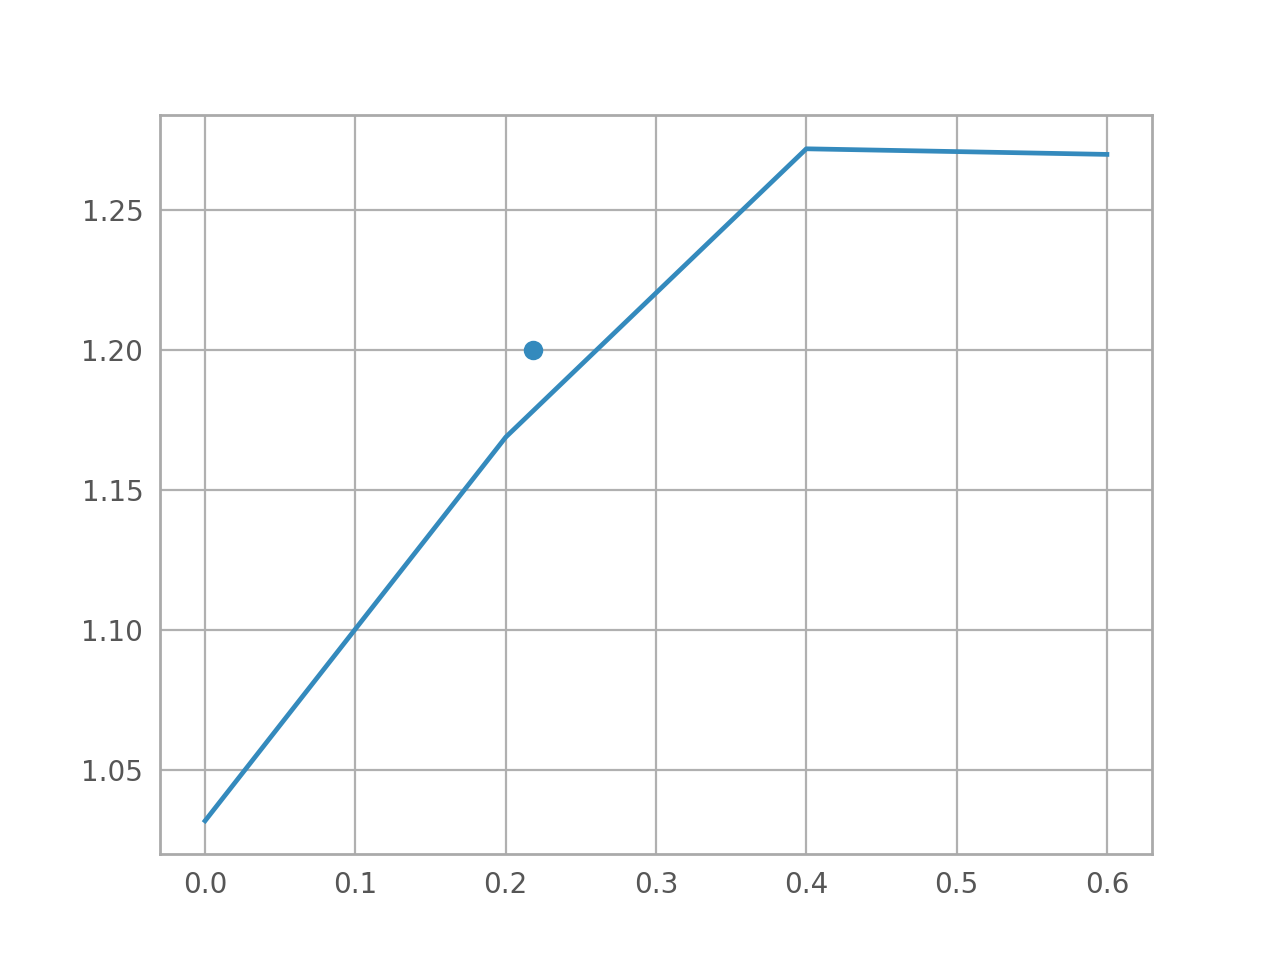

In [70]:
%matplotlib notebook

aplot = plt.plot(riekez[:4], B[:4])
plt.scatter(ez[33], 1.2)

In [71]:
fnu = (mips*u.uJy).to(u.Jy).value
DL = (cosmo.luminosity_distance(z)).to(u.cm).value

riekesfr = np.power(10, (Aarr + Barr * (np.log10(4*np.pi*DL**2*fnu) - 53)))
# scatter of 0.2 dex from Rieke 09
driekesfr = (1-10**-0.2)*riekesfr

In [72]:
# reike SFR for Edge galaxies
efnu = (e24um * u.mJy).to(u.Jy).value
eDL = (cosmo.luminosity_distance(ez)).to(u.cm).value

eriekesfr = np.power(10, (eAarr + eBarr * (np.log10(4*np.pi*eDL**2*efnu) - 53)))
deriekesfr = (1-10**-0.2)*eriekesfr

/Users/dee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


In [73]:
esfridx = np.where(np.isnan(eriekesfr) == False)

In [74]:
testdl = cosmo.luminosity_distance(0.0171).to(u.cm).value

testsfr = np.power(10, (0.4243 + 1.04383 * (np.log10(4*np.pi*testdl**2*0.00403) - 53)))
testsfr

0.05208253607944632

## Recreating the SFR from O'Dea (2012)

In [75]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [76]:
# first interpolate the 15 micron flux from the 24 and the 8 micron fluxes (in mJy)
def um15(um24, um8):
    m = (um24 - um8)/(24 - 8)
    b = um24 - m*24
    return  m*15 + b

In [77]:
# then turn this flux into a luminosity value somehow
def luminosity(z, flux, cosmol):
    return flux * 4 * np.pi * cosmol.luminosity_distance(z).to(u.cm) ** 2

In [78]:
def nulnu(z, flux, lam, cosmol):
    lum = luminosity(z, flux*u.Jy, cosmol)
    nulnu = lum*(lam*u.um).to(u.Hz, equivalencies=u.spectral())
    return nulnu.to(u.erg/u.s).to(u.Lsun)

In [79]:
# change this 15um luminosity into a total IR luminosity
def e02lir(um15val):
    
    nulnup = np.power(um15val, 0.998)
    
    return (11.1*nulnup, 16.6*nulnup, (11.1-3.7)*nulnup)

## Stellar masses from $3.6 \mu m$ values

In [162]:
our36um

NameError: name 'our36um' is not defined

In [163]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [82]:
# first, very rough pass (M/L = 1, no K-correction) for EDGE
egoodidx = np.where(np.logical_and(e36um > 0, e24um > 0))[0]
eggoodidx = np.where(np.logical_and(np.logical_and(e36um > 0, e24um > 0), edmgas != -1))[0]
emstar_rough = (nulnu(ez, e36um.value, 3.6, cosmo).value)*u.Msun
essfr_rough = eriekesfr[egoodidx]/emstar_rough[egoodidx] * 1e9

In [83]:
# for our BCGs
our36umJy = (our36um*u.uJy).to(u.Jy).value
print(our36umJy)
mstar_rough = (nulnu(z, our36umJy, 3.6, cosmo).value)*u.Msun
ssfr_rough = riekesfr/mstar_rough * 1e9

[2.32550000e-04 2.75483125e-04 2.18268115e-04 1.75487763e-04
 8.00731553e-04 4.47662116e-04 4.61017155e-04 6.56860351e-05
 1.20626868e-04 9.12355141e-05 1.42959489e-04 1.02683903e-04
 6.29139242e-05 2.01927157e-04 6.18520000e-04 3.09190000e-04
 1.61432227e-04 2.13132984e-04 1.67617757e-04 1.87359108e-04
 2.36386337e-04 1.76253482e-04 2.22027588e-04 2.70267013e-04]


In [84]:
# where is the measurement in rest-frame for our galaxies
lamem = 3.6/(1+z)*u.um
elamem = 3.6/(1+ez)*u.um
lamem

<Quantity [1.79704431, 2.47152596, 2.18199123, 2.01956736, 2.98931321,
           2.97027252, 2.67739608, 1.72408013, 1.99247288, 2.08320072,
           2.17306009, 2.30186387, 1.64104808, 2.06015657, 2.79271102,
           2.96284104, 1.99158004, 2.48080819, 2.12409431, 2.14793291,
           2.25706744, 2.72946457, 2.68208368, 2.65343878] um>

In [85]:
# plot the Z=0.02, 11Gyr template

templatespec = np.genfromtxt('/Users/dee/Downloads/bc03/templates/ssp_11gyr_z02.spec')

<IPython.core.display.Javascript object>


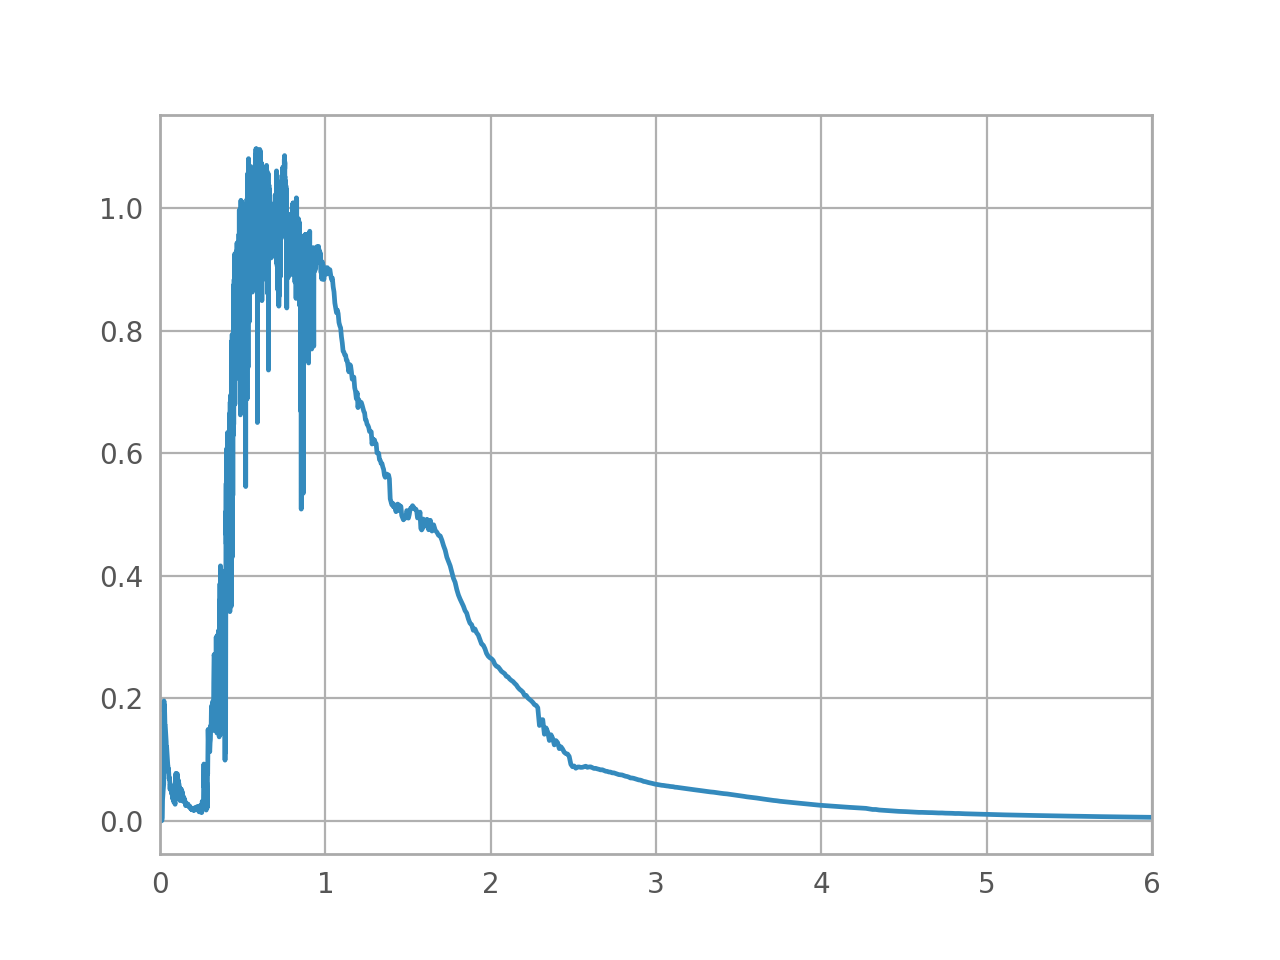

(0, 6)

In [86]:
%matplotlib notebook
lam = (templatespec[:,0]*u.angstrom).to(u.um)
relflux = templatespec[:,1]
plt.plot(lam, templatespec[:,1])
plt.xlim(0, 6)

In [87]:
restframe_kflux = relflux[np.where(np.logical_and(lam > 2.1*u.um, lam < 2.15*u.um))[0]][0]
restframe_kflux

0.235

In [88]:
restframe_relflux = []
tol = 0.005*u.um
for lamemval in lamem:
    restframe_relflux.append(relflux[np.where(np.logical_and(lam > lamemval-tol, lam < lamemval+tol))[0]][0])

In [89]:
elamem

<Quantity [3.12961836, 3.53947498, 3.01003344, 3.48229832, 3.24616772,
           3.3082154 , 2.98013245, 3.26441785, 3.19488818, 3.24324324,
           2.89855072, 2.91497976, 3.42205323, 2.78940028, 3.16177762,
           2.99003322, 3.1926215 , 2.48224505, 3.38983051, 2.87471053,
           2.86214024, 2.64414249, 2.91663291, 3.12662845, 3.04439746,
           3.23159785, 3.34665799, 2.9201817 , 3.31736086, 3.53495679,
           2.49653259, 2.6286966 , 3.53808354, 2.95566502] um>

In [90]:
erestframe_relflux = []
tol = 0.01*u.um
for elamemval in elamem:
    erestframe_relflux.append(np.mean(relflux[np.where(np.logical_and(lam > elamemval-tol, lam < elamemval+tol))]))

In [91]:
restframe_relflux = np.array(restframe_relflux)
kcorr = restframe_kflux / restframe_relflux

In [92]:
erestframe_relflux = np.array(erestframe_relflux)
ekcorr = restframe_kflux / erestframe_relflux

In [93]:
mstar = mstar_rough*kcorr*1.65
dmstar = (1-10**-0.1)*mstar

In [94]:
emstar = emstar_rough*ekcorr*1.65
edmstar = (1-10**-0.1)*emstar

In [95]:
mstar

<Quantity [2.73599294e+11, 1.70855417e+11, 1.56812388e+11, 1.61415841e+11,
           1.34608447e+11, 8.08008263e+10, 1.85642766e+11, 8.07285550e+10,
           1.17574927e+11, 7.66315295e+10, 1.04310117e+11, 6.74453460e+10,
           9.08381488e+10, 1.77895427e+11, 1.84696597e+11, 5.70326316e+10,
           1.57736807e+11, 1.46445114e+11, 1.31526433e+11, 1.40420030e+11,
           1.50716132e+11, 6.21440176e+10, 8.91892001e+10, 1.16989958e+11] solMass>

## Stellar Mass comparison

In [96]:
mstargoodidx = np.where(np.isnan(fastmstar) == False)[0][1:]
mstargoodidx

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 22, 23])

In [97]:
opt, cov = curve_fit(straightline_nob, mstar.value[mstargoodidx], fastmstar[mstargoodidx], p0=[1])
opt

array([0.82683145])

<IPython.core.display.Javascript object>


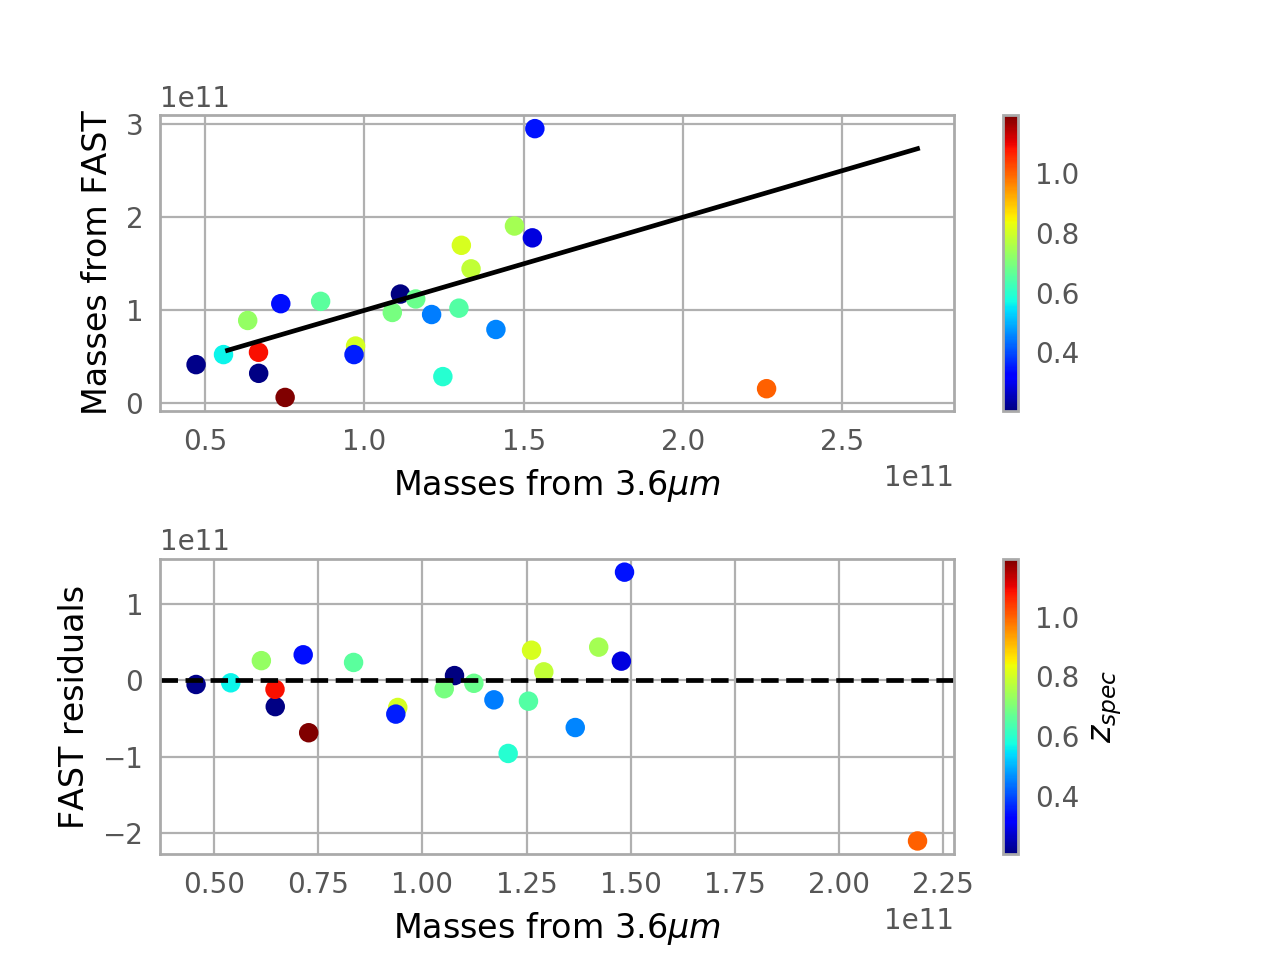

Text(0, 0.5, '$z_{spec}$')

In [98]:
%matplotlib notebook
fig,ax = plt.subplots(2)
im = ax[0].scatter(mstar*opt, fastmstar, c=z, cmap='jet')
xvals = np.linspace(np.min(mstar), np.max(mstar), num=500)
ax[0].plot(xvals, xvals, color='k')
ax[0].set_xlabel(r'Masses from $3.6 \mu m$')
ax[0].set_ylabel('Masses from FAST')
cbar = fig.colorbar(im, ax=ax[0])
cbar.ax.set_ylabel(r'$z_{spec}$')

resids = fastmstar - mstar.value*opt
ax[1].scatter(mstar*0.8, resids, c=z, cmap='jet')
ax[1].axhline(0, color='k', ls='--')
ax[1].set_xlabel(r'Masses from $3.6 \mu m$')
ax[1].set_ylabel('FAST residuals')
cbar = fig.colorbar(im, ax=ax[1])
cbar.ax.set_ylabel(r'$z_{spec}$')

# APPLYING A M/L CORRECTION OF 0.82 TO 3.6um STELLAR MASSES

In [99]:
mstar = 0.82*mstar
emstar = 0.82*emstar

In [100]:
np.nanmax(fastmstar)

295120922666.639

In [101]:
idx = np.where(fastmstar == np.nanmax(fastmstar))[0][0]
print(gals[idx])
print(fastmstar[idx])
print(mstar[idx])

ES1-1
295120922666.639
152227068009.1041 solMass


## sSFRs and errors

In [102]:
ssfr = (riekesfr / mstar * 1e9).value
ssfr_rough = (riekesfr / mstar_rough * 1e9).value

dssfr = (np.sqrt((driekesfr/riekesfr)**2 + (dmstar/mstar)**2)*ssfr).value

In [103]:
essfr = (eriekesfr / emstar * 1e9).value
essfr_rough = (eriekesfr / emstar_rough * 1e9).value

edssfr = (np.sqrt((deriekesfr/eriekesfr)**2 + (edmstar/emstar)**2) * essfr).value

## PLOTS

<IPython.core.display.Javascript object>


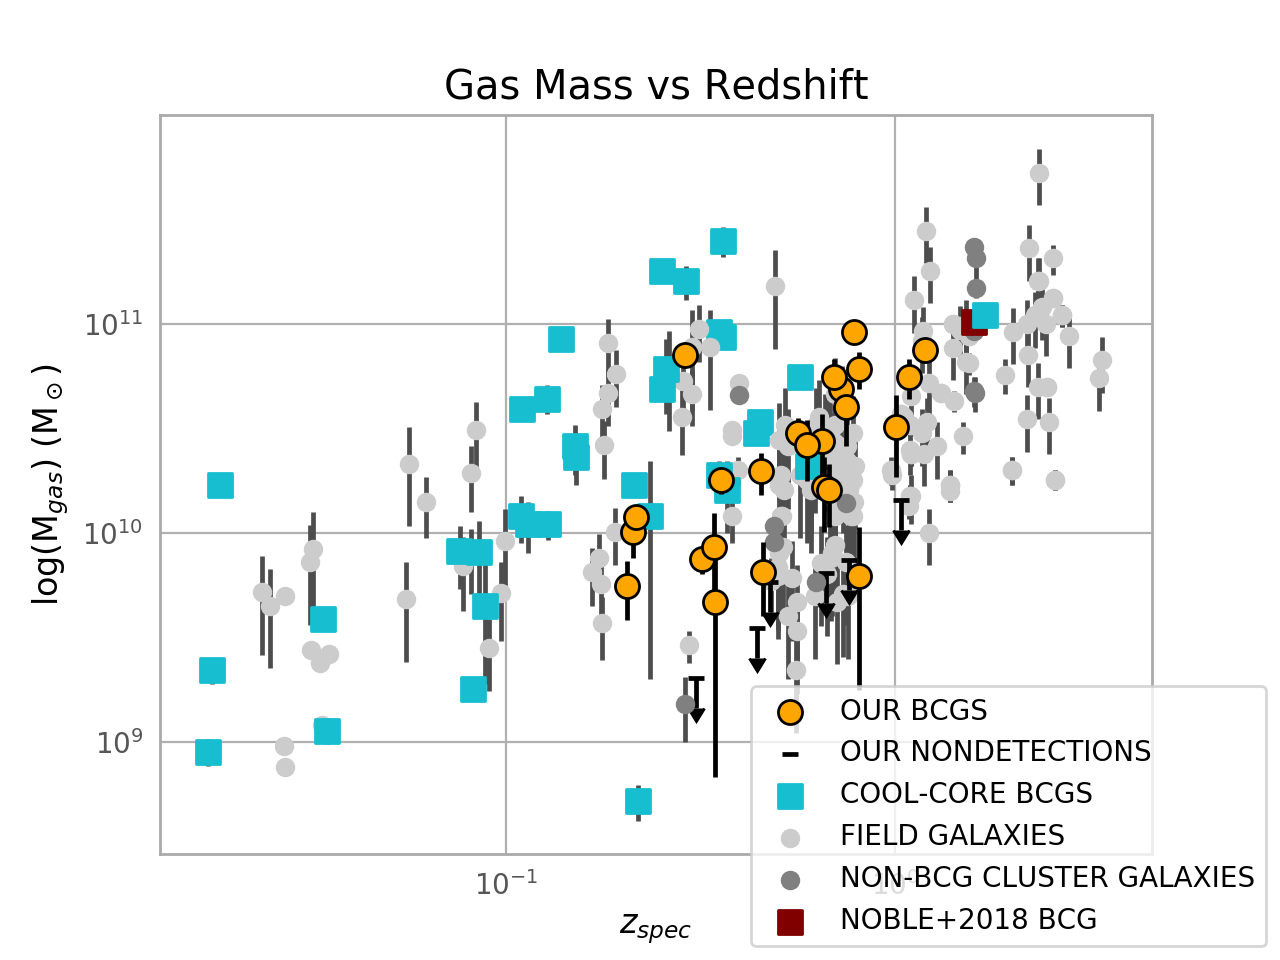

In [104]:
%matplotlib notebook
fig, ax = plt.subplots(1)
ax.scatter(z, mgas, cmap='plasma', s=75, zorder=20, label='OUR BCGS', ec='k', color='orange')
ax.errorbar(z, mgas, yerr=dmgas, color='k', fmt='none', zorder=19)
ax.set_ylabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_xlabel(r'$z_{spec}$')
ax.set_title('Gas Mass vs Redshift')
ax.set_yscale('log')
ax.set_xscale('log')

# our limits
ax.scatter(zlimits, mgaslimits*3, marker='_', color='k', label='OUR NONDETECTIONS', zorder=10)
ax.errorbar(zlimits, mgaslimits*3, yerr=(1-10**-0.8)*mgaslimits, uplims=True, fmt='none', color='k', zorder=10)

# our bkgs
ax.scatter(bkgz, bkgmgas, zorder=18, color='0.5')
ax.errorbar(bkgz, bkgmgas, yerr=bkgdmgas, color='0.3', fmt='none')

# edge01
uplims = np.where(edmgas == -1)
nuplims = np.where(edmgas != -1)
ax.scatter(ez[nuplims], emgas[nuplims], zorder=7, label='COOL-CORE BCGS', marker='s', s=75, color='tab:cyan')
# label='EDGE+01'
ax.errorbar(ez[nuplims], emgas[nuplims], yerr=edmgas[nuplims], color='0.3', fmt='none')
# ax.errorbar(ez[uplims], emgas[uplims], yerr=(1-10**-0.2)*emgas[uplims], uplims=True, fmt='none', color='k')

# castignani
uplims = np.where(cdmgas == -1)
nuplims = np.where(cdmgas != -1)
ax.scatter(cz[nuplims], cmgas[nuplims], zorder=5, marker='s', s=75, color='tab:cyan')#  label="CASTIGNANI+2020", 
ax.errorbar(cz[nuplims], cmgas[nuplims], yerr=cdmgas[nuplims], color='0.3', fmt='none')
# ax.errorbar(cz[uplims], cmgas[uplims], yerr=(1-10**-0.2)*cmgas[uplims], uplims=True, fmt='none', color='k')

# Genzel
ax.scatter(gz, gmgas, zorder=5, color='0.8') # label='GENZEL+2010', 
ax.errorbar(gz, gmgas, yerr=gdmgas, color='0.3', fmt='none')

# Geach
ax.scatter(geachz, geachmgas, zorder=5, color='0.8') #label = 'GEACH+2011'
ax.errorbar(geachz, geachmgas, yerr=geachdmgas, color='0.3', fmt='none')

# decarli 
uplims = np.where(decdmgas < 0)
nuplims = np.where(decdmgas > 0)
ax.scatter(decz[nuplims], decmgas[nuplims], zorder=5, color='0.8', label='FIELD GALAXIES')
#  label='DECARLI+2016',
ax.errorbar(decz[nuplims], decmgas[nuplims], yerr=decdmgas[nuplims], color='0.3', fmt='none')
# ax.errorbar(decz[uplims], decmgas[uplims], yerr=(1-10**-0.2)*decmgas[uplims], uplims=True, fmt='none', color='k')

# # castignani 2
# ax.scatter(c2z, c2mgas, zorder=5, label='CASTIGNANI+2019')
# ax.errorbar(c2z, c2mgas, yerr=(1-10**-0.2)*c2mgas, uplims=True, fmt='none', color='k')

# brownson
ax.scatter(bz, bmgas, zorder=5, color='0.8') # label='BROWNSON+2020',

# aravena (ASPECS)
ax.scatter(az, amgas, zorder=5, color='0.8') #  label='ARAVENA+2020', 
ax.errorbar(az, amgas, yerr=admgas, color='0.3', fmt='none')

# ASPECS 2 (aravena)
ax.scatter(a2z, a2mgas, zorder=5, color='0.8') # label='ARAVENA+2020', 
ax.errorbar(a2z, a2mgas, yerr=a2dmgas, color='0.3', fmt='none')

# PHIBSS2
ax.scatter(phibss2z, phibss2mgas, zorder=5, color='0.8') # label='PHIBBS2', 
ax.errorbar(phibss2z, phibss2mgas, yerr=phibss2dmgas, color='0.3', fmt='none')

# jablonka
ax.scatter(jabz, jabmgas, zorder=5, color='0.5') # label='JABLONKA+2013', 
ax.errorbar(jabz, jabmgas, yerr=jabdmgas, color='0.3', fmt='none')

# combes
ax.scatter(combesz, combesmgas, zorder=5, color='0.8') # label='COMBES+2013', 
ax.errorbar(combesz, combesmgas, yerr=combesdmgas, color='0.3', fmt='none')

# braun
nuplims = np.where(braundmgas != -99)[0]
ax.scatter(braunz[nuplims], braunmgas[nuplims], zorder=5, color='0.8') # label='BRAUN+2011', 
ax.errorbar(braunz[nuplims], braunmgas[nuplims], yerr=braundmgas[nuplims], color='0.3', fmt='none')

# hatsukade GRB hosts
ax.scatter(hz, hmgas, zorder=5, color='0.8') # label='HATSUKADE+2020'
ax.errorbar(hz, hmgas, yerr=hdmgas, color='0.3', fmt='none')

# egnog
ax.scatter(egnogz, egnogmgas, zorder=5, color='0.8')# label='BAUERMEISTER+2013'
ax.errorbar(egnogz, egnogmgas, yerr=egnogdmgas, color='0.3', fmt='none')

# noble
ax.scatter(nz[0:6], nmgas[0:6], zorder=5, color='0.5', label='NON-BCG CLUSTER GALAXIES')# label='NOBLE+2018' 
ax.errorbar(nz[0:6], nmgas[0:6], yerr=ndmgas[0:6], color='0.3', fmt='none')
ax.scatter(nz[-1], nmgas[-1], zorder=5, label='NOBLE+2018 BCG', s=75, marker='s', color='maroon')

# # dabhade
# ax.scatter(dabz, dabmgas, zorder=5, label='DABHADE+2020')
# ax.errorbar(dabz, dabmgas, yerr=(1-10**-0.2)*dabmgas, uplims=True, fmt='none', color='k')

# mcnamara BCG
ax.scatter(mcz, mcmgas, zorder=5,  marker='s', s=75, color='tab:cyan') # label='A1835 BCG',
ax.errorbar(mcz, mcmgas, yerr=mcdmgas, color='0.3', fmt='none')

# vantyghem 
ax.scatter(vz, vmgas, zorder=5, marker='s', s=75, color='tab:cyan') # label='2A 0335+096 BCG', 
ax.errorbar(vz, vmgas, yerr=vdmgas, color='0.3', fmt='none')

# russell
ax.scatter(rusz, rusmgas, zorder=5, marker='s', s=75, color='tab:cyan') # label='A1664 BCG', 
ax.errorbar(rusz, rusmgas, yerr=rusdmgas, color='0.3', fmt='none')

# fogarty (cool-core)
ax.scatter(fz, fmgas, zorder=5, marker='s', s=75, color='tab:cyan') # label='MACS 1931.8-2635 BCG', 
ax.errorbar(fz, fmgas, yerr=fdmgas, color='0.3', fmt='none')

# tremblay
ax.scatter(tz, tmgas, zorder=5, marker='s', s=75, color='tab:cyan') # label='A2597 BCG', 
ax.errorbar(tz, tmgas, yerr=tdmgas, color='0.3', fmt='none')

# russell (phoenix cluster)
ax.scatter(pz, pmgas, zorder=5, marker='s', s=75, color='tab:cyan') # label='PHOENIX BCG', 
ax.errorbar(pz, pmgas, yerr=pdmgas, color='0.3', fmt='none')



# 1049
ax.scatter(z1049, mgas1049, zorder=5, marker='s', s=75, color='tab:cyan') # label='SpARCS1049 BCG', 
ax.errorbar(z1049, mgas1049, yerr=dmgas1049, color='0.3', fmt='none')

fig.legend(loc='lower right', fontsize=10)

<IPython.core.display.Javascript object>


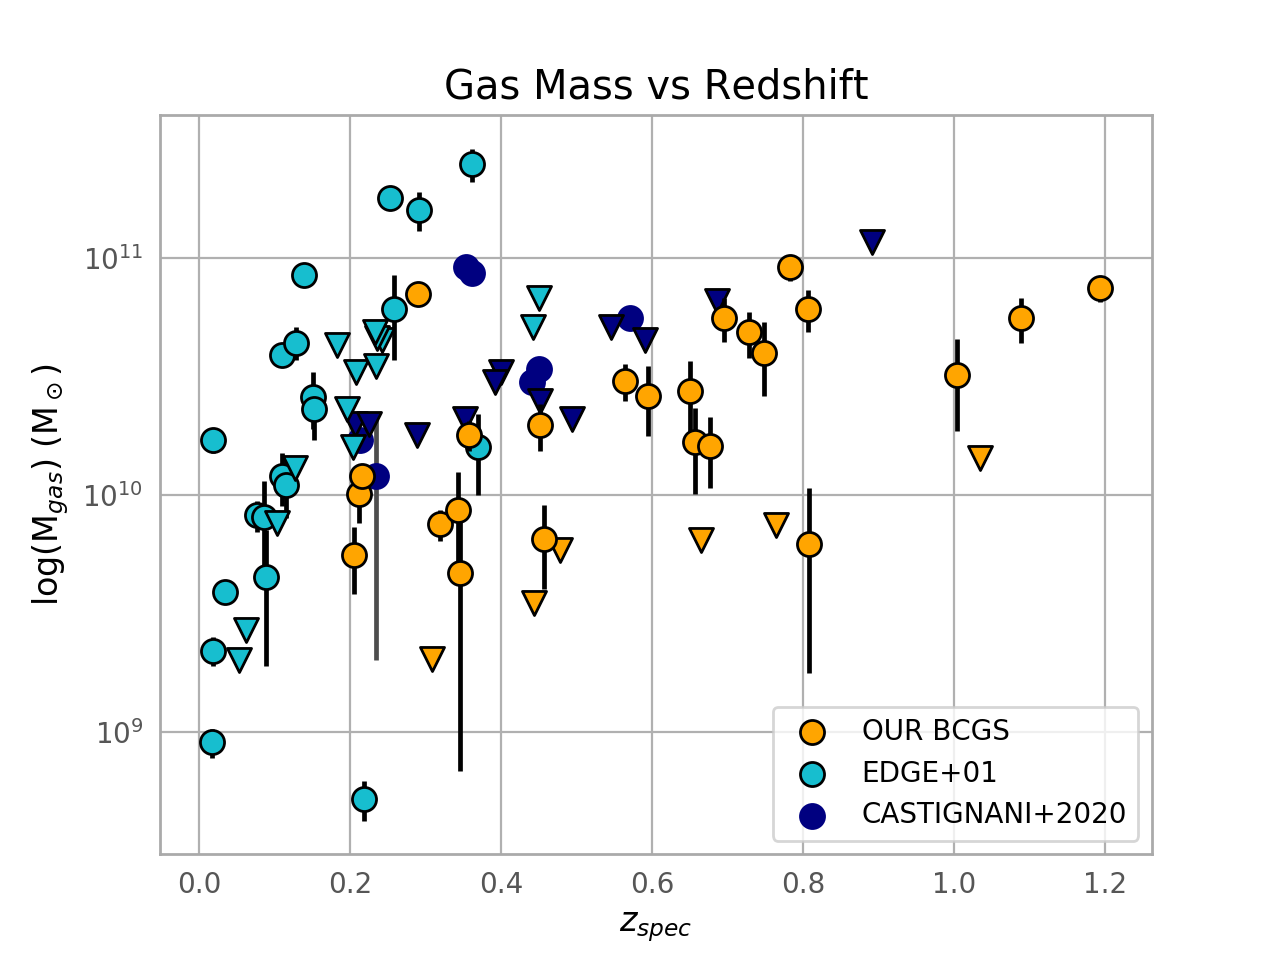

In [105]:
# gas mass vs redshift for just BCGs, with limits included
%matplotlib notebook
fig, ax = plt.subplots(1)
ax.scatter(z, mgas, cmap='plasma', s=75, zorder=20, label='OUR BCGS', ec='k', color='orange')
ax.errorbar(z, mgas, yerr=dmgas, color='k', fmt='none', zorder=19)
ax.set_ylabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_xlabel(r'$z_{spec}$')
ax.set_title('Gas Mass vs Redshift')
ax.set_yscale('log')
# ax.set_xscale('log')

# our limits
ax.scatter(zlimits, mgaslimits*3, marker='v', color='orange', ec='k', zorder=10, s=75)

# edge01
uplims = np.where(edmgas == -1)
nuplims = np.where(edmgas != -1)
ax.scatter(ez[nuplims], emgas[nuplims], zorder=7, label='EDGE+01', ec='k', s=75, color='tab:cyan')
ax.errorbar(ez[nuplims], emgas[nuplims], yerr=edmgas[nuplims], color='k', fmt='none')
ax.scatter(ez[uplims], emgas[uplims], zorder=7, ec='k', marker='v', color='tab:cyan', s=75)

# castignani
uplims = np.where(cdmgas == -1)
nuplims = np.where(cdmgas != -1)
ax.scatter(cz[nuplims], cmgas[nuplims], zorder=5, s=75, color='navy', label="CASTIGNANI+2020")
ax.errorbar(cz[nuplims], cmgas[nuplims], yerr=cdmgas[nuplims], color='0.3', fmt='none')
ax.scatter(cz[uplims], cmgas[uplims], zorder=5, ec='k', marker='v', color='navy', s=75)

ax.legend()

<IPython.core.display.Javascript object>


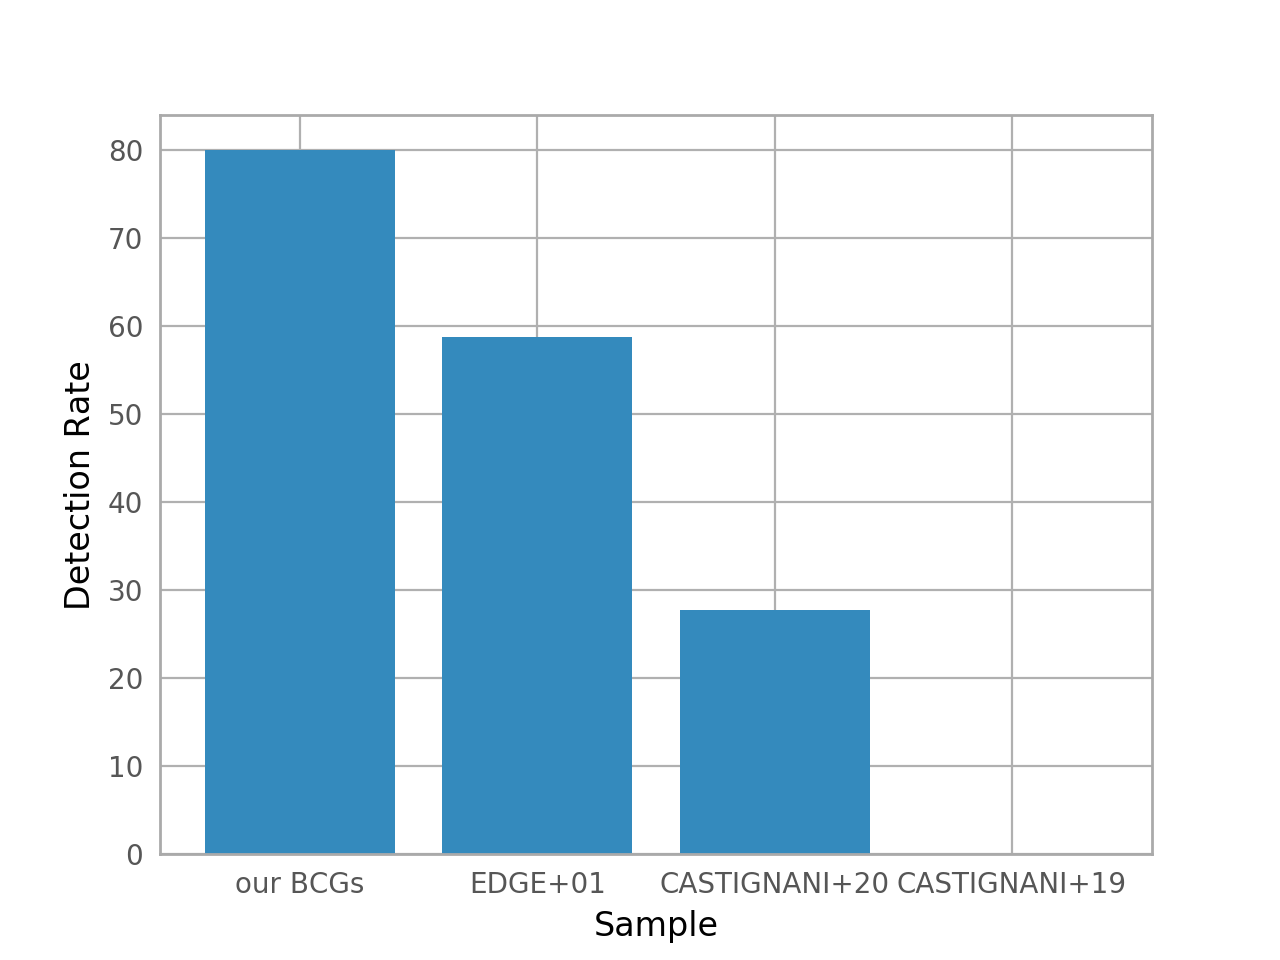

Text(0.5, 0, 'Sample')

In [106]:
# sample gas fractions
%matplotlib notebook

fig,ax = plt.subplots(1)

studies=('our BCGs', 'EDGE+01', 'CASTIGNANI+20', 'CASTIGNANI+19')
detectionrate = np.array([24/30, len(np.where(edmgas > 0)[0])/len(emgas), 5/18, 0])*100
ax.bar(studies, detectionrate)
ax.set_ylabel('Detection Rate')
ax.set_xlabel('Sample')

In [107]:
dmgaslimits = -1*np.ones(len(mgaslimits))

<IPython.core.display.Javascript object>


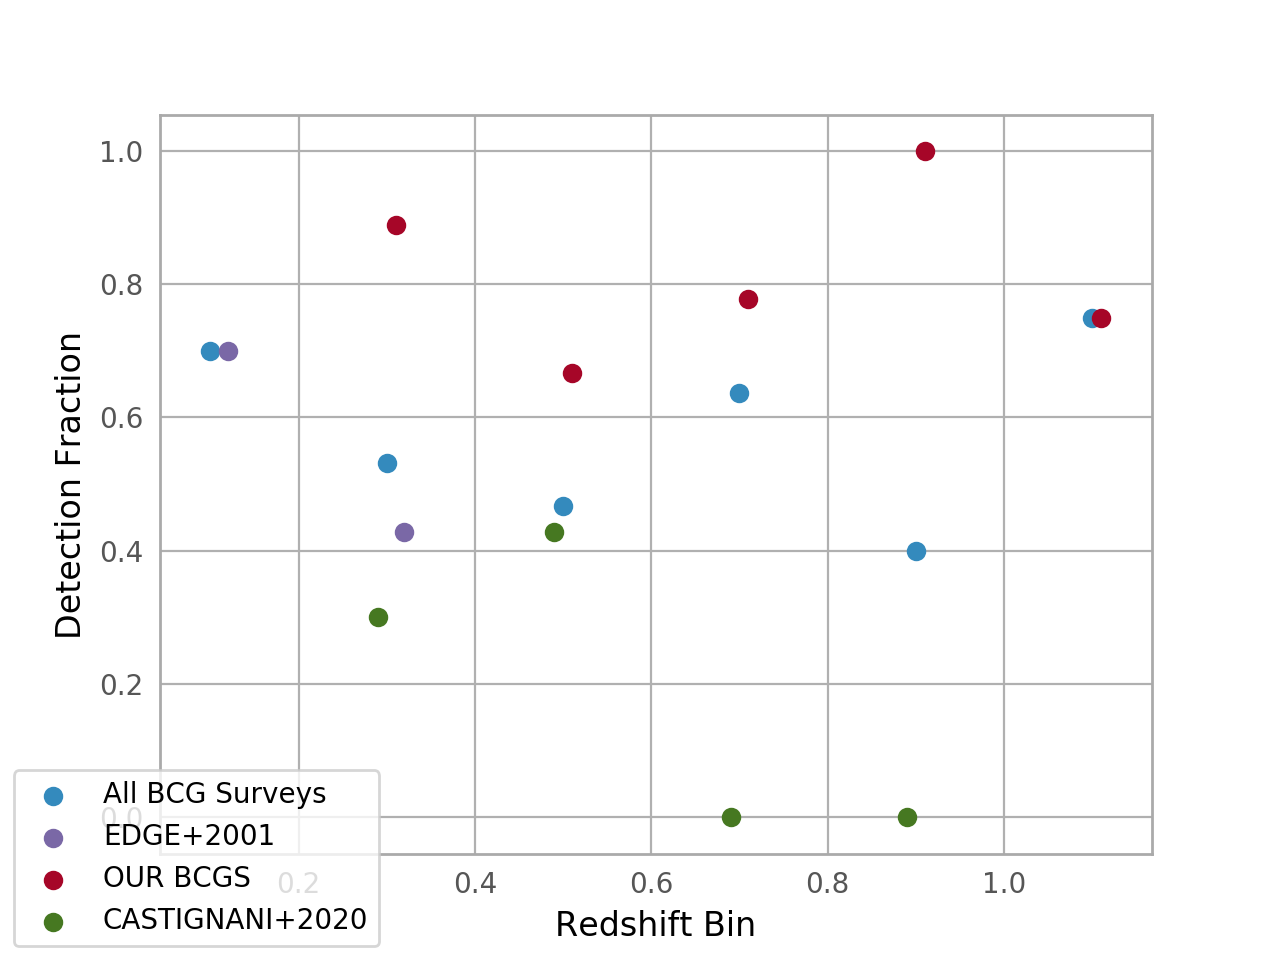

In [538]:
# detection fraction by redshift
bcgz = np.concatenate((z, zlimits, ez, cz, c2z))
bcgmgas = np.concatenate((mgas, mgaslimits, emgas, cmgas, c2mgas))
bcgdmgas = np.concatenate((dmgas, dmgaslimits, edmgas, cdmgas, c2dmgas))

zbins = np.arange(0., 1.6, step=0.2)
binidx = []
for zidx in range(len(zbins) - 1):
    thiszidx_idx = np.where(np.logical_and(bcgz > zbins[zidx], bcgz < zbins[zidx+1]))[0]
    binidx.append(thiszidx_idx)
    
fracs = []
for arr in binidx:
    total = len(arr)
    dec = len(np.where(bcgdmgas[arr] > 0)[0])
    if total == 0:
        fracs.append((np.nan))
    else:
        fracs.append((dec/total))
    
ourbcgz = np.concatenate((z, zlimits))
ourbcgdmgas = np.concatenate((dmgas, dmgaslimits))

ourbinidx = []
for zidx in range(len(zbins) - 1):
    thiszidx_idx = np.where(np.logical_and(ourbcgz > zbins[zidx], ourbcgz < zbins[zidx+1]))[0]
    ourbinidx.append(thiszidx_idx)
    
ourfracs = []
for arr in ourbinidx:
    total = len(arr)
    dec = len(np.where(ourbcgdmgas[arr] > 0)[0])
    if total == 0:
        ourfracs.append((np.nan))
    else:
        ourfracs.append((dec/total))
    
cbinidx = []
for zidx in range(len(zbins) - 1):
    thiszidx_idx = np.where(np.logical_and(cz > zbins[zidx], cz < zbins[zidx+1]))[0]
    cbinidx.append(thiszidx_idx)
    
cfracs = []
for arr in cbinidx:
    total = len(arr)
    dec = len(np.where(cdmgas[arr] > 0)[0])
    if total == 0:
        cfracs.append((np.nan))
    else:
        cfracs.append((dec/total))
    
ezbins = np.array([0.12, 0.32])
efracs = np.array([14/20, 6/14])
    
%matplotlib notebook

fig,ax = plt.subplots(1)

ax.scatter(zbins[:7]+0.1, fracs, label='All BCG Surveys')
ax.scatter(ezbins, efracs, label='EDGE+2001')
ax.scatter(zbins[:7]+0.11, ourfracs, label='OUR BCGS')
ax.scatter(zbins[:7]+0.09, cfracs, label='CASTIGNANI+2020')
ax.set_xlabel('Redshift Bin')
ax.set_ylabel('Detection Fraction')
fig.legend(loc='lower left')

<IPython.core.display.Javascript object>


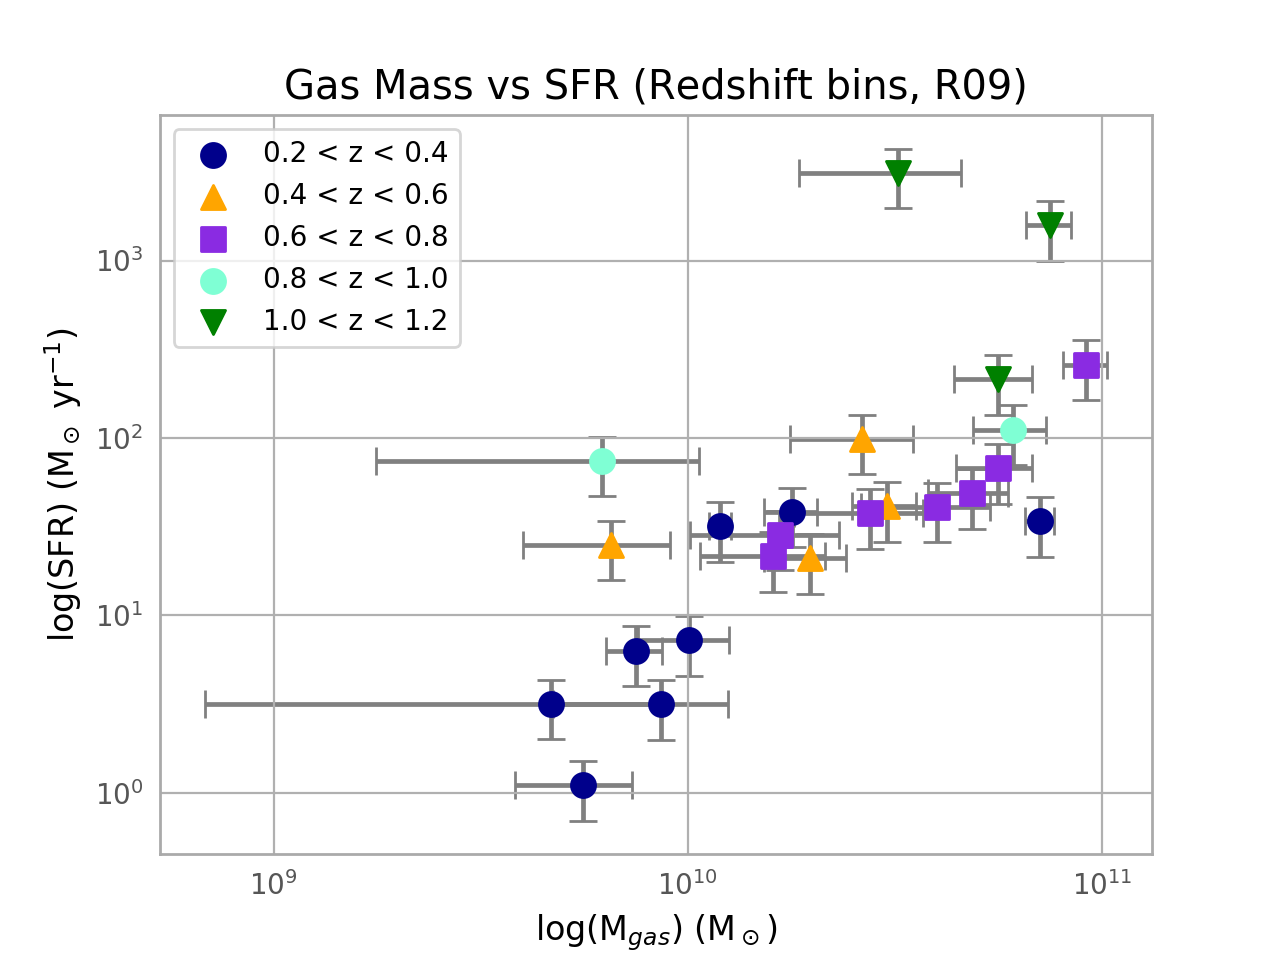

Text(0.5, 1.0, 'Gas Mass vs SFR (Redshift bins, R09)')

In [549]:
%matplotlib notebook
fig, ax = plt.subplots(1)
colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', 'o', 'v']
for i in range(len(zidx)):
    ax.scatter(mgas[zidx[i][0]], riekesfr[zidx[i][0]], label='{:.1f} < z < {:.1f}'.format(zbins[i], zbins[i + 1]),
              color=colors[i], marker=markers[i], s=75)
    ax.errorbar(mgas[zidx[i][0]], riekesfr[zidx[i][0]], xerr=dmgas[zidx[i][0]], yerr=driekesfr[zidx[i][0]], 
                color='0.5', fmt='none', zorder=0, capsize=5)
ax.set_xlabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_ylabel(r'$\log (\mathrm{SFR}) \ (\mathrm{M}_\odot \ \mathrm{yr}^{-1})$')
ax.set_xscale('log')
ax.set_yscale('log')

xvals = np.linspace(np.min(np.log10(mgas)), np.max(np.log10(mgas)), num=500)
# ax.plot(xvals, straightline(xvals, *opt))

ax.legend()
ax.set_title('Gas Mass vs SFR (Redshift bins, R09)')

<IPython.core.display.Javascript object>


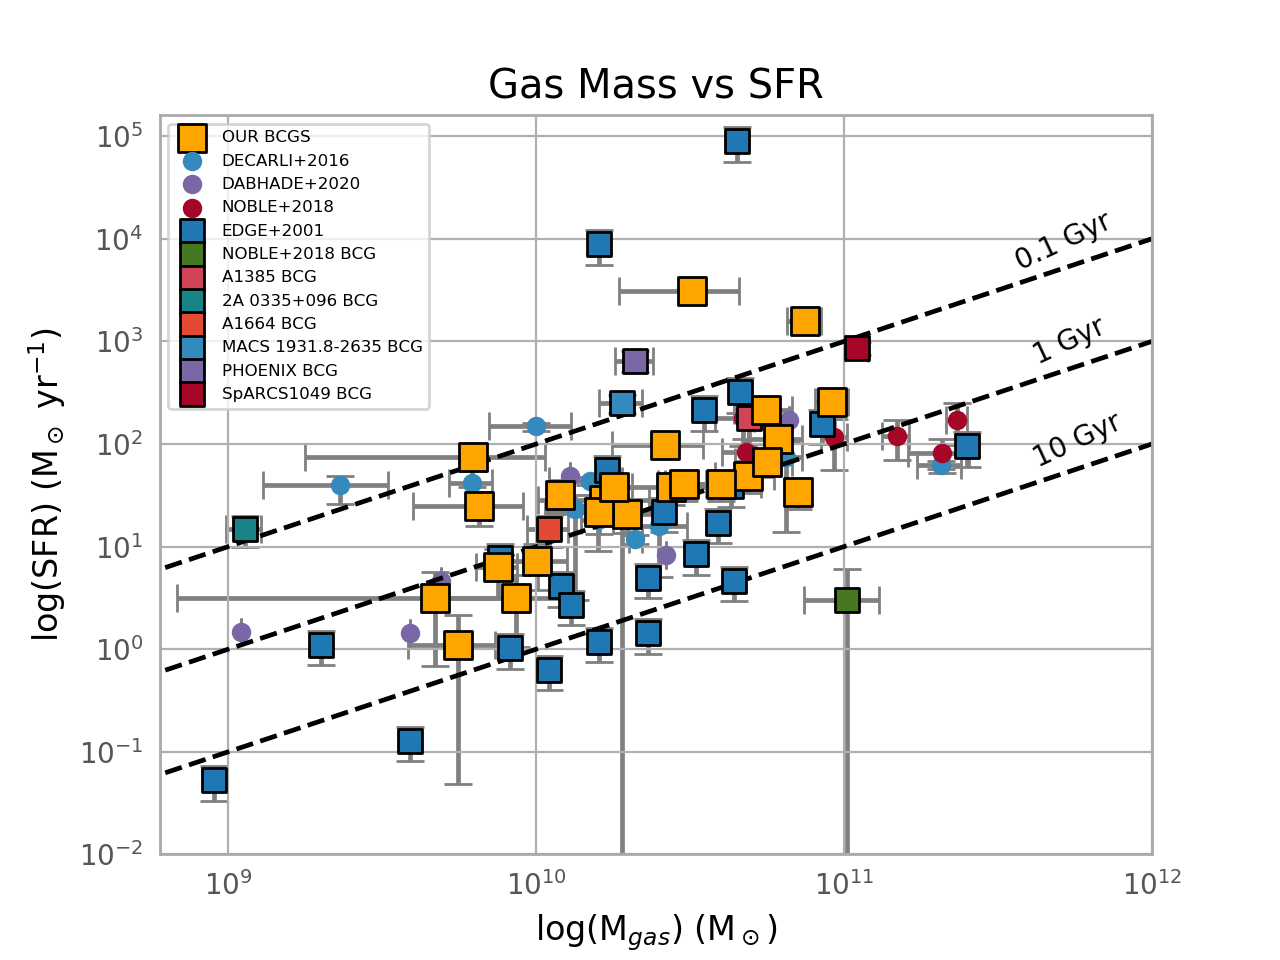

Text(0.5, 1.0, 'Gas Mass vs SFR')

In [108]:
%matplotlib notebook
fig, ax = plt.subplots(1)
colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', 'o', 'v']
# for i in range(len(zidx)):
#     ax.scatter(mgas[zidx[i][0]], mips_sfr_ce[zidx[i][0]].value, label='{:.1f} < z < {:.1f}'.format(zbins[i], zbins[i + 1]),
#               color=colors[i], marker=markers[i], s=75)
#     ax.errorbar(mgas[zidx[i][0]], mips_sfr_ce[zidx[i][0]].value, xerr=dmgas[zidx[i][0]], yerr=mips_sfr_err[zidx[i][0]].value, 
#                 color='0.5', fmt='none', zorder=0, capsize=5)
    
ax.scatter(mgas, riekesfr, label='OUR BCGS', s=100, ec='k', zorder=20, color='orange', marker='s')
ax.errorbar(mgas, riekesfr, xerr=dmgas, yerr=mips_sfr_err.value, color='0.5', fmt='none', zorder=0, capsize=5)
    
    
ax.scatter(decmgas, decsfr, label='DECARLI+2016')
ax.errorbar(decmgas, decsfr, xerr=decdmgas, yerr=np.stack((decdsfrup, decdsfrdown), axis=0),
           color='0.5', fmt='none', zorder=0, capsize=5)

ax.scatter(dabmgas, dabsfr, label='DABHADE+2020')
ax.errorbar(dabmgas, dabsfr, xerr=dabdmgas, color='0.5', fmt='none', zorder=0, capsize=5)

ax.scatter(nmgas[:6], nsfr[:6], label='NOBLE+2018')
ax.errorbar(nmgas[:6], nsfr[:6], xerr=ndmgas[:6], yerr=ndsfr[:6], color='0.5', fmt='none', zorder=0, capsize=5)

# esfridx = np.where(esfr != -99)
# ax.scatter(emgas[esfridx], esfr[esfridx], label='EDGE+2001', marker='s', s=75, zorder=5, ec='k')
ax.scatter(emgas[esfridx], eriekesfr[esfridx], label='EDGE+2001', marker='s', s=75, zorder=5, ec='k', color='tab:blue')
ax.errorbar(emgas[esfridx], eriekesfr[esfridx], yerr=deriekesfr[esfridx], color='0.5', fmt='none', zorder=0,
           capsize=5)

ax.scatter(nmgas[-1], nsfr[-1], label='NOBLE+2018 BCG', marker='s', s=75, zorder=5, ec='k')
ax.errorbar(nmgas[-1], nsfr[-1], xerr=ndmgas[-1], yerr=ndsfr[-1], color='0.5', fmt='none', zorder=0, capsize=5)

ax.scatter(mcmgas, mcsfr, label='A1385 BCG', marker='s', s=75, zorder=5, ec='k')
ax.errorbar(mcmgas, mcsfr, xerr=mcdmgas, yerr=mcdsfr, color='0.5', fmt='none', zorder=0, capsize=5)

ax.scatter(vmgas, vsfr, label='2A 0335+096 BCG', marker='s', s=75, zorder=5, ec='k')
ax.errorbar(vmgas, vsfr, xerr=vdmgas, yerr=vdsfr, color='0.5', fmt='none', zorder=0, capsize=5)

ax.scatter(rusmgas, russfr, zorder=5, label='A1664 BCG', marker='s', s=75, ec='k')
ax.errorbar(rusmgas, russfr, xerr=rusdmgas, yerr=rusdsfr, color='0.5', fmt='none', zorder=0, capsize=5)

ax.scatter(fmgas, fsfr, zorder=5, label='MACS 1931.8-2635 BCG', marker='s', s=75, ec='k')
ax.errorbar(fmgas, fsfr, xerr=fdmgas, yerr=50, color='0.5', fmt='none', zorder=0, capsize=5)

ax.scatter(pmgas, psfr, zorder=5, label='PHOENIX BCG', marker='s', s=75, ec='k')
ax.errorbar(pmgas, psfr, xerr=pdmgas, yerr=pdsfr, color='0.5', fmt='none', zorder=0, capsize=5)

ax.scatter(mgas1049, sfr1049, zorder=5, label='SpARCS1049 BCG', marker='s', s=75, ec='k')
ax.errorbar(mgas1049, sfr1049, xerr=dmgas1049, yerr=dsfr1049, color='0.5', fmt='none', zorder=0, capsize=5)

ax.set_xlabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_ylabel(r'$\log (\mathrm{SFR}) \ (\mathrm{M}_\odot \ \mathrm{yr}^{-1})$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2, 1e5+6e4)
ax.set_xlim(6e8, 1e12)

xvals = np.linspace(np.min(np.log10(mgas)), np.max(np.log10(mgas)), num=500)
# ax.plot(xvals, straightline(xvals, *opt))

# whitaker sfr-mgas main sequence: log(SFR) = a(z)(logM*-10.5) + b(z)
# for z = 0.8
a08 = 0.7 - 0.13*(0.8)
b08 = 0.38 + 1.14*0.8 - 0.19*0.8**2

# for z = 0.2
a01 = 0.7 - 0.13*0.1
b01 = 0.38 + 1.14*0.1 - 0.19*0.1**2

mgasrange = np.linspace(1e8, 1e12, num=500)
# ax.plot(mgasrange, np.power(10, a08*(np.log10(mgasrange) - 10.5) + b08), color='k')
# ax.plot(mgasrange, np.power(10, a01*(np.log10(mgasrange) - 10.5) + b01))
ax.plot(mgasrange, 1/1e9*mgasrange, color='k', ls='--')
ax.plot(mgasrange, 1/1e8*mgasrange, color='k', ls='--')
ax.plot(mgasrange, 1/1e10*mgasrange, color='k', ls='--')

ax.annotate('0.1 Gyr', xy=(3.5e11, 5e3), rotation=25)
ax.annotate('1 Gyr', xy=(4e11, 6e2), rotation=25)
ax.annotate('10 Gyr', xy=(4e11, 6e1), rotation=25)

ax.legend(fontsize=6)
ax.set_title('Gas Mass vs SFR')

<IPython.core.display.Javascript object>


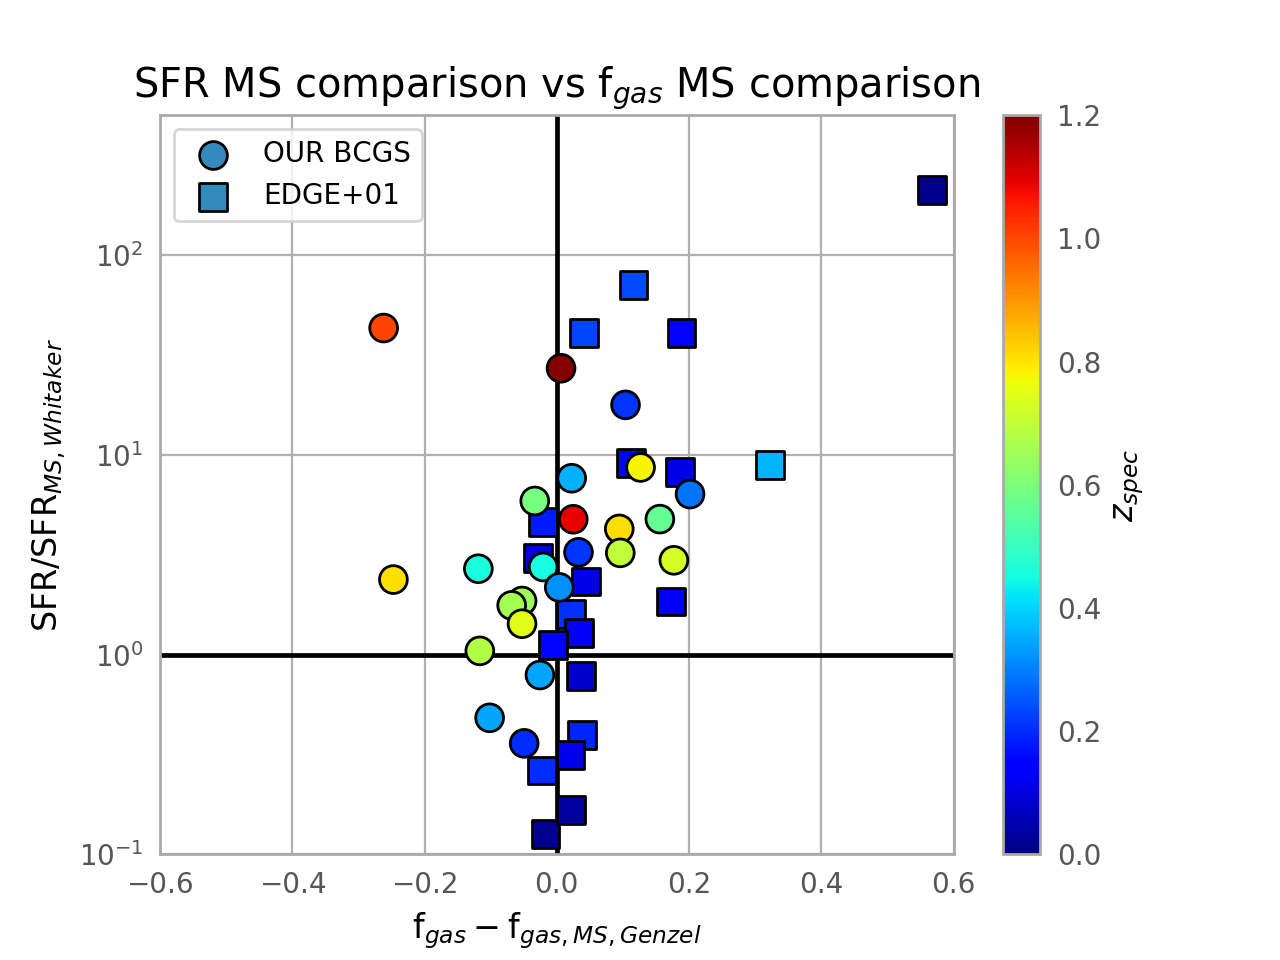

In [109]:
# gas mass vs distance from the SFR main sequence of whitaker (2012)
aarr = 0.7 - 0.13*z
barr = 0.38 + 1.14*z - 0.19*z**2

eaarr = 0.7 - 0.13*ez
ebarr = 0.38 + 1.14*ez - 0.19*ez**2

sfrms = np.power(10, aarr*(np.log10(mstar_rough.value) - 10.5) + barr)
esfrms = np.power(10, eaarr[egoodidx]*(np.log10(emstar_rough[egoodidx].value) - 10.5) + ebarr[egoodidx])

sfr_msdistance = (riekesfr) / sfrms
esfr_msdistance = (eriekesfr[egoodidx]) / esfrms

fgas_ms = np.power(10, 2.71*np.log10(1+z) - 1.23)
efgas_ms = np.power(10, 2.71*np.log10(1+ez) - 1.23)

fgas_msdistance = mgas / (mgas + mstar.value) - fgas_ms
efgas_msdistance = emgas / (emgas + emstar.value) - efgas_ms

%matplotlib notebook
fig, ax = plt.subplots(1)

im = ax.scatter(fgas_msdistance, sfr_msdistance, c=z, label='OUR BCGS', marker='o', s=100, vmin=0, vmax=1.2, 
                cmap='jet', ec='k', zorder=10)
ax.scatter(efgas_msdistance[egoodidx], esfr_msdistance, c=ez[egoodidx], label='EDGE+01', marker='s', s=100, 
           vmin=0, vmax=1.2, cmap='jet', ec='k', zorder=5)


ax.set_xlabel(r'$\mathrm{f}_{gas}  - \mathrm{f}_{gas, MS, Genzel}$')
ax.set_ylabel(r'$\mathrm{SFR} / \mathrm{SFR}_{MS, Whitaker}$')

cmap = fig.colorbar(im)
cmap.ax.set_ylabel(r'$z_{spec}$')

ax.set_title(r'SFR MS comparison vs $\mathrm{f}_{gas}$ MS comparison')
ax.axhline(1, color='k', zorder=1)
ax.axvline(0, color='k', zorder=1)

ax.set_yscale('log')
ax.set_xlim(-0.6, 0.6)
ax.set_ylim(1e-1, 500)

ax.legend()

In [110]:
sig = np.log10(ssfr+dssfr) - np.log10(ssfr)
opt, cov = curve_fit(straightline, np.log10(mgas), np.log10(ssfr), p0=[1e-4, 0], sigma=sig)
opt

esig = np.log10(essfr[eggoodidx]+edssfr[eggoodidx]) - np.log10(essfr[eggoodidx])
eopt, ecov = curve_fit(straightline, np.log10(emgas[eggoodidx]), 
                       np.log10(essfr[eggoodidx]), p0=[1e-4, 0], sigma=esig)

<IPython.core.display.Javascript object>


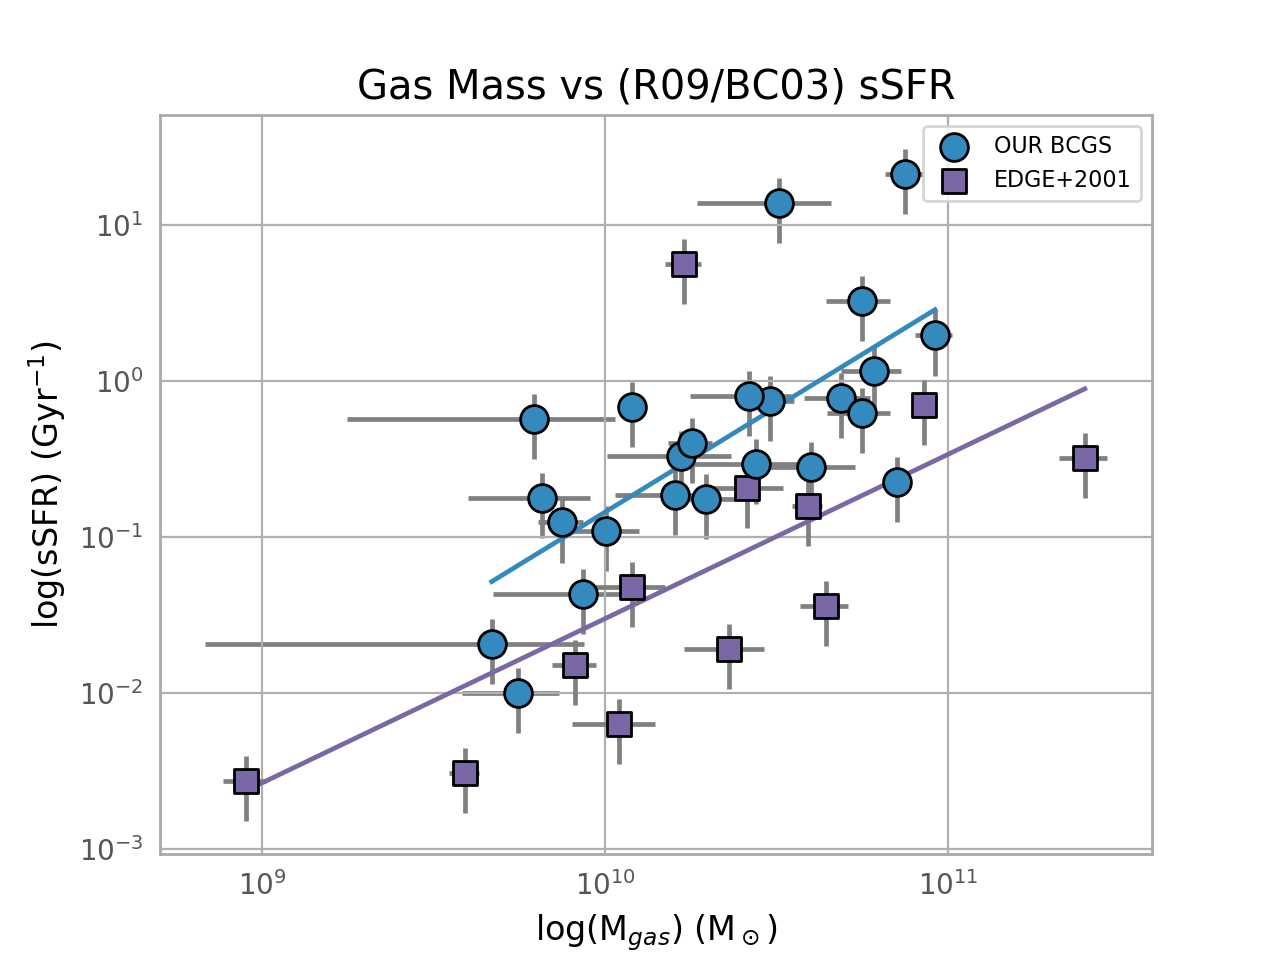

Text(0.5, 1.0, 'Gas Mass vs (R09/BC03) sSFR')

In [111]:
%matplotlib notebook
fig, ax = plt.subplots(1)
colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', 'o', 'v']
    
ax.scatter(mgas, ssfr, label='OUR BCGS', s=100, ec='k', zorder=20)
ax.errorbar(mgas, ssfr, xerr=dmgas, yerr=dssfr, color='0.5', fmt='none', zorder=0) 


# EDGE
ax.scatter(emgas[eggoodidx], essfr[eggoodidx], zorder=5, label='EDGE+2001', marker='s', s=75, ec='k')
ax.errorbar(emgas[eggoodidx], essfr[eggoodidx], xerr=edmgas[eggoodidx], yerr=edssfr[eggoodidx], color='0.5', fmt='none')

ax.set_xlabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_ylabel(r'$\log (\mathrm{sSFR}) \ (\mathrm{Gyr}^{-1})$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim((1e-3, 1e2))
# ax.set_xlim((6e8, 8e11))

xvals = np.linspace(np.min((mgas)), np.max((mgas)), num=500)
ax.plot(xvals, np.power(10, straightline(np.log10(xvals), *opt)))

exvals = np.linspace(np.min(emgas[eggoodidx]), np.max(emgas[eggoodidx]), num=500)
ax.plot(exvals, np.power(10, straightline(np.log10(exvals), *eopt)))

ax.legend(fontsize=8)
ax.set_title('Gas Mass vs (R09/BC03) sSFR')

##  Check to see if offsets are significantly different

In [134]:
meanslope = np.mean((opt[0], eopt[0]))
def line_fixed_slope(xvals, offset):
    return meanslope*xvals + offset

In [218]:
mfix_opt, mfix_cov = curve_fit(line_fixed_slope, np.log10(mgas), np.log10(ssfr), p0=[-12], sigma=sig)
print(mfix_opt, np.sqrt(mfix_cov))

[-12.80201102] [[0.11091856]]


In [217]:
mfix_eopt, mfix_ecov = curve_fit(line_fixed_slope, np.log10(emgas[eggoodidx]), np.log10(essfr[eggoodidx]), 
                                 p0=[-12], sigma=esig)
print(mfix_eopt, np.sqrt(mfix_ecov))

[-13.57266485] [[0.21868001]]


In [145]:
eopt + np.sqrt(cov) + np.sqrt(ecov)

array([[-13.24306628]])

<IPython.core.display.Javascript object>


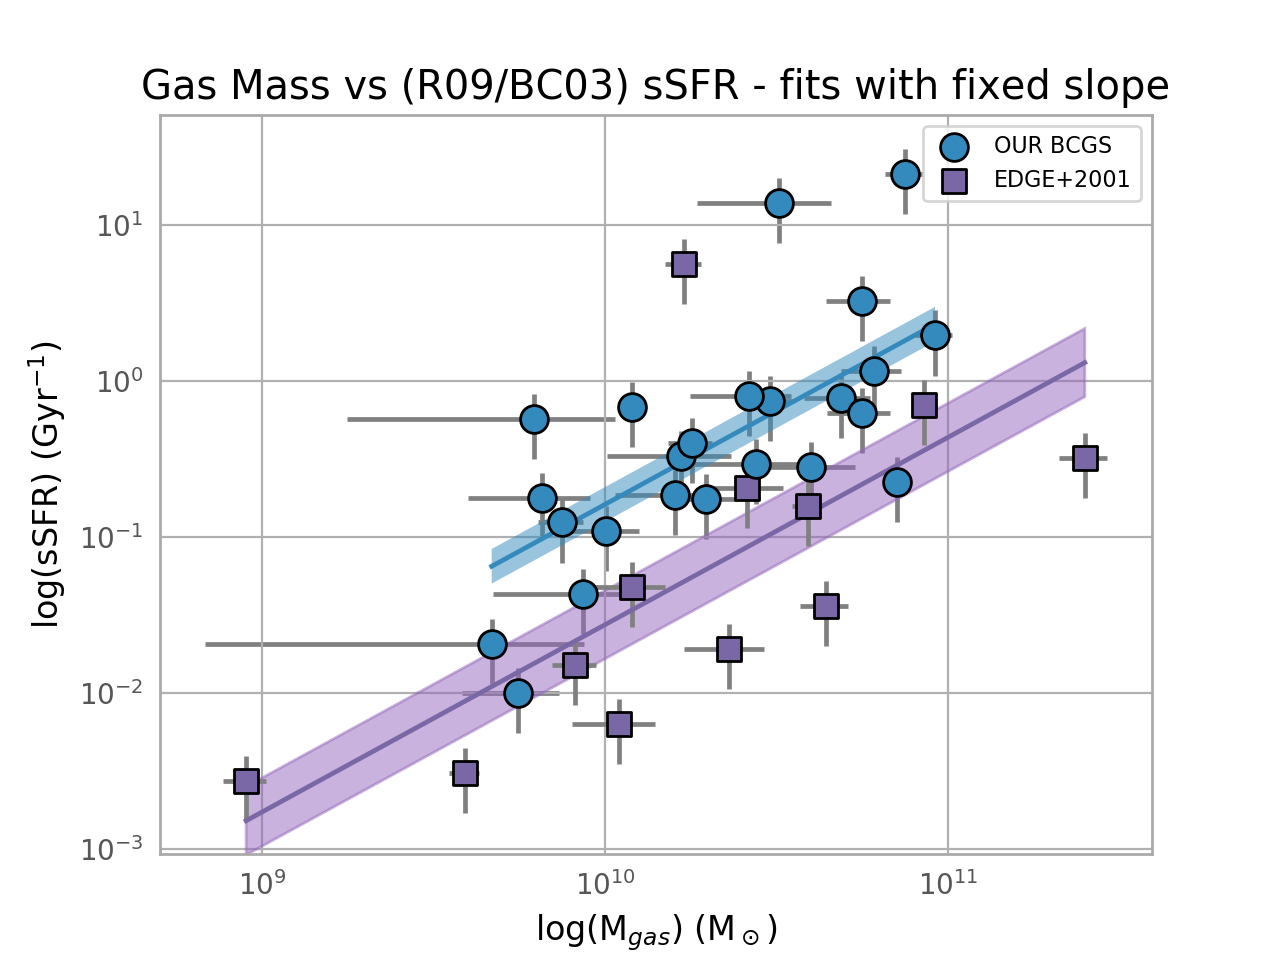

Text(0.5, 1.0, 'Gas Mass vs (R09/BC03) sSFR - fits with fixed slope')

In [219]:
%matplotlib notebook
from matplotlib.patches import Polygon, Rectangle
fig, ax = plt.subplots(1)
colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', 'o', 'v']
    
ax.scatter(mgas, ssfr, label='OUR BCGS', s=100, ec='k', zorder=20)
ax.errorbar(mgas, ssfr, xerr=dmgas, yerr=dssfr, color='0.5', fmt='none', zorder=0) 


# EDGE
ax.scatter(emgas[eggoodidx], essfr[eggoodidx], zorder=5, label='EDGE+2001', marker='s', s=75, ec='k')
ax.errorbar(emgas[eggoodidx], essfr[eggoodidx], xerr=edmgas[eggoodidx], yerr=edssfr[eggoodidx], color='0.5', fmt='none')

ax.set_xlabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_ylabel(r'$\log (\mathrm{sSFR}) \ (\mathrm{Gyr}^{-1})$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim((1e-3, 1e2))
# ax.set_xlim((6e8, 8e11))

xvals = np.linspace(np.min((mgas)), np.max((mgas)), num=500)
yvals = np.power(10, straightline(np.log10(xvals), meanslope, mfix_opt))
ax.plot(xvals, yvals)

exvals = np.linspace(np.min(emgas[eggoodidx]), np.max(emgas[eggoodidx]), num=500)
eyvals = np.power(10, straightline(np.log10(exvals), meanslope, mfix_eopt))
ax.plot(exvals, eyvals)

yvals = np.log10(yvals)
xuncerts = np.array([np.min(xvals), np.min(xvals), np.max(xvals), np.max(xvals)])
yuncerts = np.array([np.power(10, np.min(yvals) - np.sqrt(mfix_cov)), 
                     np.power(10, np.min(yvals) + np.sqrt(mfix_cov)),
                     np.power(10, np.max(yvals) + np.sqrt(mfix_cov)), 
                     np.power(10, np.max(yvals) - np.sqrt(mfix_cov))])
xy = np.stack((xuncerts, yuncerts.flatten()), axis=1)

eyvals = np.log10(eyvals)
exuncerts = np.array([np.min(exvals), np.min(exvals), np.max(exvals), np.max(exvals)])
eyuncerts = np.array([np.power(10, np.min(eyvals) - np.sqrt(mfix_ecov)), 
                      np.power(10, np.min(eyvals) + np.sqrt(mfix_ecov)),
                      np.power(10, np.max(eyvals) + np.sqrt(mfix_ecov)), 
                      np.power(10, np.max(eyvals) - np.sqrt(mfix_ecov))])
exy = np.stack((exuncerts, eyuncerts.flatten()), axis=1)

fituncert = Polygon(xy, alpha=0.5)
efituncert = Polygon(exy, alpha=0.5, color='tab:purple')
ax.add_patch(fituncert)
ax.add_patch(efituncert)

ax.legend(fontsize=8)
ax.set_title('Gas Mass vs (R09/BC03) sSFR - fits with fixed slope')

## KS test on residuals to combined fit

In [193]:
# first, get a fit to the combined samples
bothmgas = np.concatenate((mgas, emgas[eggoodidx]))
bothssfr = np.concatenate((ssfr, essfr[eggoodidx]))
bothdssfr = np.concatenate((dssfr, edssfr[eggoodidx]))
bothsig = np.log10(bothssfr + bothdssfr) - np.log10(bothssfr)

bothopt, bothcov = curve_fit(straightline, np.log10(bothmgas), np.log10(bothssfr), p0=[1, -12], sigma=bothsig)

<IPython.core.display.Javascript object>


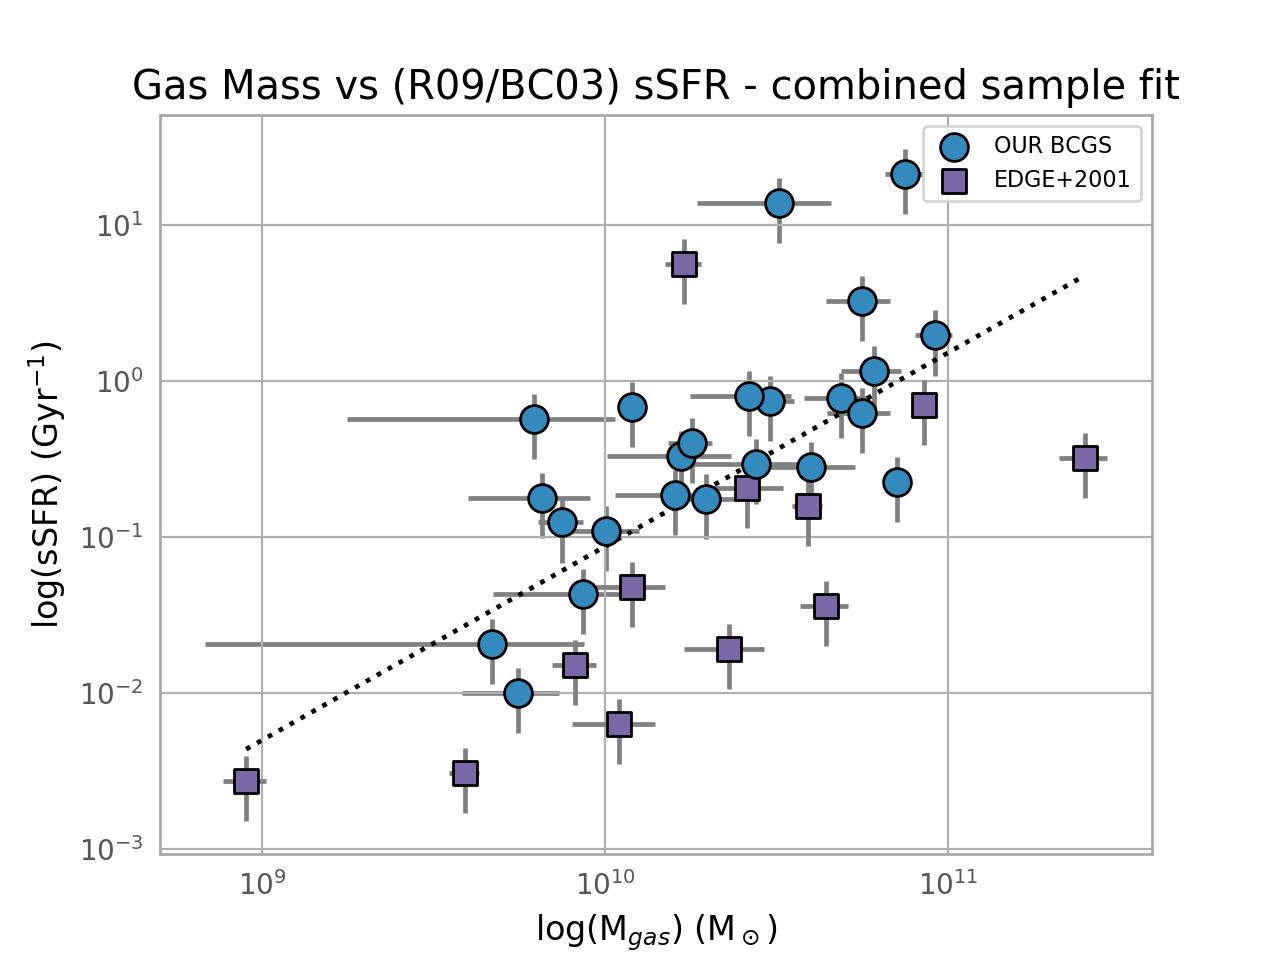

Text(0.5, 1.0, 'Gas Mass vs (R09/BC03) sSFR - combined sample fit')

In [200]:
%matplotlib notebook
fig, ax = plt.subplots(1)
colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', 'o', 'v']
    
ax.scatter(mgas, ssfr, label='OUR BCGS', s=100, ec='k', zorder=20)
ax.errorbar(mgas, ssfr, xerr=dmgas, yerr=dssfr, color='0.5', fmt='none', zorder=0) 


# EDGE
ax.scatter(emgas[eggoodidx], essfr[eggoodidx], zorder=5, label='EDGE+2001', marker='s', s=75, ec='k')
ax.errorbar(emgas[eggoodidx], essfr[eggoodidx], xerr=edmgas[eggoodidx], yerr=edssfr[eggoodidx], color='0.5', 
            fmt='none')

ax.set_xlabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_ylabel(r'$\log (\mathrm{sSFR}) \ (\mathrm{Gyr}^{-1})$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim((1e-3, 1e2))
# ax.set_xlim((6e8, 8e11))

exvals = np.linspace(np.min(emgas[eggoodidx]), np.max(emgas[eggoodidx]), num=500)
ax.plot(exvals, np.power(10, straightline(np.log10(exvals), *bothopt)), color='k', ls=':')

ax.legend(fontsize=8)
ax.set_title('Gas Mass vs (R09/BC03) sSFR - combined sample fit')

In [202]:
# get residuals
resids = np.log10(ssfr) - straightline(np.log10(mgas), *bothopt)
eresids = np.log10(essfr[eggoodidx]) - straightline(np.log10(emgas[eggoodidx]), *bothopt)

<IPython.core.display.Javascript object>


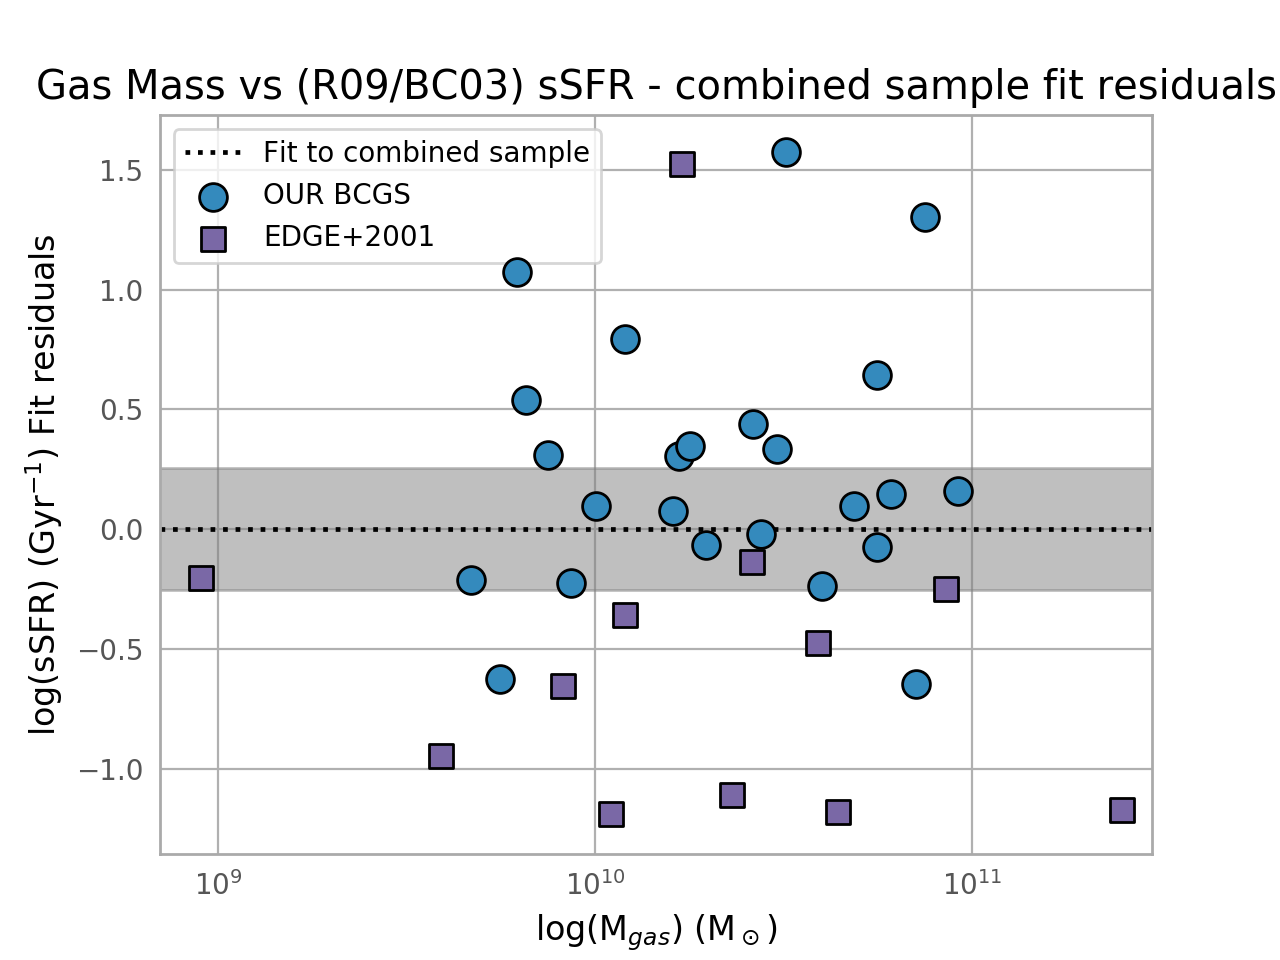

Text(0.5, 1.0, 'Gas Mass vs (R09/BC03) sSFR - combined sample fit residuals')

In [215]:
# plot the residuals
%matplotlib notebook
%matplotlib notebook
fig, ax = plt.subplots(1)
colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', 'o', 'v']
    
ax.scatter(mgas, resids, label='OUR BCGS', s=100, ec='k', zorder=20)
# ax.errorbar(mgas, resids, xerr=dmgas, yerr=dssfr, color='0.5', fmt='none', zorder=0) 


# EDGE
ax.scatter(emgas[eggoodidx], eresids, zorder=5, label='EDGE+2001', marker='s', s=75, ec='k')
# ax.errorbar(emgas[eggoodidx], eresids, xerr=edmgas[eggoodidx], yerr=edssfr[eggoodidx], color='0.5', fmt='none')

ax.set_xlabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_ylabel(r'$\log (\mathrm{sSFR}) \ (\mathrm{Gyr}^{-1})$ Fit residuals')
ax.set_xscale('log')

ax.axhline(0, color='k', ls=':', label='Fit to combined sample')
ax.set_xlim(7e8, 3e11)

offsig = np.sqrt(bothcov[0,0])

buncert = Rectangle((6e8, -offsig), 5e12, 2*offsig, color='0.5', alpha=0.5)
ax.add_patch(buncert)


ax.legend(loc='upper left')
ax.set_title('Gas Mass vs (R09/BC03) sSFR - combined sample fit residuals')

In [216]:
from scipy.stats import ks_2samp
ks_2samp(resids, eresids)

Ks_2sampResult(statistic=0.7083333333333334, pvalue=0.0003117831371447499)

Null hypothesis is not true with 99.97% probability.

## Test chi-2 of one sample's fit to the other sample

## Fgas against SFR MS comparison

In [112]:
fgas = mgas / (mstar.value)
efgas = emgas[eggoodidx] / (emstar.value[eggoodidx])

dfgas = fgas*np.sqrt((dmgas/mgas)**2 + ((dmstar.value)/(mstar.value))**2)
edfgas = efgas*np.sqrt((edmgas[eggoodidx]/emgas[eggoodidx])**2 + 
                                  ((edmstar.value[eggoodidx])/
                                   (emstar.value[eggoodidx]))**2)

# whitaker SFR main sequence
aarr = 0.7 - 0.13*z
barr = 0.38 + 1.14*z - 0.19*z**2

eaarr = 0.7 - 0.13*ez
ebarr = 0.38 + 1.14*ez - 0.19*ez**2

sfrms = np.power(10, aarr*(np.log10(mstar_rough.value) - 10.5) + barr)
esfrms = np.power(10, eaarr[eggoodidx]*(np.log10(emstar_rough[eggoodidx].value) - 10.5) + ebarr[eggoodidx])

sfr_msdistance = (riekesfr) / sfrms
esfr_msdistance = (eriekesfr[eggoodidx]) / esfrms

# scatter = 0.34 dex
dsfrms = np.power(10, 0.34 - np.log10(sfrms)) - sfrms
dsfrms = (1-10**-0.34)*sfrms
edsfrms = np.power(10, 0.34 - np.log10(esfrms)) - esfrms
edsfrms = (1-10**-0.34)*esfrms

dsfr_msdistance = sfr_msdistance*np.sqrt(((driekesfr)/(riekesfr))**2 + dsfrms**2/sfrms**2)
edsfr_msdistance = esfr_msdistance*np.sqrt(((deriekesfr[eggoodidx])/(eriekesfr[eggoodidx]))**2
                                           + edsfrms**2/esfrms**2)


lmstar = np.log10(mstar.value)
elmstar = np.log10(emstar.value[eggoodidx])

lmsmin = np.min(lmstar)
lmsmax = np.max(elmstar)

In [113]:
# genzel scaling relations
xvals = np.logspace(-2, np.log10(800), num=1000)
inmstar = np.logspace(lmsmin, lmsmax, num=50)
inz = 0.6

def genzel(sfr_sfrms, mstar, zvals):
    logmgasmstar = -1.23 + 2.71 * np.log10(1 + zvals) + 0.51 * np.log10(sfr_sfrms) - 0.35 * (np.log10(mstar) - 10.77)
    return np.power(10, logmgasmstar)

<IPython.core.display.Javascript object>


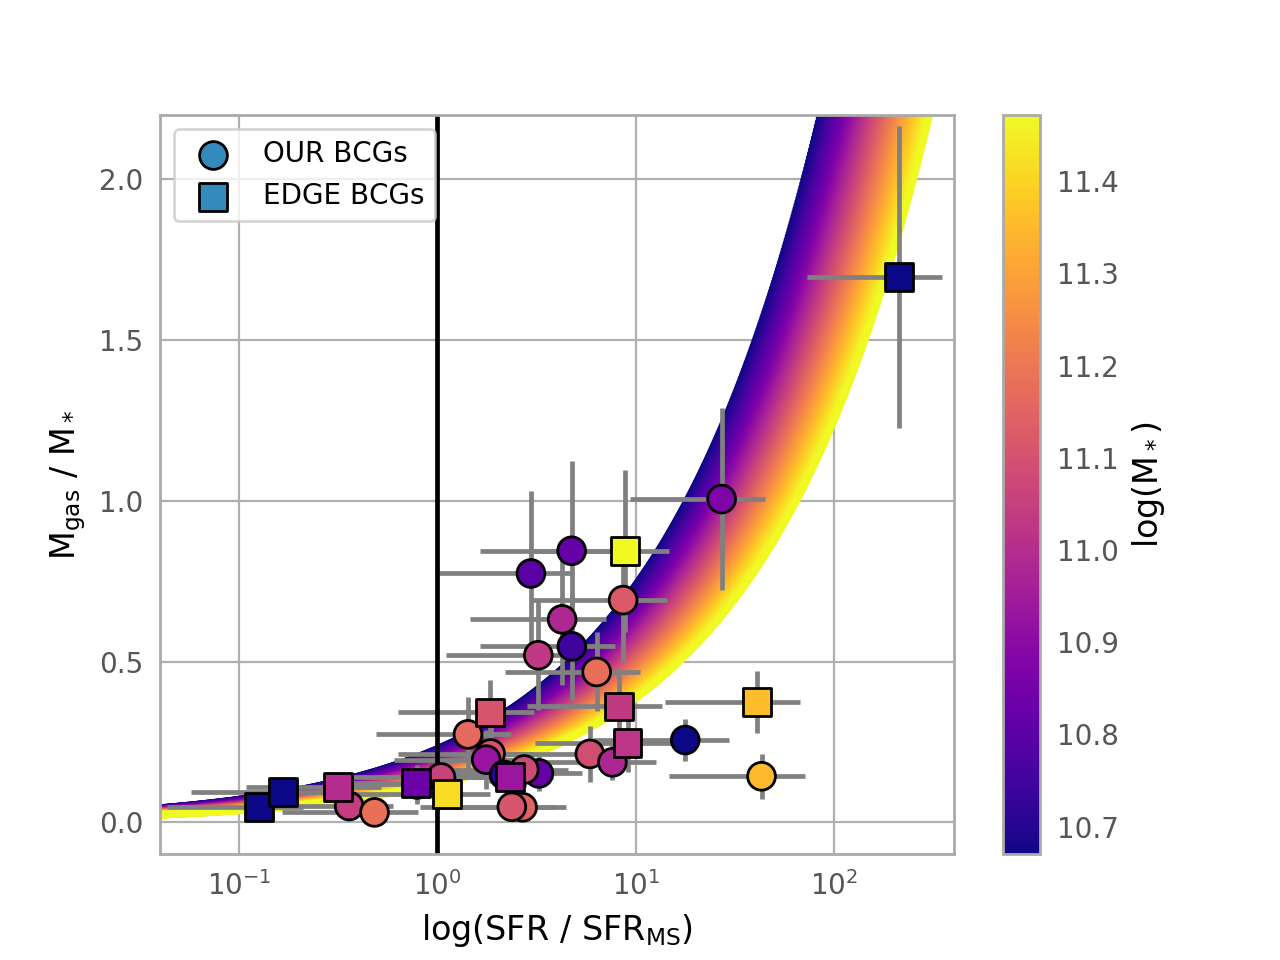

(0.04, 400)

In [114]:
# plot scaling relations in terms of mstar

%matplotlib notebook
fig, ax = plt.subplots(1)
im = ax.scatter(sfr_msdistance, fgas, c=lmstar, ec='k', cmap='plasma', vmin=lmsmin, vmax=lmsmax, 
                label='OUR BCGs', zorder=5, s=100)
ax.errorbar(sfr_msdistance, fgas, yerr=dfgas, xerr=dsfr_msdistance, color='0.5', fmt='none')

ax.scatter(esfr_msdistance, efgas, c=elmstar, cmap='plasma', vmin=lmsmin, vmax=lmsmax, 
           ec='k', label='EDGE BCGs', marker='s', zorder=5, s=100)
ax.errorbar(esfr_msdistance, efgas, yerr=edfgas, xerr=edsfr_msdistance, color='0.5', fmt='none')

for inmstarval in inmstar:
#     for zval in np.linspace(0.6):
#         yvals = genzel(xvals, inmstarval, zval)
#         ax.scatter(xvals, yvals, c=np.ones(len(xvals))*np.log10(inmstarval), cmap='plasma', vmin=lmsmin, vmax=lmsmax,
#                   s=10)
    zval=0.6
    yvals = genzel(xvals, inmstarval, zval)
    ax.scatter(xvals, yvals, c=np.ones(len(xvals))*np.log10(inmstarval), cmap='plasma', vmin=lmsmin, vmax=lmsmax,
              s=3)




ax.axvline(1, color='k')

ax.set_xscale('log')

cbar = fig.colorbar(im)

ax.set_xlabel(r'$\log(\mathrm{SFR}\ / \ \mathrm{SFR}_\mathrm{MS})$')
# ax.set_ylabel(r'$\mathrm{f}_\mathrm{gas} = \mathrm{M}_\mathrm{gas}\  / \ (\mathrm{M}_* + \mathrm{M}_\mathrm{gas})$')
ax.set_ylabel(r'$\mathrm{M}_\mathrm{gas} \ / \ \mathrm{M}_*$')
cbar.ax.set_ylabel(r'$\log(\mathrm{M}_*)$')

ax.legend(loc='upper left')

ax.set_ylim((-0.1, 2.2))
ax.set_xlim((0.04, 400))

<IPython.core.display.Javascript object>


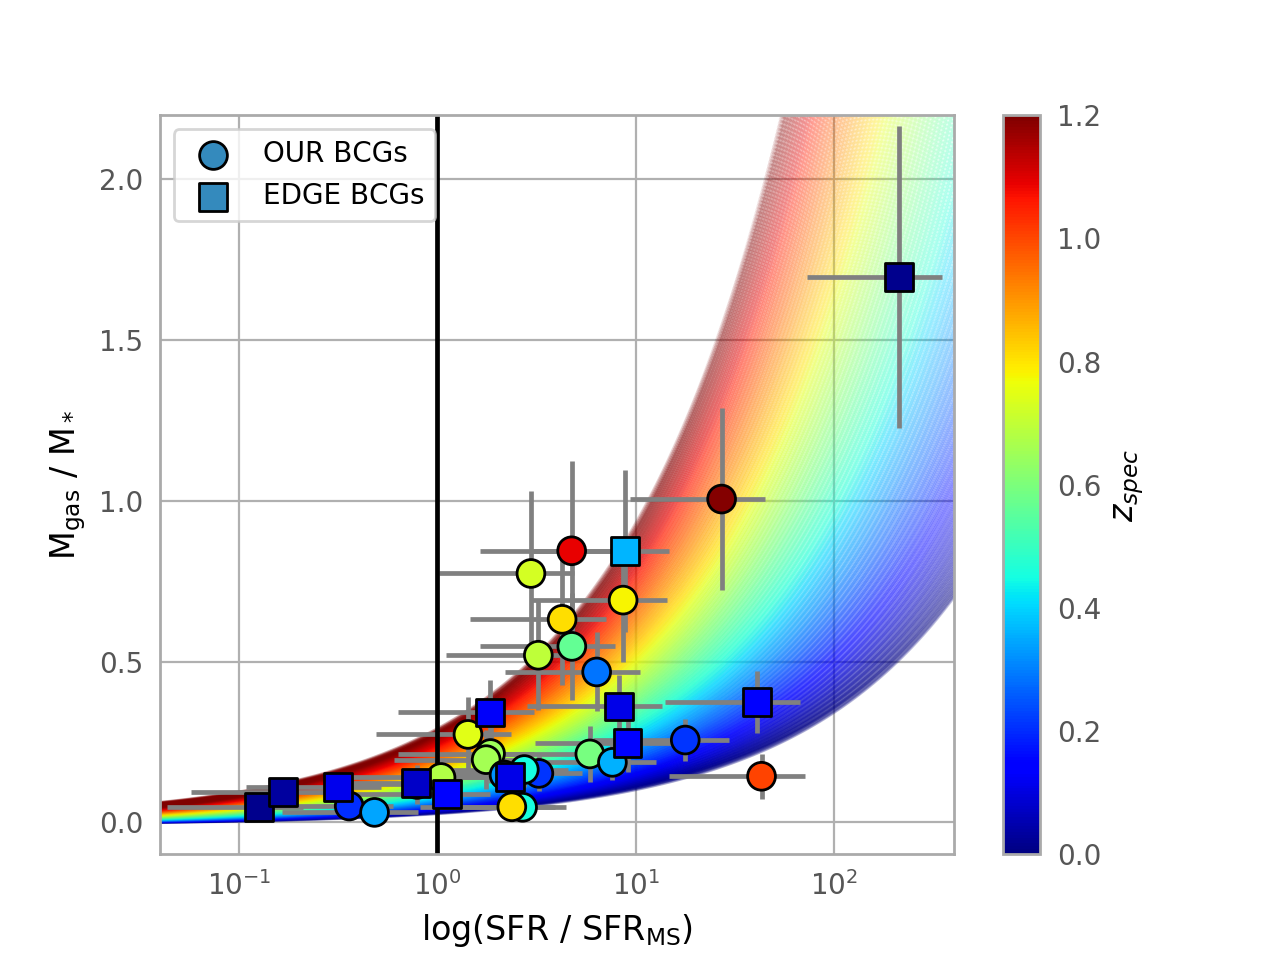

(0.04, 400)

In [115]:
# plot scaling relations in terms of z

%matplotlib notebook
fig, ax = plt.subplots(1)
im = ax.scatter(sfr_msdistance, fgas, c=z, ec='k', cmap='jet', vmin=0, vmax=1.2, 
                label='OUR BCGs', zorder=5, s=100)
ax.errorbar(sfr_msdistance, fgas, yerr=dfgas, xerr=dsfr_msdistance, color='0.5', fmt='none')

ax.scatter(esfr_msdistance, efgas, c=ez[eggoodidx], cmap='jet', vmin=0, vmax=1.2, 
           ec='k', label='EDGE BCGs', marker='s', zorder=5, s=100)
ax.errorbar(esfr_msdistance, efgas, yerr=edfgas, xerr=edsfr_msdistance, color='0.5', fmt='none')

imstarval = np.mean(np.concatenate((mstar.value, emstar[eggoodidx].value)))
for zval in np.linspace(0, 1.2, num=80):
#     for zval in np.linspace(0.6):
#         yvals = genzel(xvals, inmstarval, zval)
#         ax.scatter(xvals, yvals, c=np.ones(len(xvals))*np.log10(inmstarval), cmap='plasma', vmin=lmsmin, 
#                    vmax=lmsmax, s=10)

    yvals = genzel(xvals, inmstarval, zval)
    ax.scatter(xvals, yvals, c=np.ones(len(xvals))*zval, cmap='jet', vmin=0, vmax=1.2,
              s=3, alpha=0.1)




ax.axvline(1, color='k')

ax.set_xscale('log')

cbar = fig.colorbar(im)

ax.set_xlabel(r'$\log(\mathrm{SFR}\ / \ \mathrm{SFR}_\mathrm{MS})$')
# ax.set_ylabel(r'$\mathrm{f}_\mathrm{gas} = \mathrm{M}_\mathrm{gas}\  / \ (\mathrm{M}_* + \mathrm{M}_\mathrm{gas})$')
ax.set_ylabel(r'$\mathrm{M}_\mathrm{gas} \ / \ \mathrm{M}_*$')
cbar.ax.set_ylabel(r'$z_{spec}$')

ax.legend(loc='upper left')

ax.set_ylim((-0.1, 2.2))
ax.set_xlim((0.04, 400))

<IPython.core.display.Javascript object>


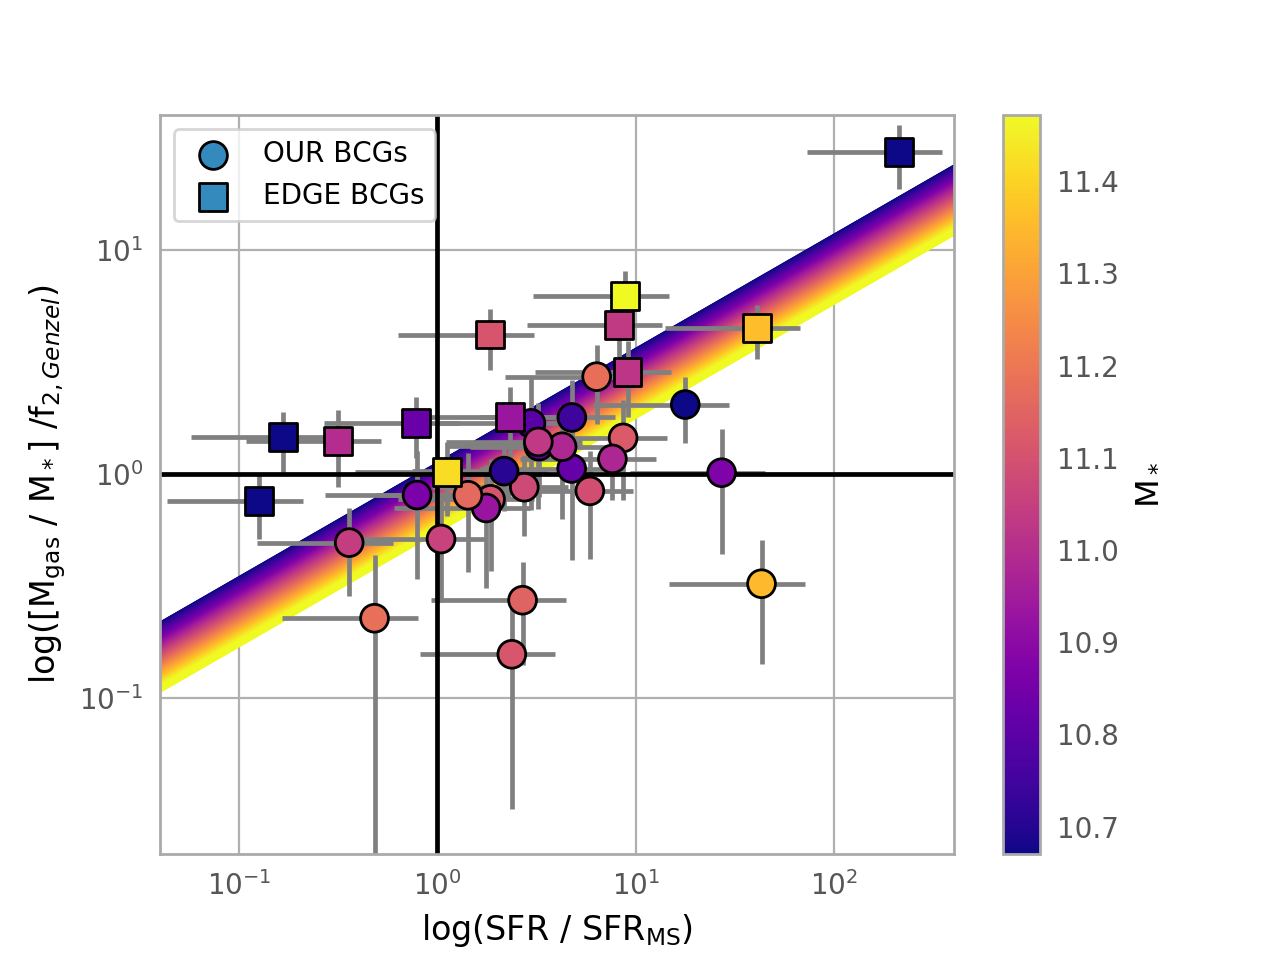

(0.04, 400)

In [132]:
# normalize by Genzel f2 function to remove redshift dependence, plot scaling relations in the bkg depending on mstar
# plot scaling relations in terms of z

fgas_ms = np.power(10, 2.71*np.log10(1+z) - 1.23)
efgas_ms = np.power(10, 2.71*np.log10(1+ez[eggoodidx]) - 1.23)

dfgas_ms = (0.09*np.log10(1+z) - 0.01)
dfgas_msdistance = fgas/fgas_ms*np.sqrt(dfgas**2/fgas**2 + dfgas_ms**2/fgas_ms**2)

edfgas_ms = (0.09*np.log10(1+ez) - 0.01)
edfgas_msdistance = efgas/efgas_ms*np.sqrt(edfgas**2/efgas**2 + edfgas_ms[eggoodidx]**2/efgas_ms**2)


%matplotlib notebook
fig, ax = plt.subplots(1)
im = ax.scatter(sfr_msdistance, fgas/fgas_ms, c=np.log10(mstar.value), ec='k', cmap='plasma', vmin=lmsmin, 
                vmax=lmsmax, label='OUR BCGs', zorder=5, s=100)
ax.errorbar(sfr_msdistance, fgas/fgas_ms, yerr=dfgas_msdistance, xerr=dsfr_msdistance, color='0.5', fmt='none')

ax.scatter(esfr_msdistance, efgas/efgas_ms, c=np.log10(emstar[eggoodidx].value), cmap='plasma', vmin=lmsmin, 
           vmax=lmsmax, ec='k', label='EDGE BCGs', marker='s', zorder=5, s=100)
ax.errorbar(esfr_msdistance, efgas/efgas_ms, yerr=edfgas_msdistance, xerr=edsfr_msdistance, color='0.5', fmt='none')

for inmstarval in inmstar:
    zval=0.6
    yvals = genzel(xvals, inmstarval, zval)
    yvals = yvals / np.power(10, 2.71*np.log10(1+zval) - 1.23)
    ax.scatter(xvals, yvals, c=np.ones(len(xvals))*np.log10(inmstarval), cmap='plasma', vmin=lmsmin, vmax=lmsmax,
              s=3)




ax.axvline(1, color='k')
ax.axhline(1, color='k')

ax.set_xscale('log')
ax.set_yscale('log')

cbar = fig.colorbar(im)

ax.set_xlabel(r'$\log(\mathrm{SFR}\ / \ \mathrm{SFR}_\mathrm{MS})$')
# ax.set_ylabel(r'$\mathrm{f}_\mathrm{gas} = \mathrm{M}_\mathrm{gas}\  / \ (\mathrm{M}_* + \mathrm{M}_\mathrm{gas})$')
ax.set_ylabel(r'$\log([\mathrm{M}_\mathrm{gas} \ / \ \mathrm{M}_*] \ / \mathrm{f}_{2, Genzel})$')
cbar.ax.set_ylabel(r'$\mathrm{M}_*$')

ax.legend(loc='upper left')

ax.set_ylim((0.02, 40))
ax.set_xlim((0.04, 400))

## Gas mass vs sSFR - comparison to MS

In [553]:
# lin et al gas mass main sequence is based on physical size of the galaxies - take the mean of the areas of all 
# resolved galaxies to be the size of all galaxies
avgarea = np.mean(area).to(u.kpc**2)
sigmgas = mgas / avgarea
sigmstar = mstar_rough / avgarea

esigmgas = emgas[egoodidx] / avgarea
esigmstar = emstar_rough / avgarea

mgas_ms = np.power(10, 1.10*np.log10(sigmstar.value) - 1.95)
emgas_ms = np.power(10, 1.10*np.log10(esigmstar.value) - 1.95)

mgas_msdistance = sigmgas.value - mgas_ms
emgas_msdistance = esigmgas.value - emgas_ms[egoodidx]

NameError: name 'area' is not defined

<IPython.core.display.Javascript object>


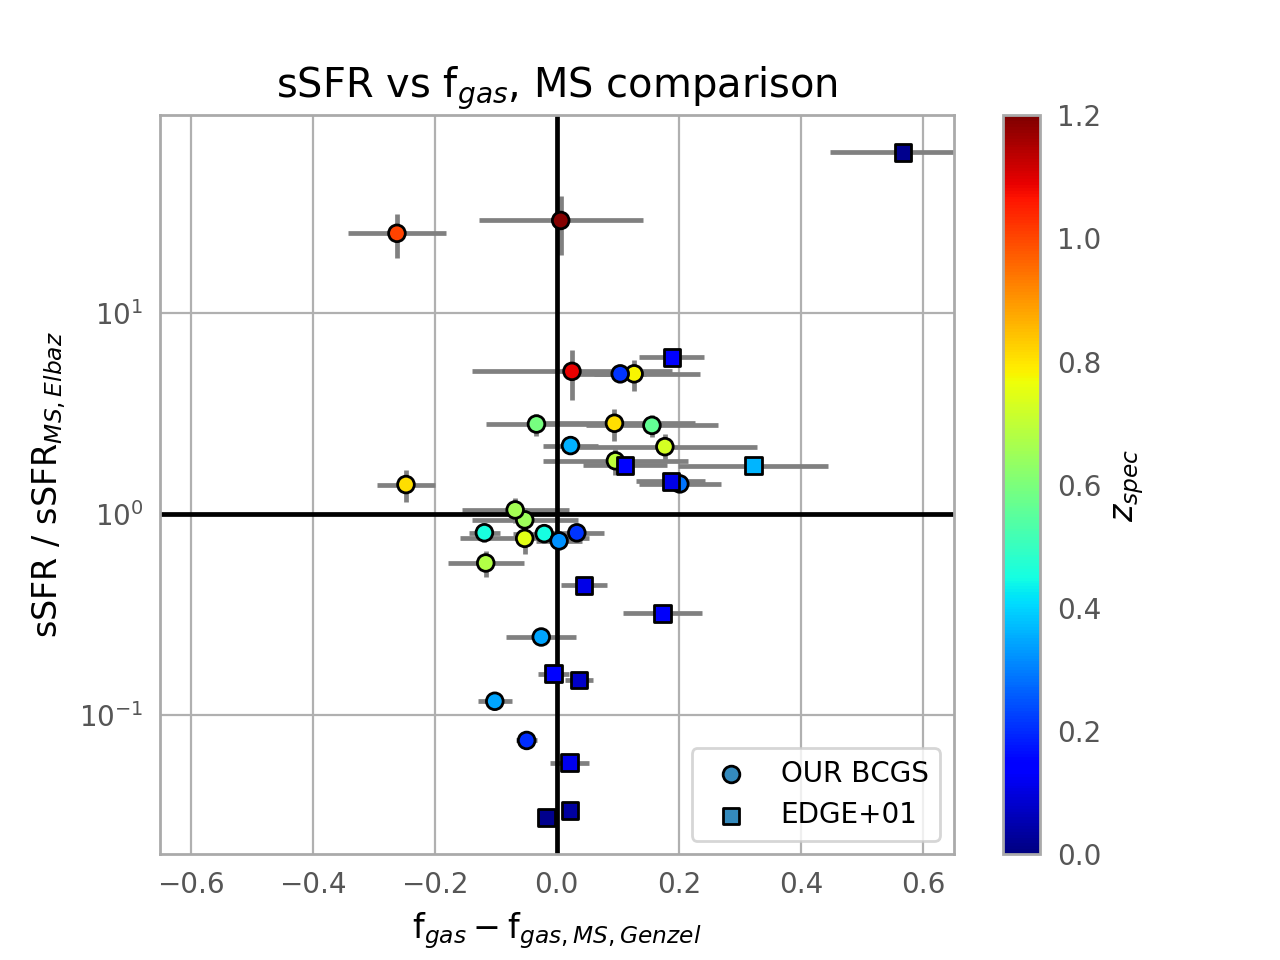

Text(0.5, 1.0, 'sSFR vs $\\mathrm{f}_{gas}$, MS comparison')

In [554]:
# elbaz main sequence
ssfr_ms = 26 * np.power(cosmo.age(z).to(u.Gyr).value, -2.2)
essfr_ms = 26 * np.power(cosmo.age(ez[eggoodidx]).to(u.Gyr).value, -2.2)

dssfr_ms = 52*np.power(cosmo.age(z).to(u.Gyr).value, -2.2) - 26*np.power(cosmo.age(z).to(u.Gyr).value, -2.2)
edssfr_ms = 52*np.power(cosmo.age(ez).to(u.Gyr).value, -2.2) - 26*np.power(cosmo.age(ez).to(u.Gyr).value, -2.2)


ssfr_msdistance = (ssfr) / ssfr_ms
essfr_msdistance = (essfr[eggoodidx]) / essfr_ms

dssfr_msdistance = np.sqrt(2*(dssfr_ms/ssfr_ms)**2 + (dssfr)/(ssfr))
edssfr_msdistance = np.sqrt((edssfr_ms[eggoodidx]/essfr_ms)**2 + (edssfr[eggoodidx]/essfr[eggoodidx])**2)

fgas_ms = np.power(10, 2.71*np.log10(1+z) - 1.23)
efgas_ms = np.power(10, 2.71*np.log10(1+ez) - 1.23)

fgas = mgas / (mgas + mstar.value)
fgas_msdistance =  fgas - fgas_ms
efgas = emgas / (emgas + emstar.value)
efgas_msdistance = efgas - efgas_ms

dfgas = fgas*np.sqrt((dmgas/mgas)**2 + ((dmgas+dmstar.value)/(mgas+mstar.value))**2)
dfgas_ms = (0.09*np.log10(1+z) - 0.01)
dfgas_msdistance = dfgas + dfgas_ms
edfgas = efgas[eggoodidx]*np.sqrt((edmgas[eggoodidx]/emgas[eggoodidx])**2 + 
                                  ((edmgas[eggoodidx]+edmstar.value[eggoodidx])/(emgas[eggoodidx]+emstar.value[eggoodidx]))**2)
edfgas_ms = (0.09*np.log10(1+ez) - 0.01)
edfgas_msdistance = edfgas + edfgas_ms[eggoodidx]


%matplotlib notebook
fig,ax = plt.subplots(1)

im = ax.scatter(fgas_msdistance, ssfr_msdistance, label='OUR BCGS', c=z, vmin=0., vmax=1.2, cmap='jet', 
                ec='k', marker='o', zorder=5)
ax.errorbar(fgas_msdistance, ssfr_msdistance, xerr=dfgas_msdistance, yerr=dssfr, fmt='none', color='0.5')
ax.scatter(efgas_msdistance[eggoodidx], essfr_msdistance, label='EDGE+01', c=ez[eggoodidx], vmin=0., vmax=1.2, 
           cmap='jet', ec='k', marker='s', zorder=5)
ax.errorbar(efgas_msdistance[eggoodidx], essfr_msdistance, xerr=edfgas_msdistance,
            yerr=edssfr[eggoodidx], fmt='none', color='0.5')

cmap = fig.colorbar(im)
cmap.ax.set_ylabel(r'$z_{spec}$')
ax.set_xlabel(r'$\mathrm{f}_{gas}  - \mathrm{f}_{gas, MS, Genzel}$')
ax.set_ylabel(r'$\mathrm{sSFR} \ / \ \mathrm{sSFR}_{MS, Elbaz}$')

ax.axhline(1, color='k')
ax.axvline(0, color='k')
ax.set_yscale('log')
ax.set_xlim(-0.65, 0.65)

ax.legend(loc='lower right')

ax.set_title(r'sSFR vs $\mathrm{f}_{gas}$, MS comparison')

<IPython.core.display.Javascript object>


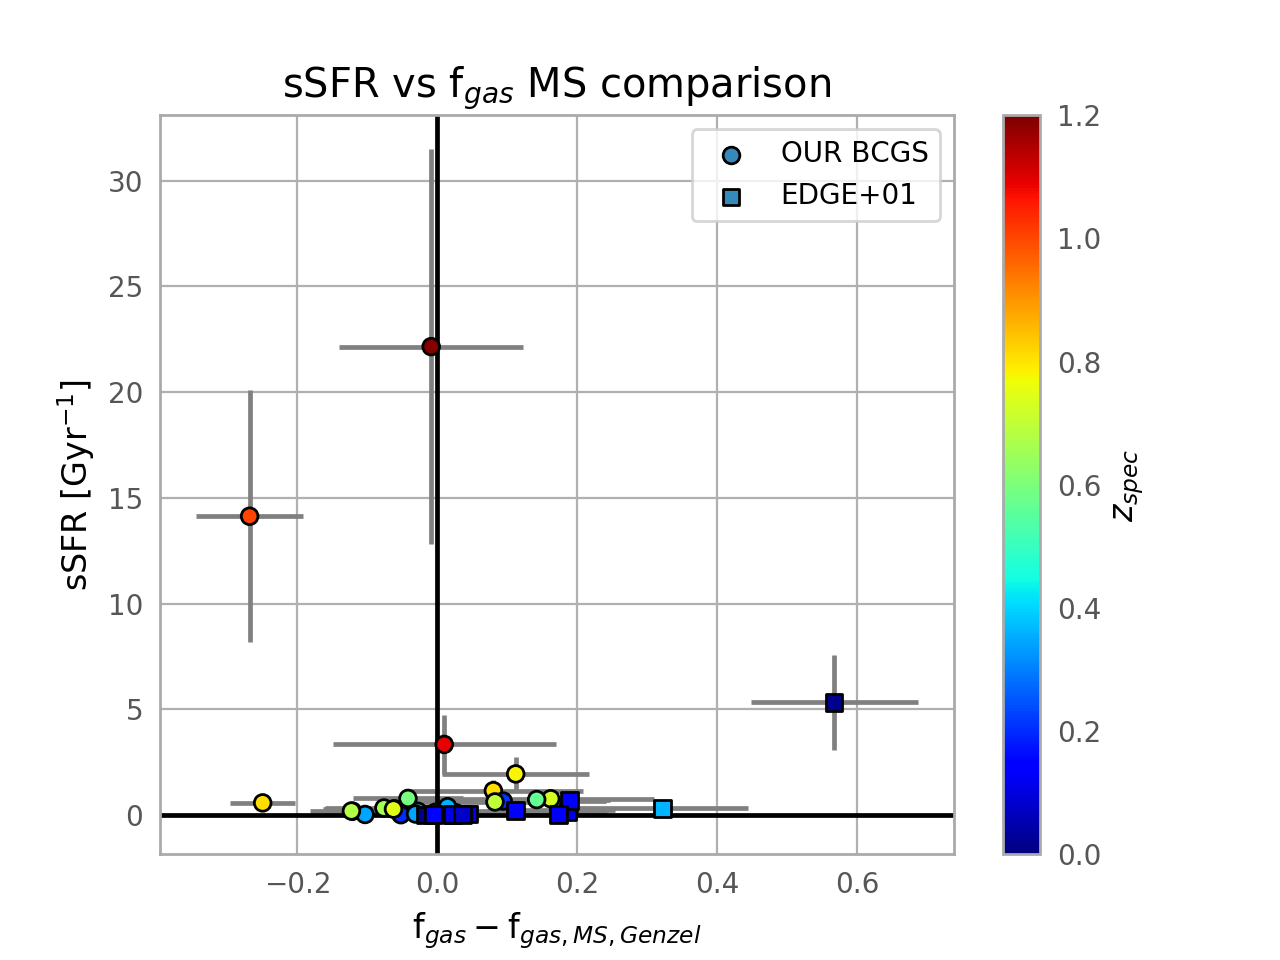

Text(0.5, 1.0, 'sSFR vs $\\mathrm{f}_{gas}$ MS comparison')

In [1906]:
%matplotlib notebook
fig,ax = plt.subplots(1)

im = ax.scatter(fgas_msdistance, ssfr, label='OUR BCGS', c=z, vmin=0., vmax=1.2, cmap='jet', 
                ec='k', marker='o', zorder=5)
ax.errorbar(fgas_msdistance, ssfr, xerr=dfgas_msdistance, yerr=dssfr, fmt='none', color='0.5')
ax.scatter(efgas_msdistance[eggoodidx], essfr[eggoodidx], label='EDGE+01', c=ez[eggoodidx], vmin=0., vmax=1.2, 
           cmap='jet', ec='k', marker='s', zorder=5)
ax.errorbar(efgas_msdistance[eggoodidx], essfr[eggoodidx], xerr=edfgas_msdistance,
            yerr=edssfr[eggoodidx], fmt='none', color='0.5')

cmap = fig.colorbar(im)
cmap.ax.set_ylabel(r'$z_{spec}$')
ax.set_xlabel(r'$\mathrm{f}_{gas}  - \mathrm{f}_{gas, MS, Genzel}$')
ax.set_ylabel(r'sSFR $[\mathrm{Gyr}^{-1}]$')

ax.axhline(0, color='k')
ax.axvline(0, color='k')

ax.legend()

ax.set_title(r'sSFR vs $\mathrm{f}_{gas}$ MS comparison')

<IPython.core.display.Javascript object>


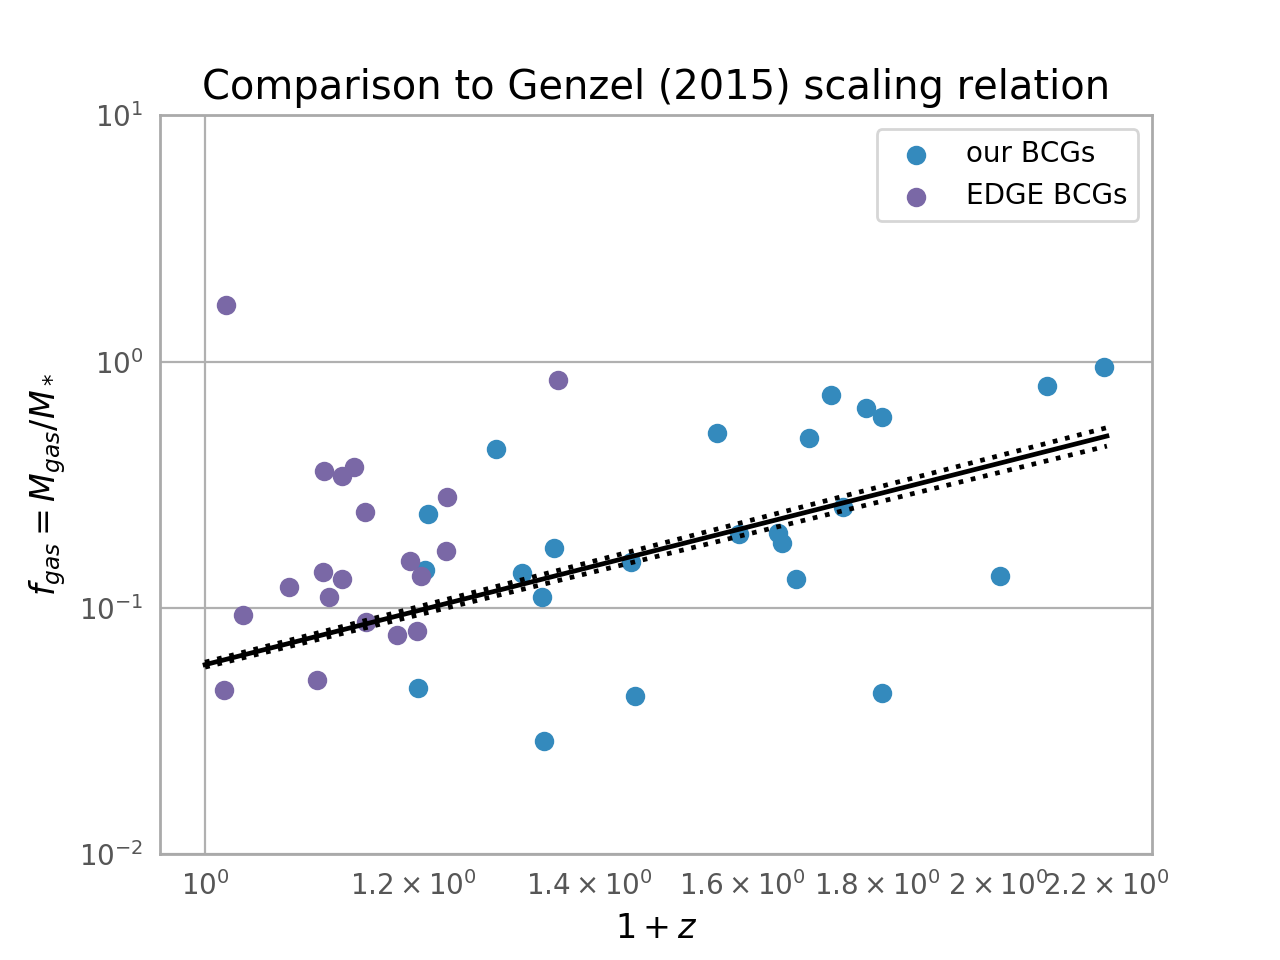

Text(0.5, 1.0, 'Comparison to Genzel (2015) scaling relation')

In [1908]:
# comparison to Genzel (2015) scaling relations
%matplotlib notebook
fig,ax = plt.subplots(1)
ax.scatter(1+z, mgas/(mstar.value), label='our BCGs')
ax.scatter(1+ez, emgas/(emstar.value), label='EDGE BCGs')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-2, 10)

zrange = np.linspace(0., 1.2, num=500) + 1
ax.plot(zrange, np.power(10, 2.71*np.log10(zrange) - 1.23), color='k')
ax.plot(zrange, np.power(10, 2.78*np.log10(zrange) - 1.22), color='k', ls=':')
ax.plot(zrange, np.power(10, 2.62*np.log10(zrange) - 1.24), color='k', ls=':')
ax.set_xlabel(r'$1+z$')
ax.set_ylabel(r'$f_{gas} = M_{gas}/M_*$')

ax.legend()
ax.set_title('Comparison to Genzel (2015) scaling relation')


<IPython.core.display.Javascript object>


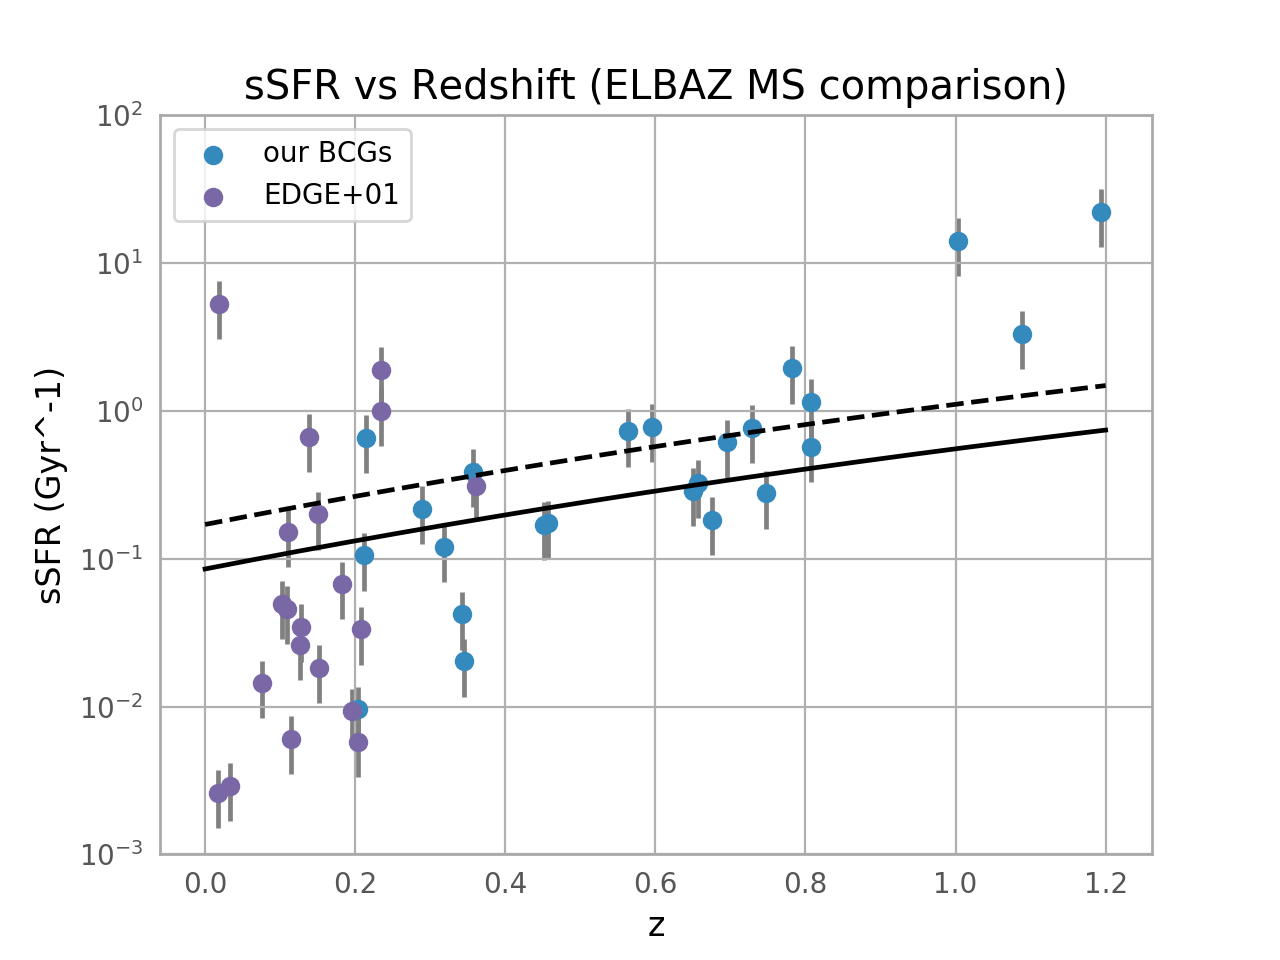

In [1909]:
# SSFR MS for us and edge
%matplotlib notebook

zrange = np.linspace(0, 1.2, num=500)
plt.plot(zrange, 26 * np.power(cosmo.age(zrange).to(u.Gyr).value, -2.2), color='k')
plt.plot(zrange, 52 *np.power(cosmo.age(zrange).to(u.Gyr).value, -2.2), color='k', ls='--')


plt.scatter(z, ssfr, label='our BCGs')
plt.errorbar(z, ssfr, yerr=dssfr, fmt='none', color='0.5', zorder=0)
plt.scatter(ez[egoodidx], essfr[egoodidx], label='EDGE+01')
plt.errorbar(ez[egoodidx], essfr[egoodidx], yerr=edssfr[egoodidx], fmt='none', color='0.5', zorder=0)
plt.yscale('log')
plt.title('sSFR vs Redshift (ELBAZ MS comparison)')

plt.xlabel('z')
plt.ylabel('sSFR (Gyr^-1)')
plt.ylim((1e-3, 1e2))
plt.legend()

<IPython.core.display.Javascript object>


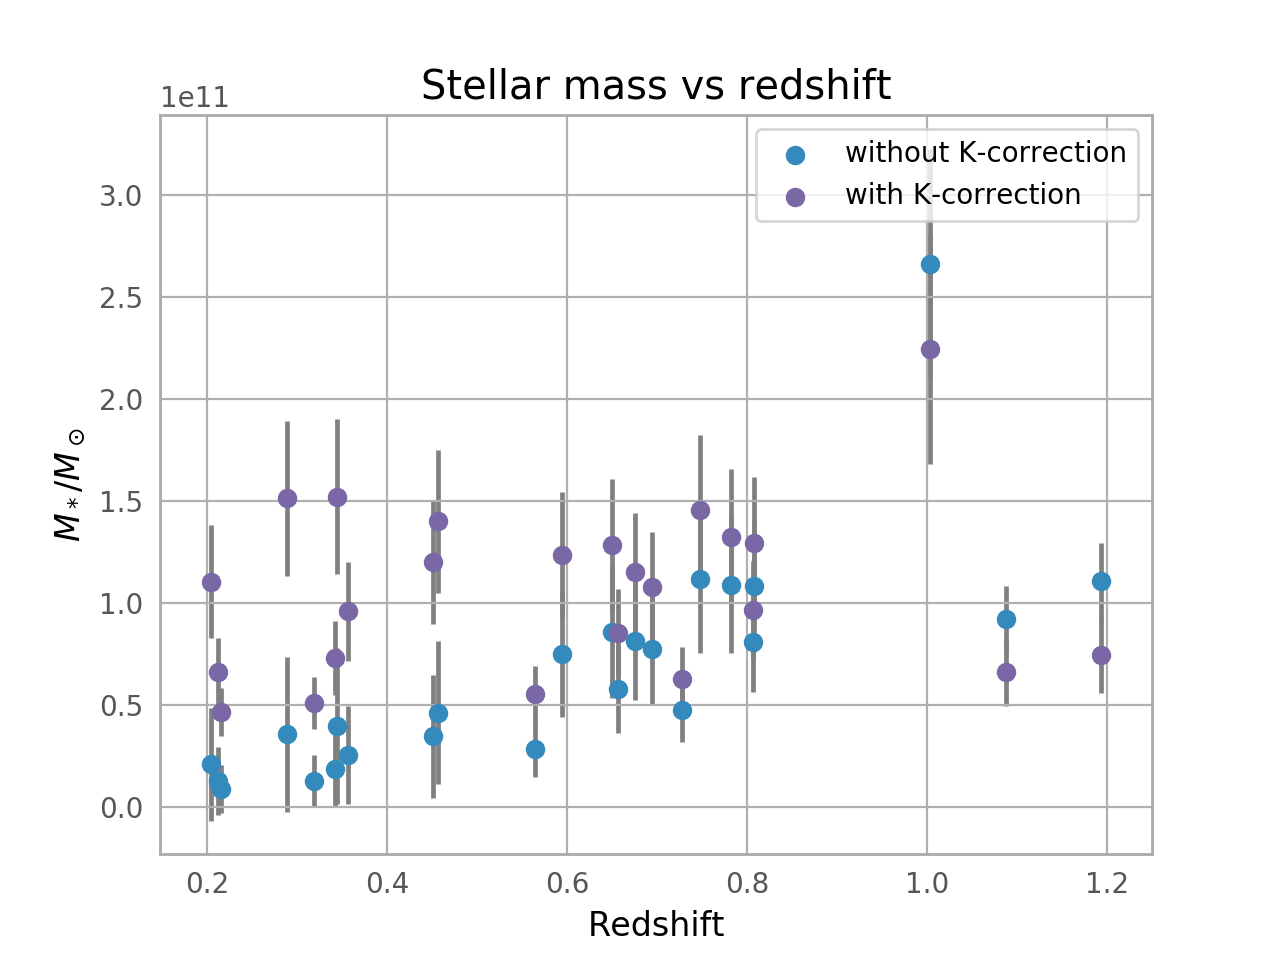

Text(0.5, 1.0, 'Stellar mass vs redshift')

In [1910]:
%matplotlib notebook

fig, ax = plt.subplots(1)


ax.scatter(z, mstar_rough, label='without K-correction')
ax.errorbar(z, mstar_rough.value, yerr=dmstar.value, fmt='none', color='0.5', zorder=0)
ax.scatter(z, mstar, label='with K-correction')
ax.errorbar(z, mstar.value, yerr=dmstar.value, fmt='none', color='0.5',zorder=0)
ax.set_xlabel('Redshift')
ax.set_ylabel(r'$M_* / M_\odot$')

ax.legend()

ax.set_title('Stellar mass vs redshift')

<IPython.core.display.Javascript object>


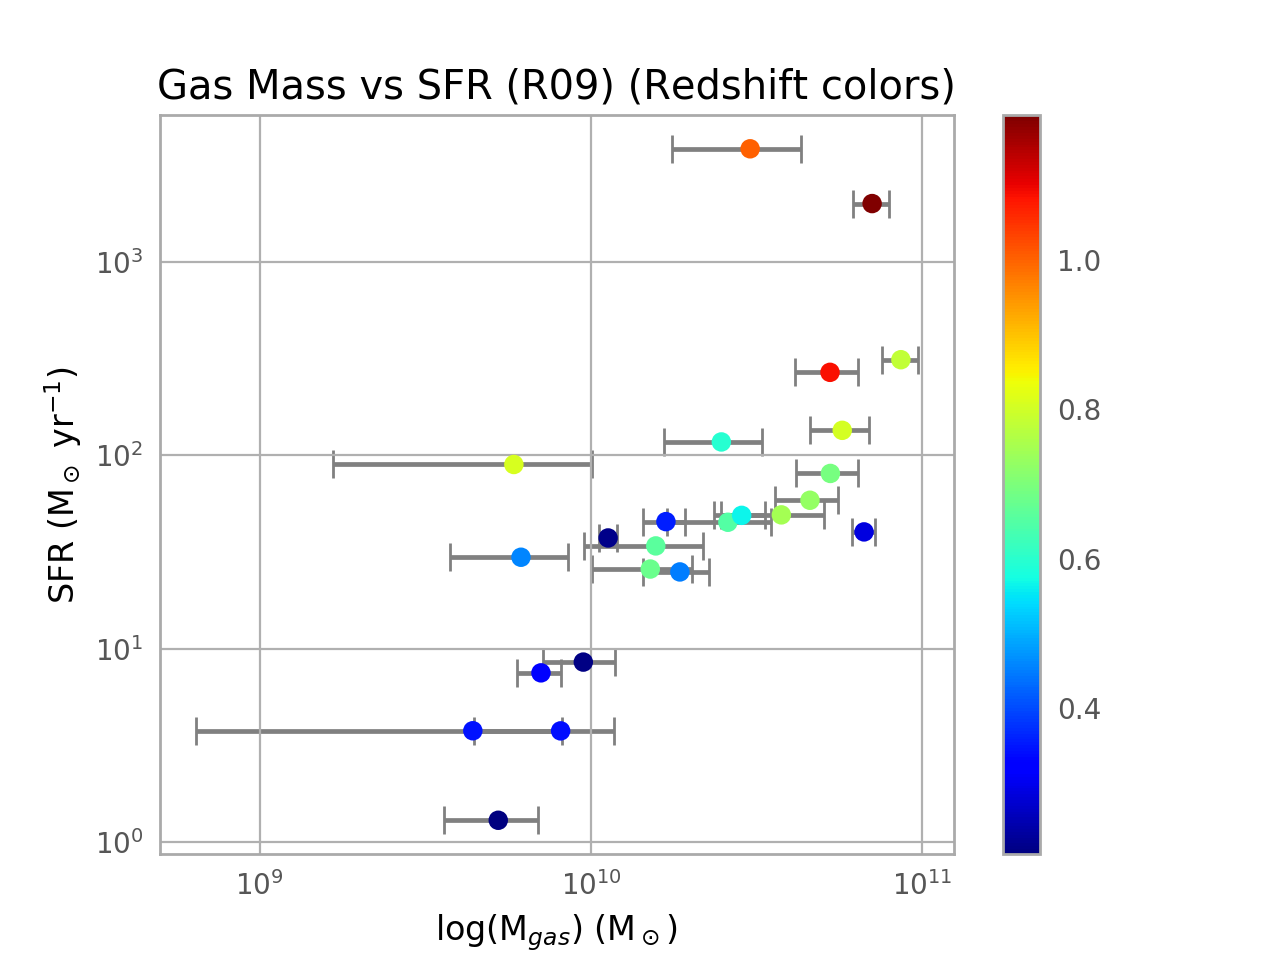

Text(0.5, 1.0, 'Gas Mass vs SFR (R09) (Redshift colors)')

In [1913]:
%matplotlib notebook
fig, ax = plt.subplots(1)
colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '+', 's', '*', 'v']
im = ax.scatter(mgas, riekesfr, c=z, cmap='jet')
ax.errorbar(mgas, riekesfr, xerr=dmgas,
#                 yerr= mips_lum_err_ce,
                color='0.5', fmt='none', zorder=0, capsize=5)
ax.set_xlabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_ylabel(r'SFR ($\mathrm{M}_\odot \ \mathrm{yr}^{-1}$)')
ax.set_xscale('log')
ax.set_yscale('log')

xvals = np.linspace(np.min(np.log10(mgas)), np.max(np.log10(mgas)), num=500)
# ax.plot(xvals, straightline(xvals, *opt))

fig.colorbar(im)
ax.set_title('Gas Mass vs SFR (R09) (Redshift colors)')

## Folding in stellar masses

<IPython.core.display.Javascript object>


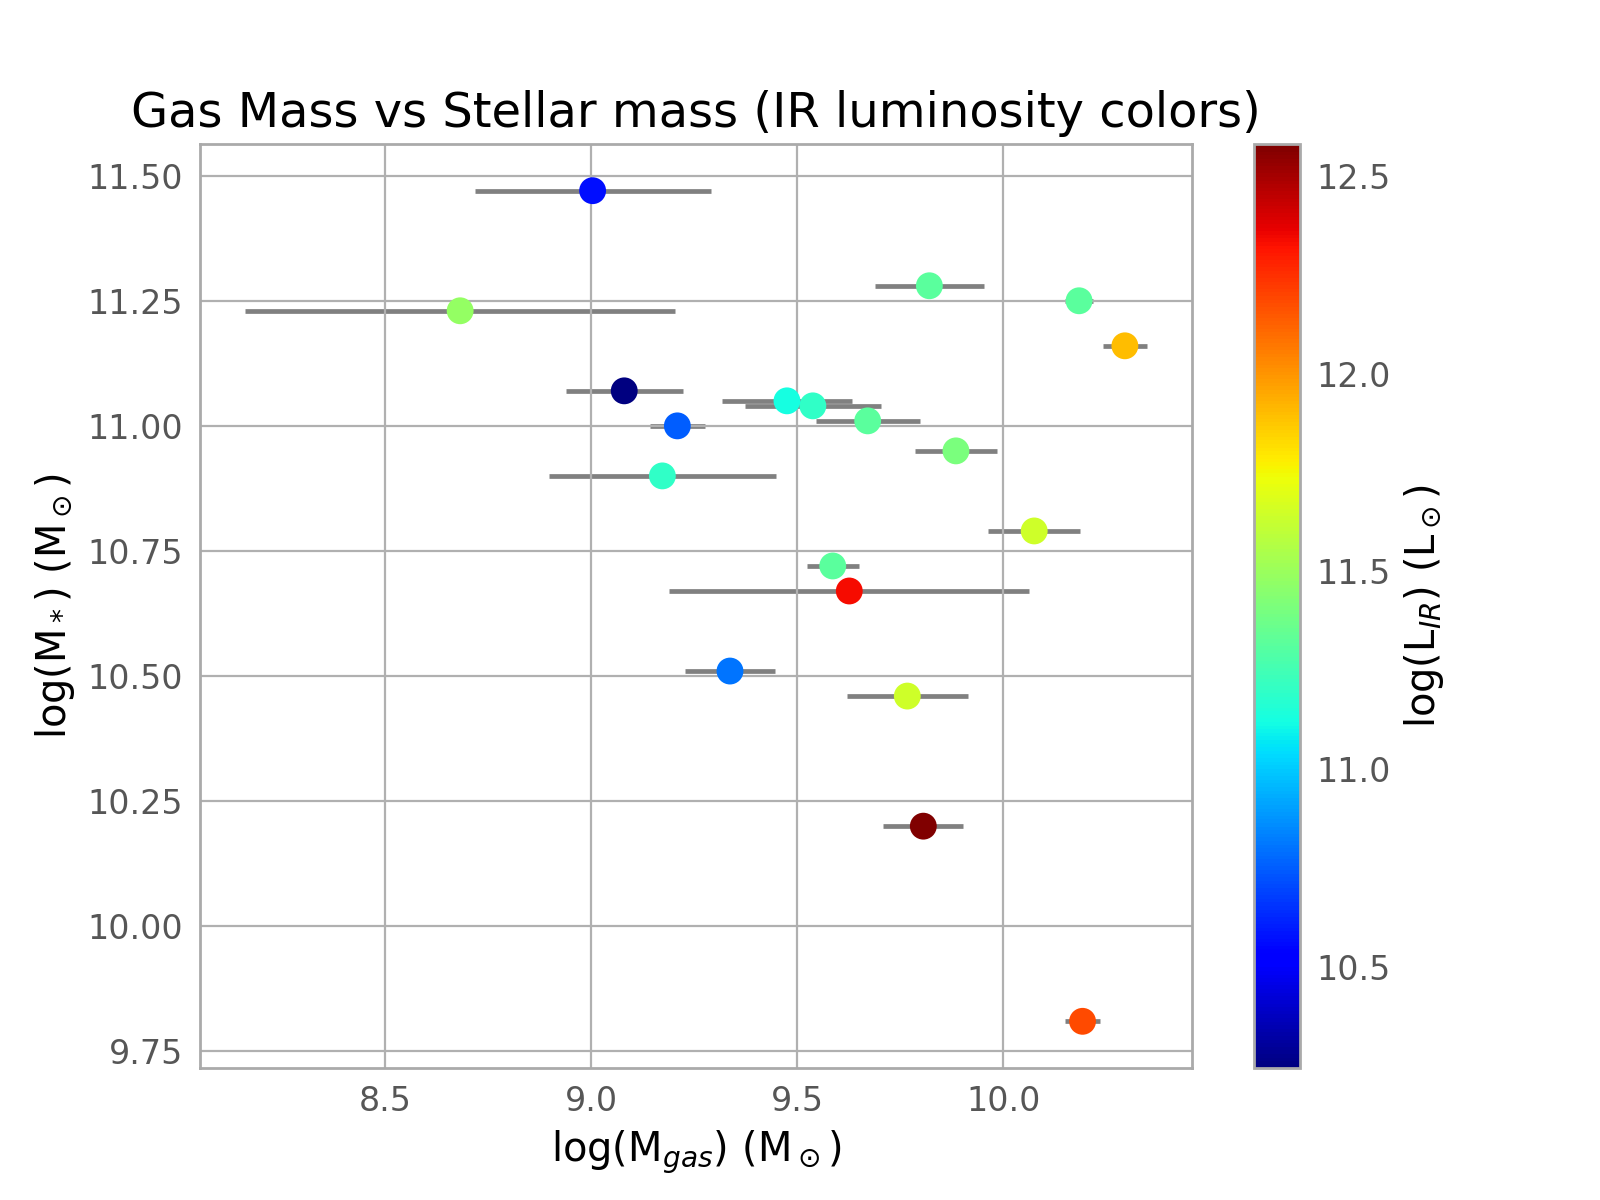

Text(0.5, 1.0, 'Gas Mass vs Stellar mass (IR luminosity colors)')

In [1265]:
%matplotlib notebook

fig, ax = plt.subplots(1)
colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', 'o', 'v']
im = ax.scatter(np.log10(mgas[goodidx]), logmstar[goodidx], c=np.log10((mips_lum_ce[goodidx])), cmap='jet', s=75)
ax.errorbar(np.log10(mgas[goodidx]), logmstar[goodidx], xerr=logdmgas[goodidx], fmt='none', color='0.5', zorder=0)
ax.set_xlabel(r'$\log(\mathrm{M}_{gas}) \  (\mathrm{M}_\odot )$')
ax.set_ylabel(r'$\log(\mathrm{M}_*) \ (\mathrm{M}_\odot)$')
# ax.set_ylabel(r'log($L_{mips}$) (erg $\mathrm{s}^{-1}$)')

xvals = np.linspace(np.min(np.log10(mgas)), np.max(np.log10(mgas)), num=500)
# ax.plot(xvals, straightline(xvals, *opt))

cbar = fig.colorbar(im)
cbar.ax.set_ylabel(r'log($\mathrm{L}_{IR}$) ($\mathrm{L}_\odot$)')
ax.set_title('Gas Mass vs Stellar mass (IR luminosity colors)')

<IPython.core.display.Javascript object>


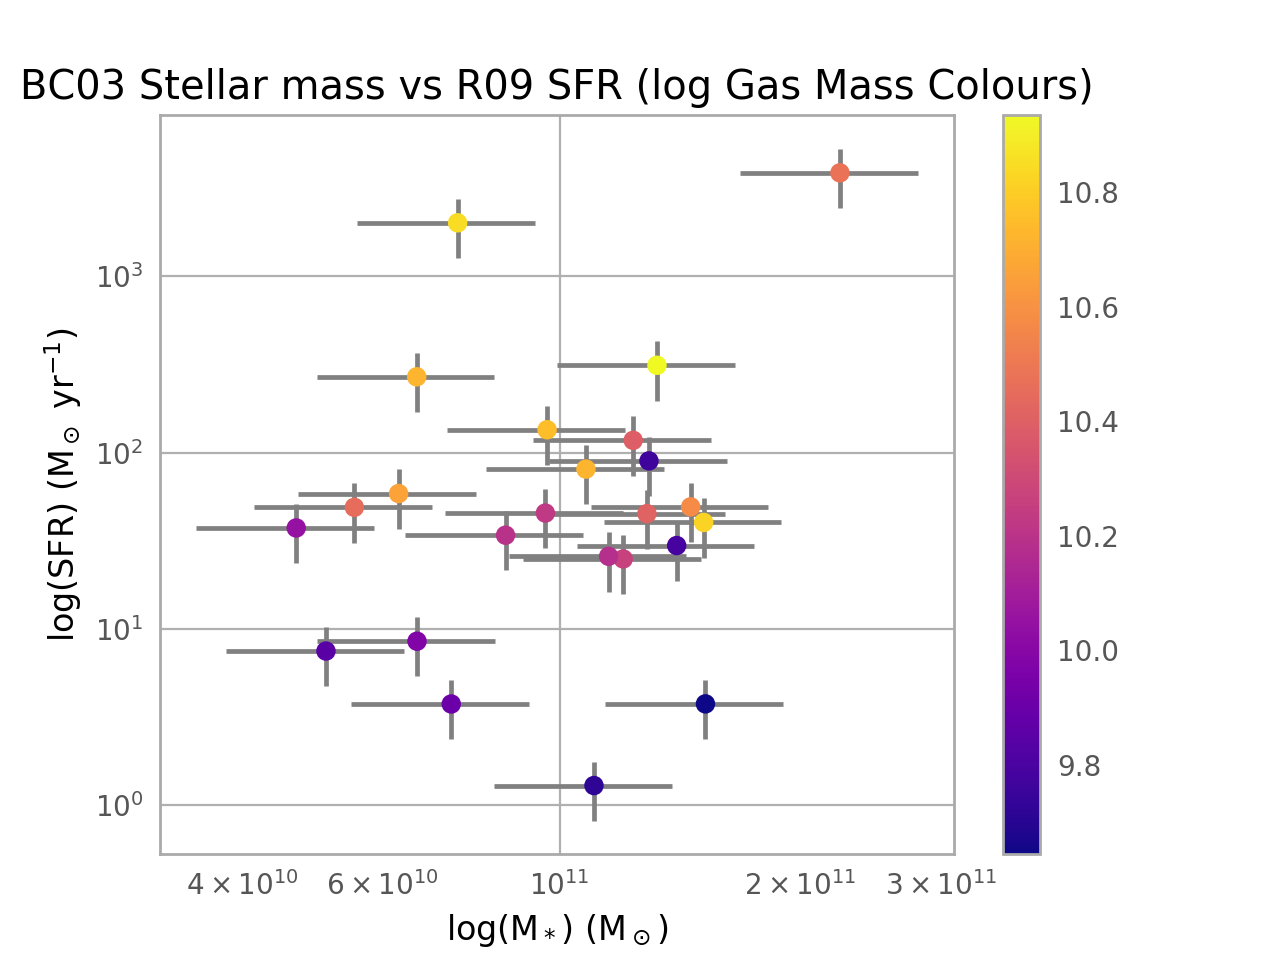

Text(0.5, 1.0, 'BC03 Stellar mass vs R09 SFR (log Gas Mass Colours)')

In [1914]:
%matplotlib notebook
fig, ax = plt.subplots(1)

im = ax.scatter(mstar.value, riekesfr, c=np.log10(mgas), cmap='plasma',
               zorder=10)
ax.errorbar(mstar.value, riekesfr, xerr=dmstar.value, yerr=driekesfr, fmt='none', color='0.5')

ax.set_xlabel(r'$\log(\mathrm{M}_*) \ (\mathrm{M}_\odot)$')
ax.set_ylabel(r'$\log (\mathrm{SFR}) \ (\mathrm{M}_\odot \ \mathrm{yr}^{-1})$')
ax.set_xscale('log')
ax.set_yscale('log')

fig.colorbar(im)

ax.set_title("BC03 Stellar mass vs R09 SFR (log Gas Mass Colours)")

<IPython.core.display.Javascript object>


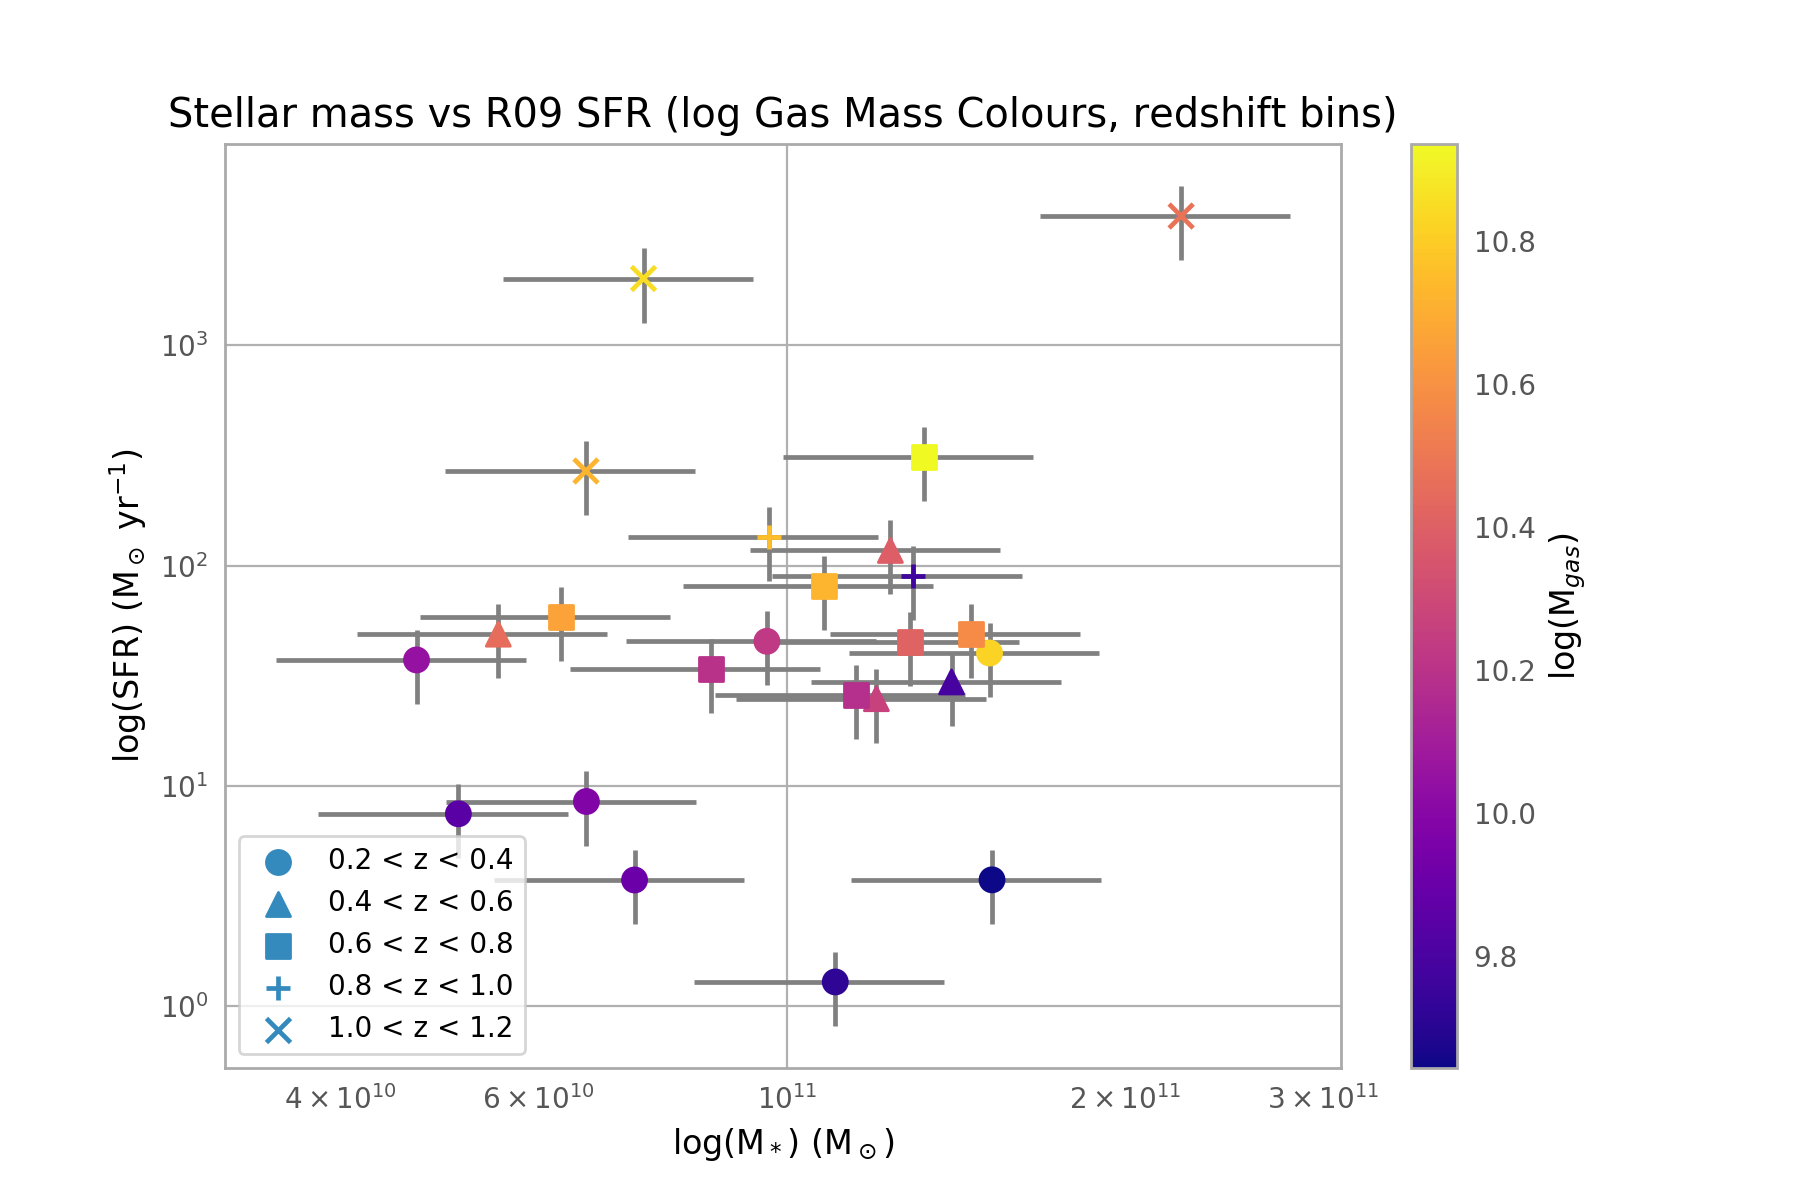

Text(0.5, 1.0, 'Stellar mass vs R09 SFR (log Gas Mass Colours, redshift bins)')

In [1915]:
%matplotlib notebook
fig, ax = plt.subplots(1, figsize=(9, 6))



colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', '+', 'x']
for i in range(len(zidx)):
    im = ax.scatter(mstar.value[zidx[i][0]], 
                    riekesfr[zidx[i][0]], 
                    label='{:.1f} < z < {:.1f}'.format(zbins[i], zbins[i + 1]),
                    c=np.log10(mgas[zidx[i][0]]), cmap='plasma', vmin=np.min(np.log10(mgas)), vmax=np.max(np.log10(mgas)),
                    marker=markers[i], s=75, zorder=5)

ax.errorbar(mstar.value, riekesfr, xerr=dmstar.value, yerr=driekesfr, color='0.5', fmt='none')
ax.set_xlabel(r'$\log(\mathrm{M}_*) \ (\mathrm{M}_\odot)$')
ax.set_ylabel(r'$\log (\mathrm{SFR}) \ (\mathrm{M}_\odot \ \mathrm{yr}^{-1})$')
ax.set_xscale('log')
ax.set_yscale('log')
xvals = np.linspace(10**9+3e9, 10**11 + 3e11, num=1000)


# main sequence from Noeske et al 2007: log(SFR) = (0.67 \pm 0.08) log M_* - (6.19 \pm 0.78) for field galaxies 
# between z=0.2 and z=0.7
# plt.plot(xvals, np.power(10, 0.67*np.log10(xvals) - 6.19), color='k', label='MS (Noeske et al. 2007)')
# plt.plot(xvals, np.power(10, 0.75*np.log10(xvals) - (6.19-0.78)), color='k', ls='--')
# plt.plot(xvals, np.power(10, 0.59*np.log10(xvals) - (6.19+0.78)), color='k', ls='--')

cbar = fig.colorbar(im)
cbar.ax.set_ylabel(r"$\mathrm{log}(\mathrm{M}_{gas})$")
ax.legend(loc='lower left')


ax.set_title("Stellar mass vs R09 SFR (log Gas Mass Colours, redshift bins)")

<IPython.core.display.Javascript object>


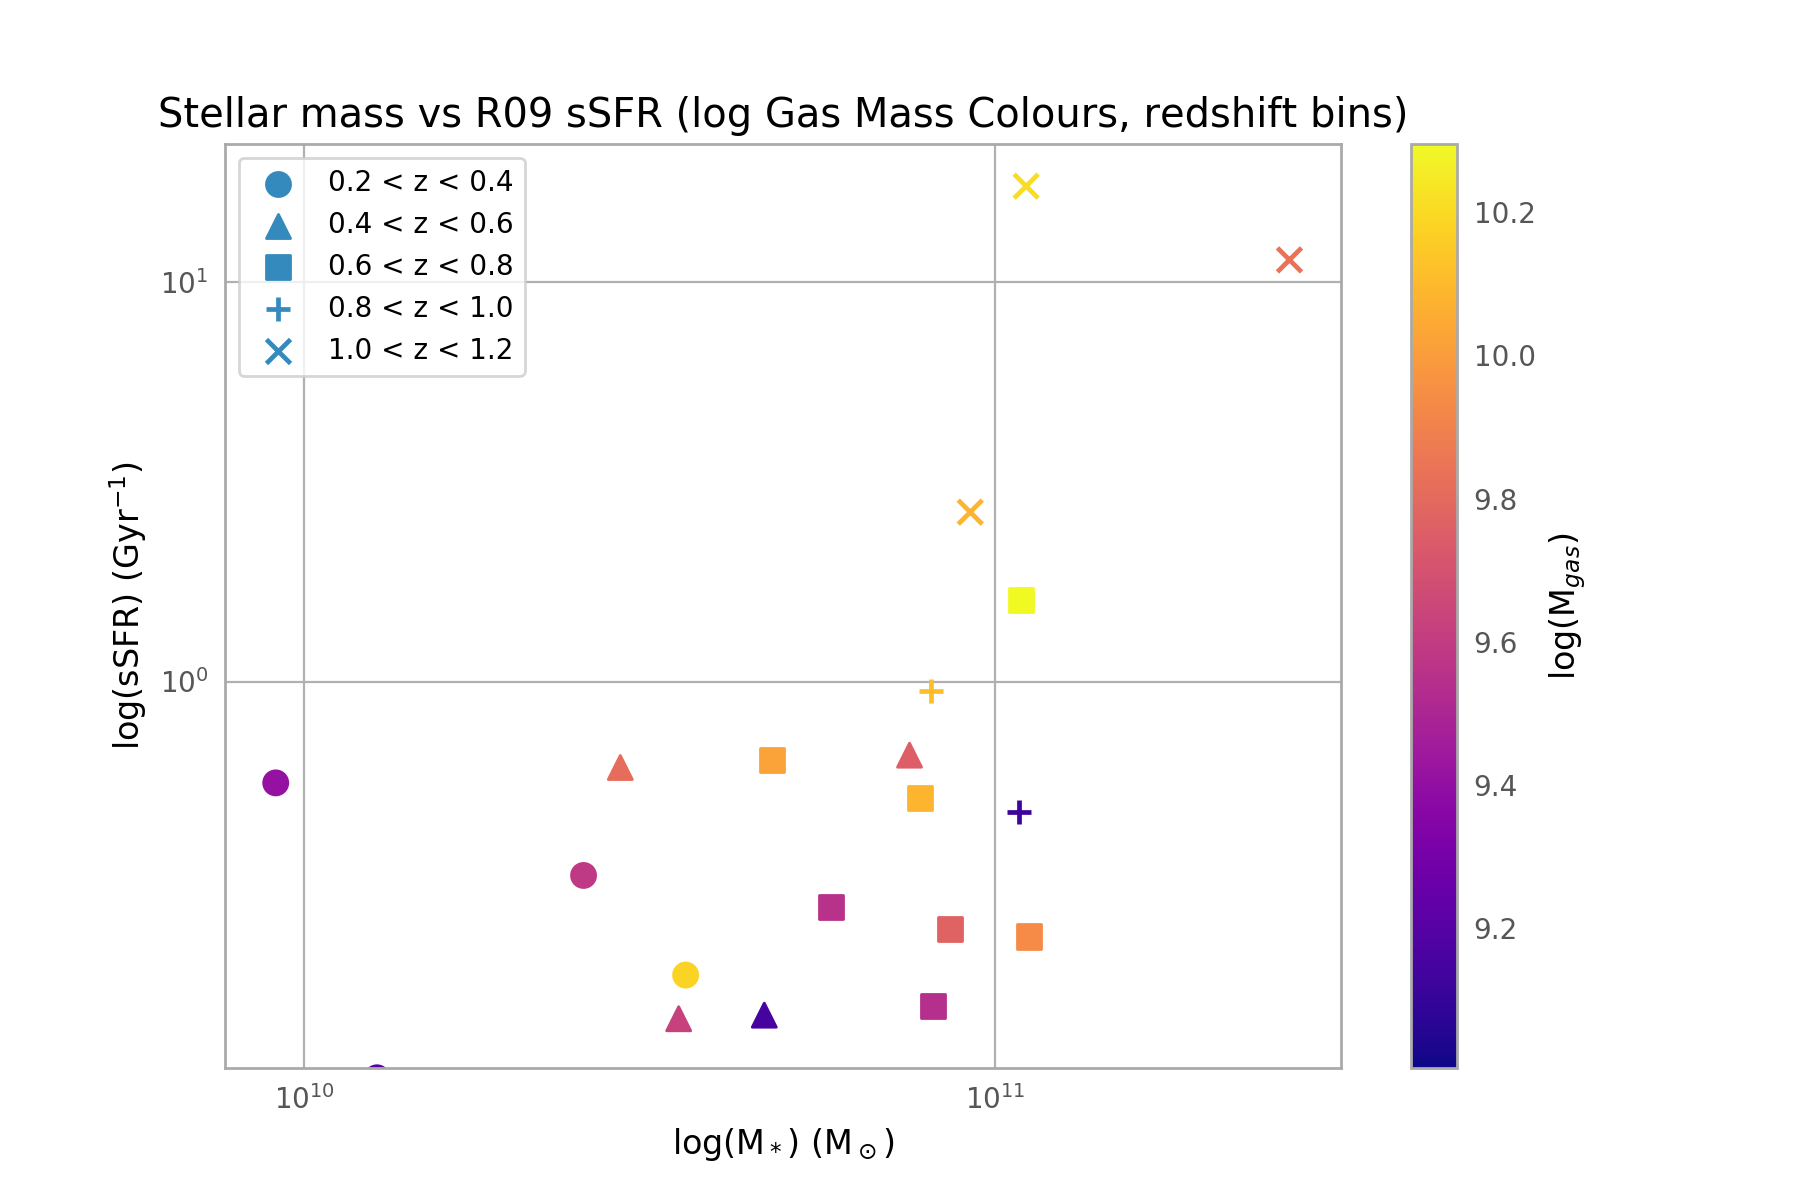

Text(0.5, 1.0, 'Stellar mass vs R09 sSFR (log Gas Mass Colours, redshift bins)')

In [656]:
%matplotlib notebook
fig, ax = plt.subplots(1, figsize=(9, 6))

colors=['darkblue', 'orange', 'blueviolet', 'aquamarine', 'green']
markers = ['o', '^', 's', '+', 'x']
for i in range(len(zidx)):
    im = ax.scatter(mstar_rough.value[zidx[i][0]], 
                    (riekesfr[zidx[i][0]] / mstar.value[zidx[i][0]]/u.yr).to(1/u.Gyr), 
                    label='{:.1f} < z < {:.1f}'.format(zbins[i], zbins[i + 1]),
                    c=np.log10(mgas[zidx[i][0]]), cmap='plasma', vmin=np.min(np.log10(mgas)), vmax=np.max(np.log10(mgas)),
                    marker=markers[i], s=75)
#     ax.errorbar(mstar[zidx[i][0]], mips_sfr_ce[zidx[i][0]].value / mstar[zidx[i][0]], 
#                 yerr=(mips_sfr_err[zidx[i][0]].value),# + 0.3*mips_lum_ce[zidx[i][0]]),
#                 color='0.5', fmt='none', zorder=0, capsize=5)
    
    

ax.set_xlabel(r'$\log(\mathrm{M}_*) \ (\mathrm{M}_\odot)$')
ax.set_ylabel(r'$\log (\mathrm{sSFR}) \ (\mathrm{Gyr}^{-1})$')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(10**9+3e9, 10**11+3e11)
# ax.set_ylim(10e-2, 10e3)

cbar = fig.colorbar(im)
cbar.ax.set_ylabel(r"$\mathrm{log}(\mathrm{M}_{gas})$")
ax.legend()

ax.set_title("Stellar mass vs R09 sSFR (log Gas Mass Colours, redshift bins)")

In [512]:
riekessfr = riekesfr / mstar_rough * 1e9

<IPython.core.display.Javascript object>


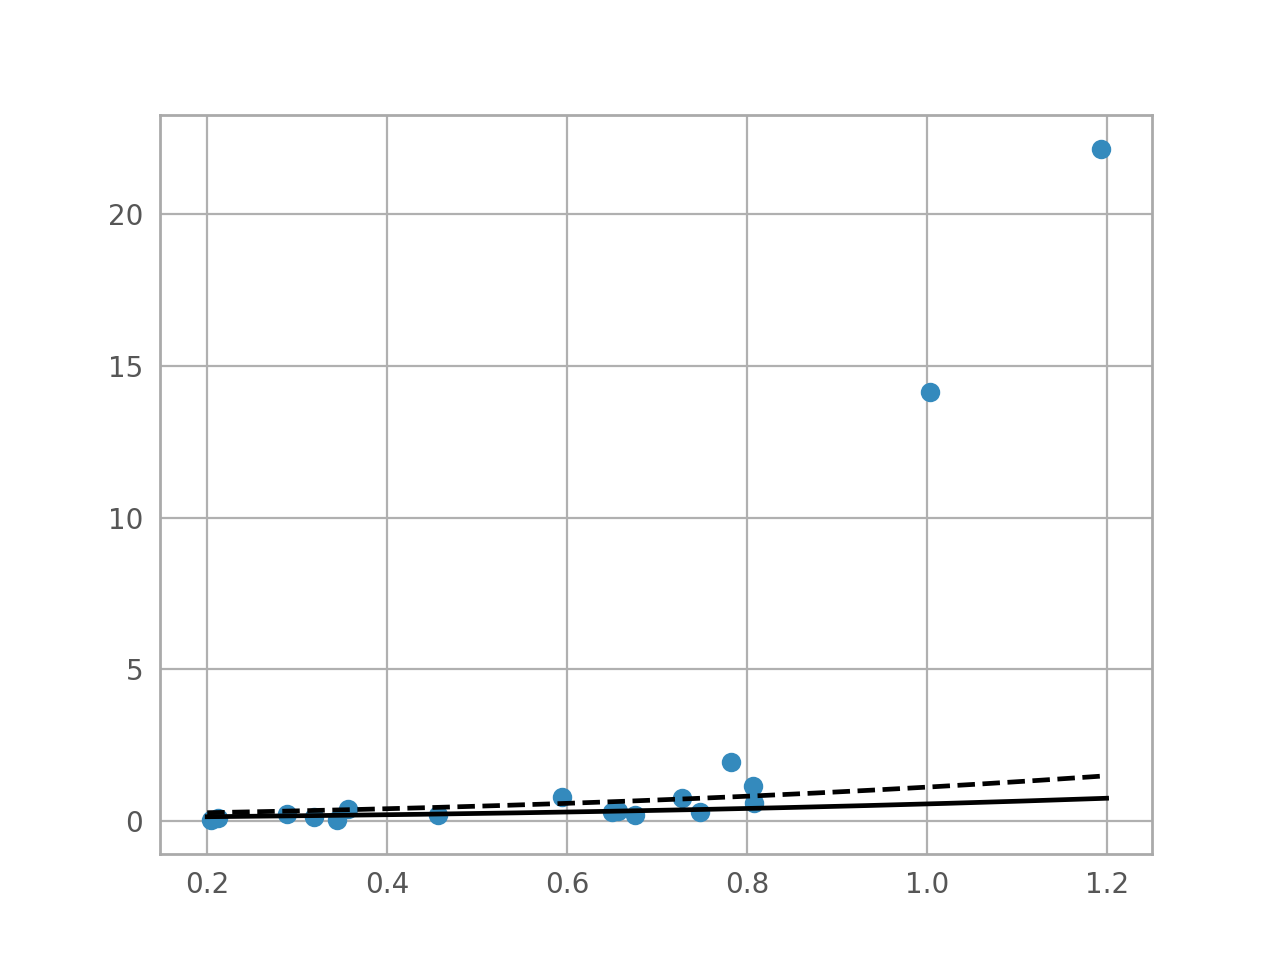

NameError: name 'fastssfr' is not defined

In [1916]:
%matplotlib notebook

zrange = np.linspace(0.2, 1.2, num=500)
plt.plot(zrange, 26 * np.power(cosmo.age(zrange).to(u.Gyr).value, -2.2), color='k')
plt.plot(zrange, 52 *np.power(cosmo.age(zrange).to(u.Gyr).value, -2.2), color='k', ls='--')

plt.scatter(z[goodidx], ssfr[goodidx], label='from MIPS')
plt.scatter(z[goodidx], fastssfr[goodidx], label='from FAST')
plt.scatter(z[goodidx], riekessfr[goodidx], label='from RIEKE+2009')
plt.scatter(z[goodidx], ssfr[goodidx]*0.66, label='from RIEKE+2009 (eq. 10)')
plt.yscale('log')
plt.title('sSFR vs Redshift (MS comparison)')

plt.xlabel('z')
plt.ylabel('sSFR (Gyr^-1)')
plt.ylim((1e-3, 1e2))
plt.legend()

## Cluster mass plots

<IPython.core.display.Javascript object>


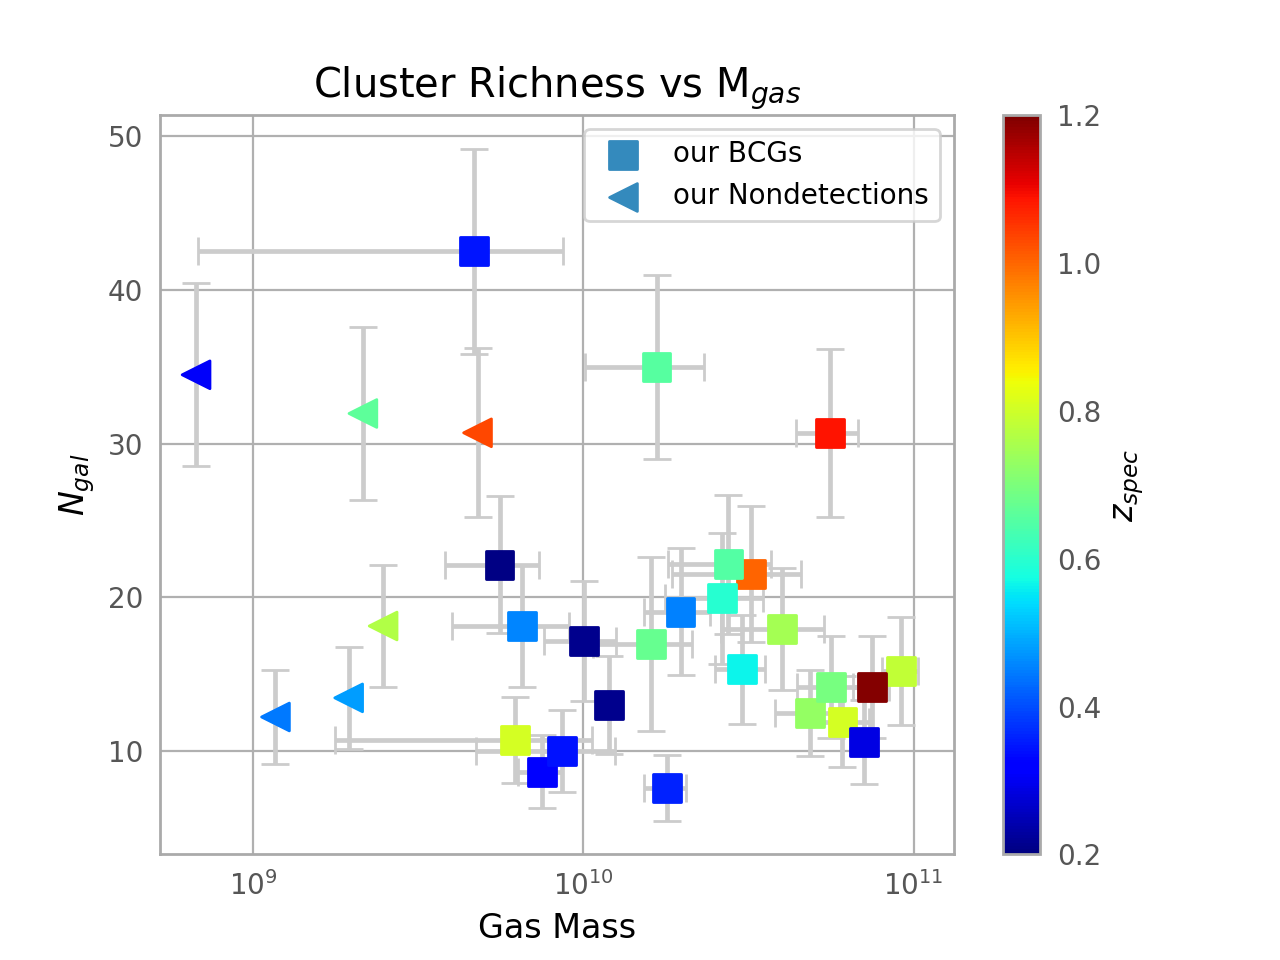

Text(0.5, 1.0, 'Cluster Richness vs $\\mathrm{M}_{gas}$')

In [117]:
%matplotlib notebook
emc = np.where(emcluster > 0)

fig,ax=plt.subplots(1)

im = ax.scatter(mgas, ngal, c=z, cmap='jet', vmin=0.2, vmax=1.2, marker='s', s=100, zorder=10, label='our BCGs')
ax.errorbar(mgas, ngal, xerr=dmgas, yerr=dngal, color='0.8', capsize=5, fmt='none')

ax.scatter(mgaslimits, ngallimits, c=zlimits, cmap='jet', vmin=0.2, vmax=1.2, marker='<', s=100, 
           zorder=10, label='our Nondetections')
ax.errorbar(mgaslimits, ngallimits, yerr=dngallimits, 
            color='0.8', fmt='none', capsize=5)

# from Webb 2018: Ngal=12 corresponds to M200 ~ 1e14 Msun

# ax.scatter(emgas[eggoodidx], emcluster[eggoodidx]*12/1e14, c=ez[eggoodidx], cmap='jet', vmin=0.2, vmax=1.2, 
#            label='E01 BCGs')

ax.set_xscale('log')
ax.set_xlabel('Gas Mass')
ax.set_ylabel(r'$N_{gal}$')

ax.legend()
# ax.set_ylim(0, 160)


cmap = fig.colorbar(im)
cmap.ax.set_ylabel(r'$z_{spec}$')
ax.set_title(r'Cluster Richness vs $\mathrm{M}_{gas}$')

<IPython.core.display.Javascript object>


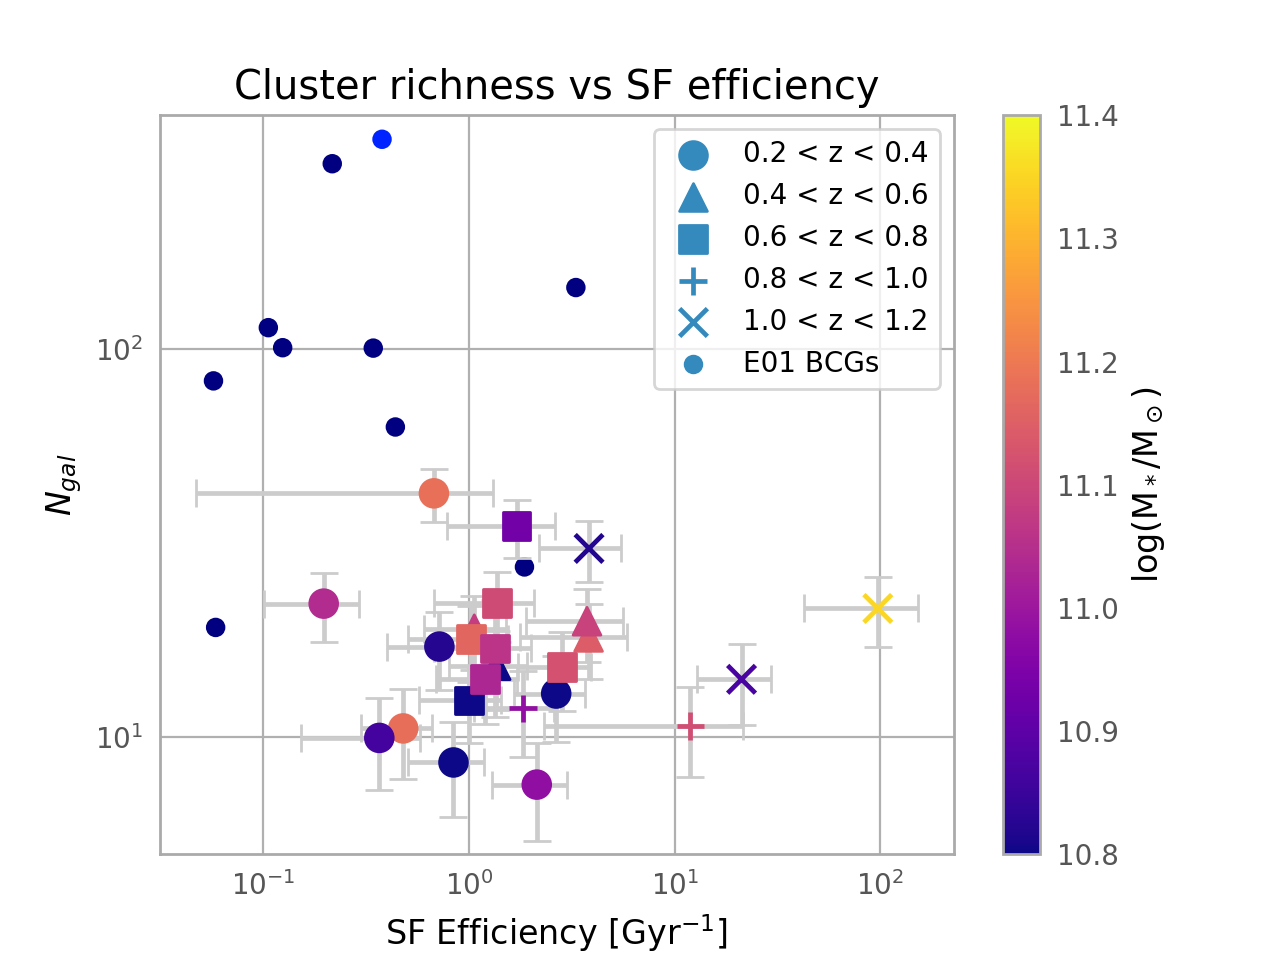

(5, 400)

In [121]:
%matplotlib notebook
emc = np.where(emcluster > 0)

fig,ax=plt.subplots(1)

markers = ['o', '^', 's', '+', 'x']
for i in range(len(zidx)):
    im = ax.scatter(efficiency[zidx[i][0]], ngal[zidx[i][0]], c=np.log10(mstar.value[zidx[i][0]]), cmap='plasma', 
                    marker=markers[i], vmin=10.8, vmax=11.4, s=100, zorder=10, 
                    label='{:.1f} < z < {:.1f}'.format(zbins[i], zbins[i + 1]),)
ax.errorbar(efficiency, ngal, xerr=defficiency, yerr=dngal, color='0.8', capsize=5, fmt='none')

# from Webb 2018: Ngal=12 corresponds to M200 ~ 1e14 Msun

ax.scatter(eriekesfr[eggoodidx]/emgas[eggoodidx]*1e9, emcluster[eggoodidx]*12/1e14, c=ez[eggoodidx], cmap='jet', vmin=0.2, vmax=1.2, label='E01 BCGs')

ax.set_xscale('log')
ax.set_xlabel(r'SF Efficiency [$\mathrm{Gyr}^{-1}$]')
ax.set_ylabel(r'$N_{gal}$')

ax.legend()



cmap = fig.colorbar(im)
cmap.ax.set_ylabel(r'$\log{(\mathrm{M}_*/\mathrm{M}_\odot)}$')
ax.set_title('Cluster richness vs SF efficiency')
ax.set_yscale('log')
ax.set_ylim(5, 400)

<IPython.core.display.Javascript object>


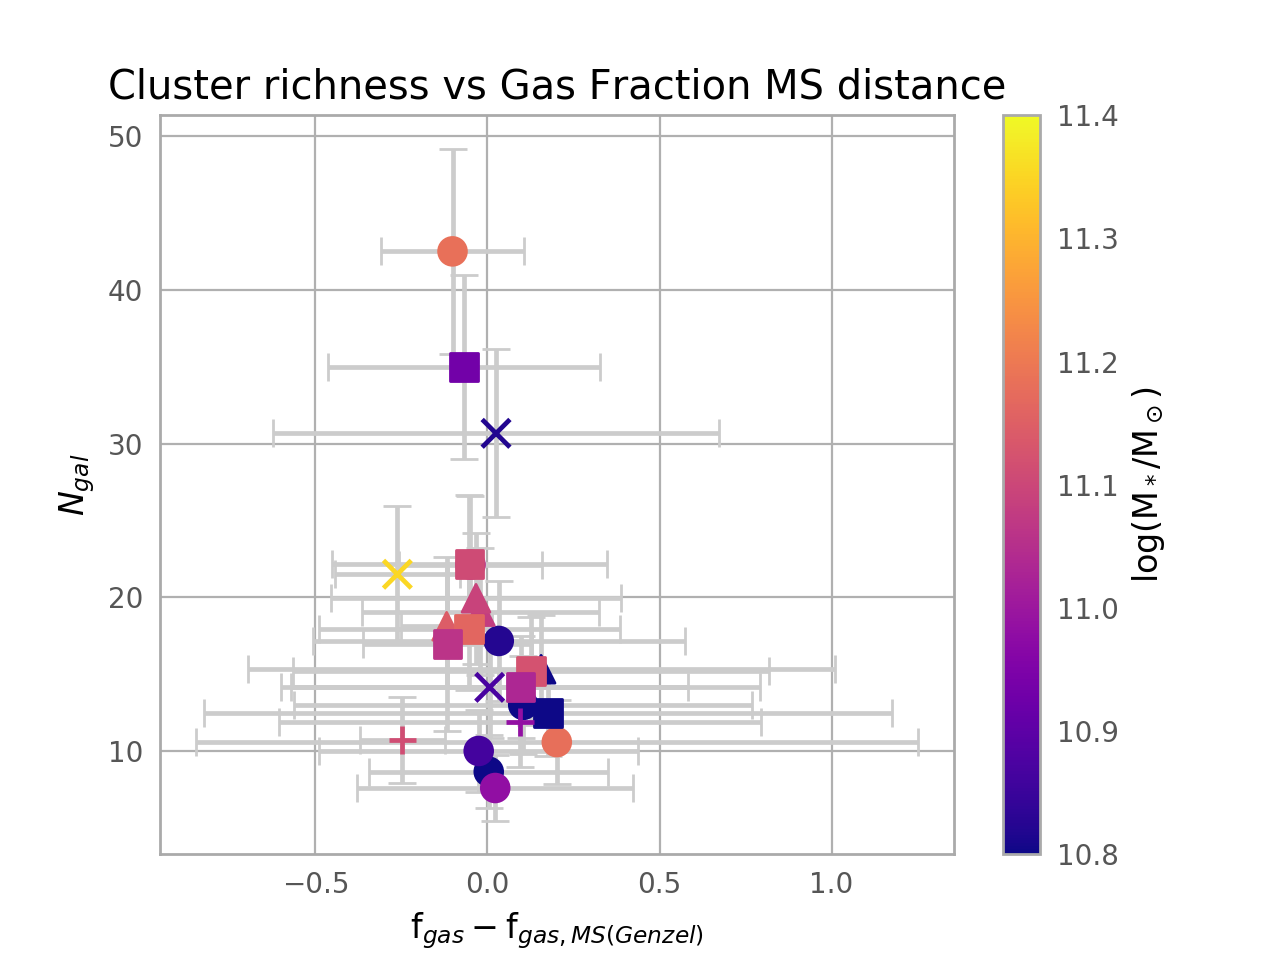

Text(0.5, 1.0, 'Cluster richness vs Gas Fraction MS distance')

In [122]:
%matplotlib notebook
emc = np.where(emcluster > 0)

fig,ax=plt.subplots(1)

markers = ['o', '^', 's', '+', 'x']
for i in range(len(zidx)):
    im = ax.scatter(fgas_msdistance[zidx[i][0]], ngal[zidx[i][0]], c=np.log10(mstar.value[zidx[i][0]]), cmap='plasma', 
                    marker=markers[i], vmin=10.8, vmax=11.4, s=100, zorder=10, 
                    label='{:.1f} < z < {:.1f}'.format(zbins[i], zbins[i + 1]),)
ax.errorbar(fgas_msdistance, ngal, xerr=dfgas_msdistance, yerr=dngal, color='0.8', capsize=5, fmt='none')

# from Webb 2018: Ngal=12 corresponds to M200 ~ 1e14 Msun

# ax.scatter(emgas[eggoodidx], emcluster[eggoodidx]*12/1e14, c=ez[eggoodidx], cmap='jet', vmin=0.2, vmax=1.2, label='E01 BCGs')

# ax.set_xscale('log')
ax.set_xlabel(r'$\mathrm{f}_{gas} - \mathrm{f}_{gas, MS (Genzel)}$')
ax.set_ylabel(r'$N_{gal}$')

# ax.legend()
# ax.set_ylim(0, 160)


cmap = fig.colorbar(im)
cmap.ax.set_ylabel(r'$\log{(\mathrm{M}_*/\mathrm{M}_\odot)}$')
ax.set_title('Cluster richness vs Gas Fraction MS distance')

<IPython.core.display.Javascript object>


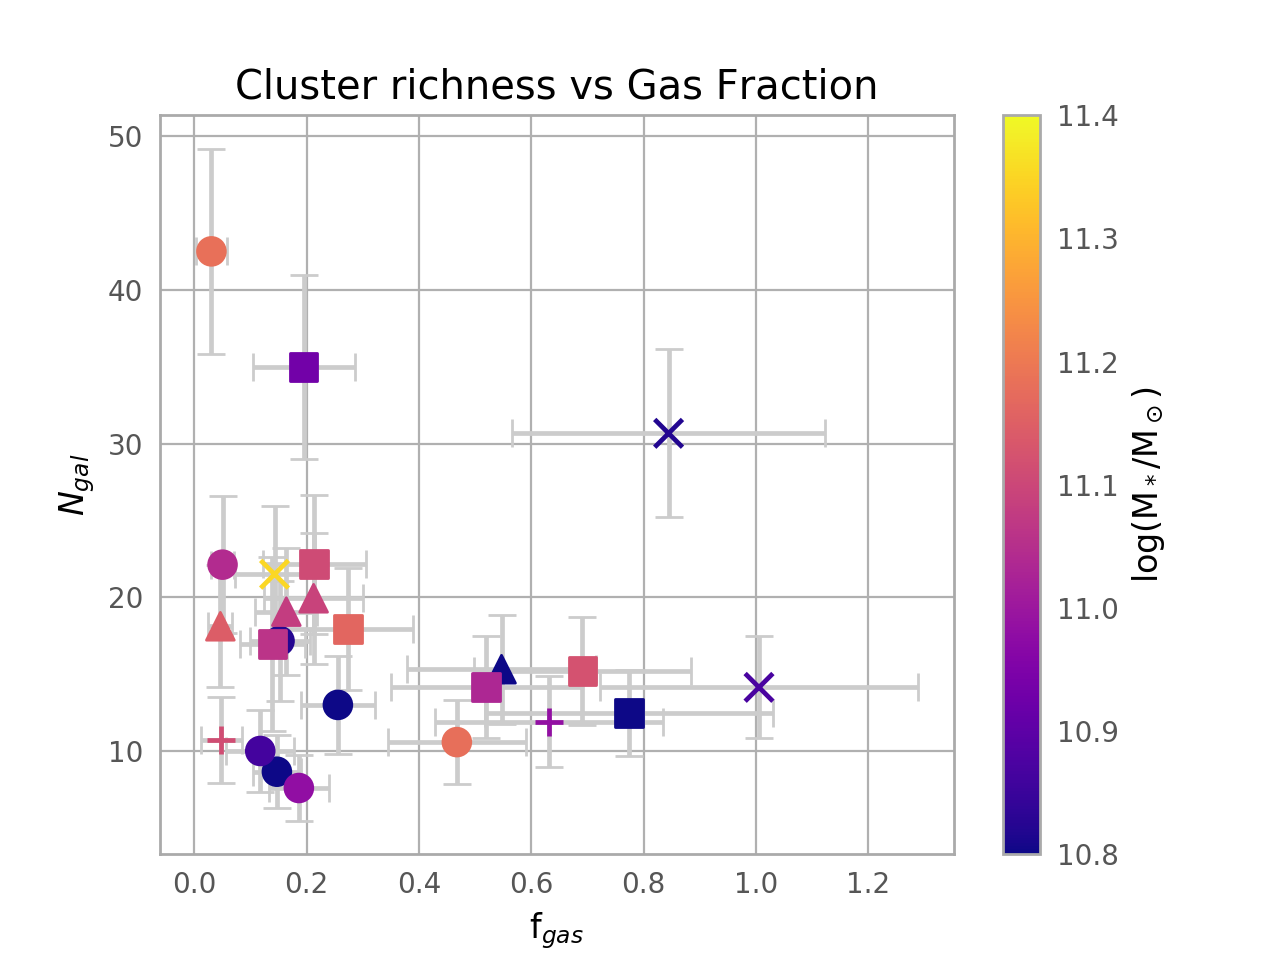

Text(0.5, 1.0, 'Cluster richness vs Gas Fraction')

In [123]:
%matplotlib notebook
emc = np.where(emcluster > 0)

fig,ax=plt.subplots(1)

markers = ['o', '^', 's', '+', 'x']
for i in range(len(zidx)):
    im = ax.scatter(fgas[zidx[i][0]], ngal[zidx[i][0]], c=np.log10(mstar.value[zidx[i][0]]), cmap='plasma', 
                    marker=markers[i], vmin=10.8, vmax=11.4, s=100, zorder=10, 
                    label='{:.1f} < z < {:.1f}'.format(zbins[i], zbins[i + 1]),)
ax.errorbar(fgas, ngal, xerr=dfgas, yerr=dngal, color='0.8', capsize=5, fmt='none')

# from Webb 2018: Ngal=12 corresponds to M200 ~ 1e14 Msun

# ax.scatter(emgas[eggoodidx], emcluster[eggoodidx]*12/1e14, c=ez[eggoodidx], cmap='jet', vmin=0.2, vmax=1.2, label='E01 BCGs')

# ax.set_xscale('log')
ax.set_xlabel(r'$\mathrm{f}_{gas}$')
ax.set_ylabel(r'$N_{gal}$')

# ax.legend()
# ax.set_ylim(0, 160)


cmap = fig.colorbar(im)
cmap.ax.set_ylabel(r'$\log{(\mathrm{M}_*/\mathrm{M}_\odot)}$')
ax.set_title('Cluster richness vs Gas Fraction')

## SFR Efficiency

In [119]:
efficiency = riekesfr / mgas * 1e9
defficiency = efficiency*np.sqrt((driekesfr/riekesfr)**2 + (dmgas/mgas)**2)

In [120]:
eeffidx = np.where(np.logical_and(edmgas > 0, np.isnan(eriekesfr) == False))
eeffidx

(array([ 0,  1,  3,  4,  9, 14, 16, 21, 23, 25, 26, 29, 31]),)

<IPython.core.display.Javascript object>


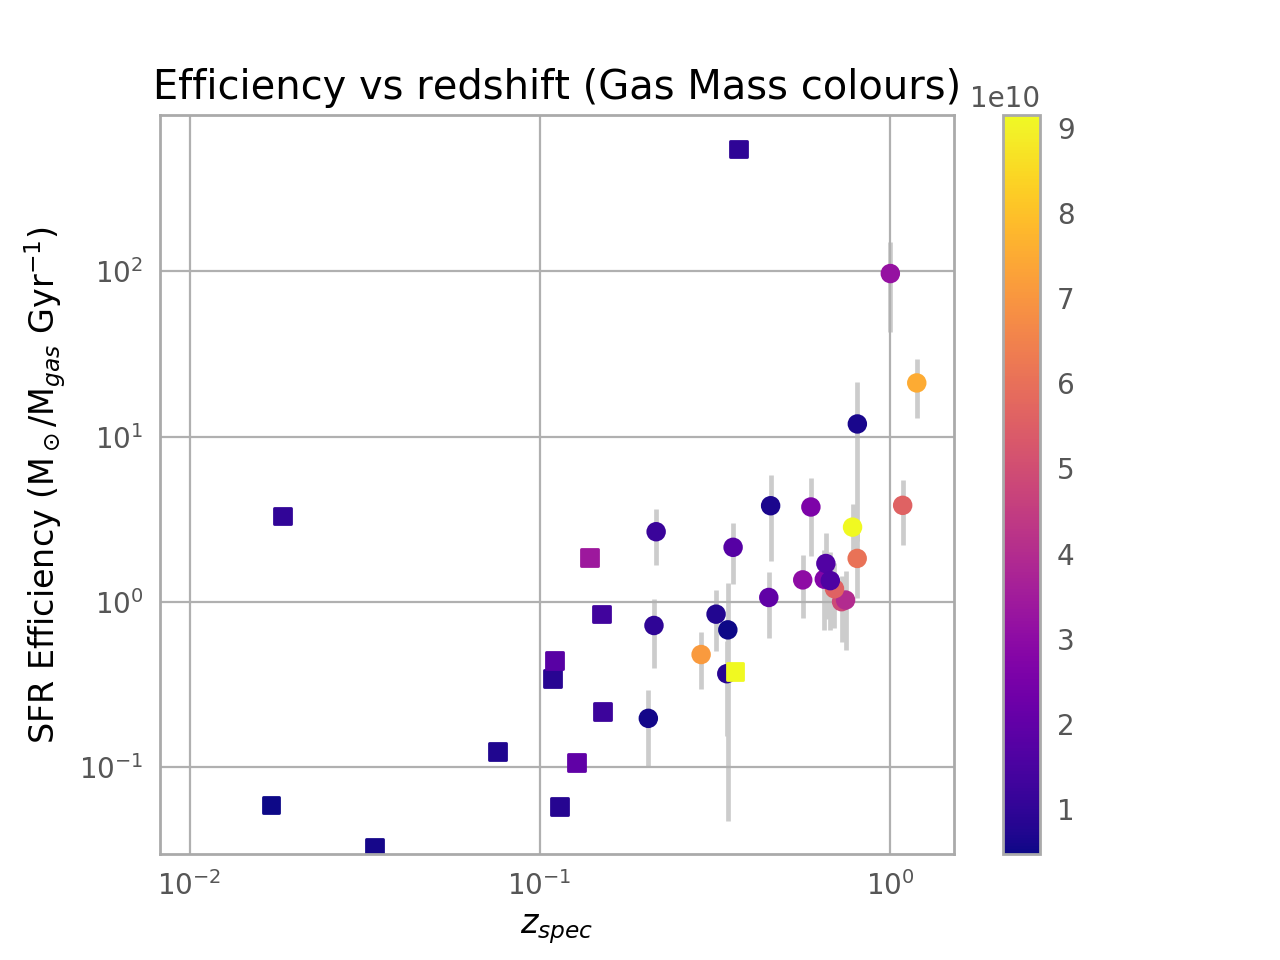

In [124]:
%matplotlib notebook

fig,ax = plt.subplots(1)

im = ax.scatter(z, efficiency, c=mgas, cmap='plasma')
ax.scatter(ez[eeffidx], eriekesfr[eeffidx]/emgas[eeffidx]*1e9, c=emgas[eeffidx], cmap='plasma', marker='s')
ax.errorbar(z, efficiency, yerr=defficiency, color='0.8', fmt='none', zorder=0)
ax.set_yscale('log')
ax.set_ylabel(r'SFR Efficiency $(\mathrm{M}_\odot / \mathrm{M}_{gas} \ \mathrm{Gyr}^{-1})$')
ax.set_xlabel(r'$z_{spec}$')
ax.set_title('Efficiency vs redshift (Gas Mass colours)')

fig.colorbar(im)
ax.set_xscale('log')

<IPython.core.display.Javascript object>


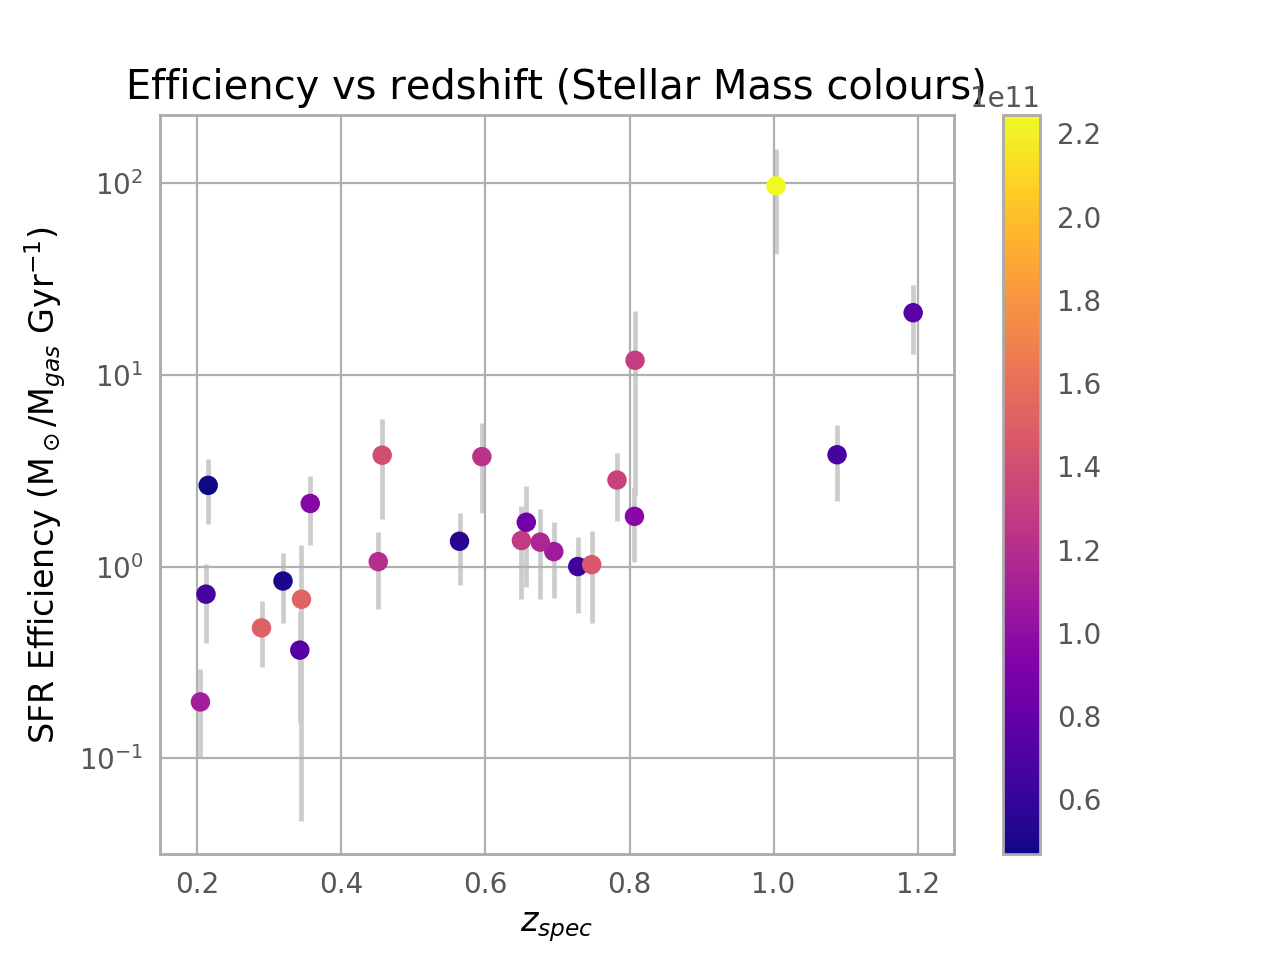

In [125]:
%matplotlib notebook

fig,ax = plt.subplots(1)

im = ax.scatter(z, efficiency, c=mstar, cmap='plasma')
ax.errorbar(z, efficiency, yerr=defficiency, color='0.8', fmt='none', zorder=0)
ax.set_yscale('log')
ax.set_ylabel(r'SFR Efficiency $(\mathrm{M}_\odot / \mathrm{M}_{gas} \ \mathrm{Gyr}^{-1})$')
ax.set_xlabel(r'$z_{spec}$')
ax.set_title('Efficiency vs redshift (Stellar Mass colours)')

fig.colorbar(im)

<IPython.core.display.Javascript object>


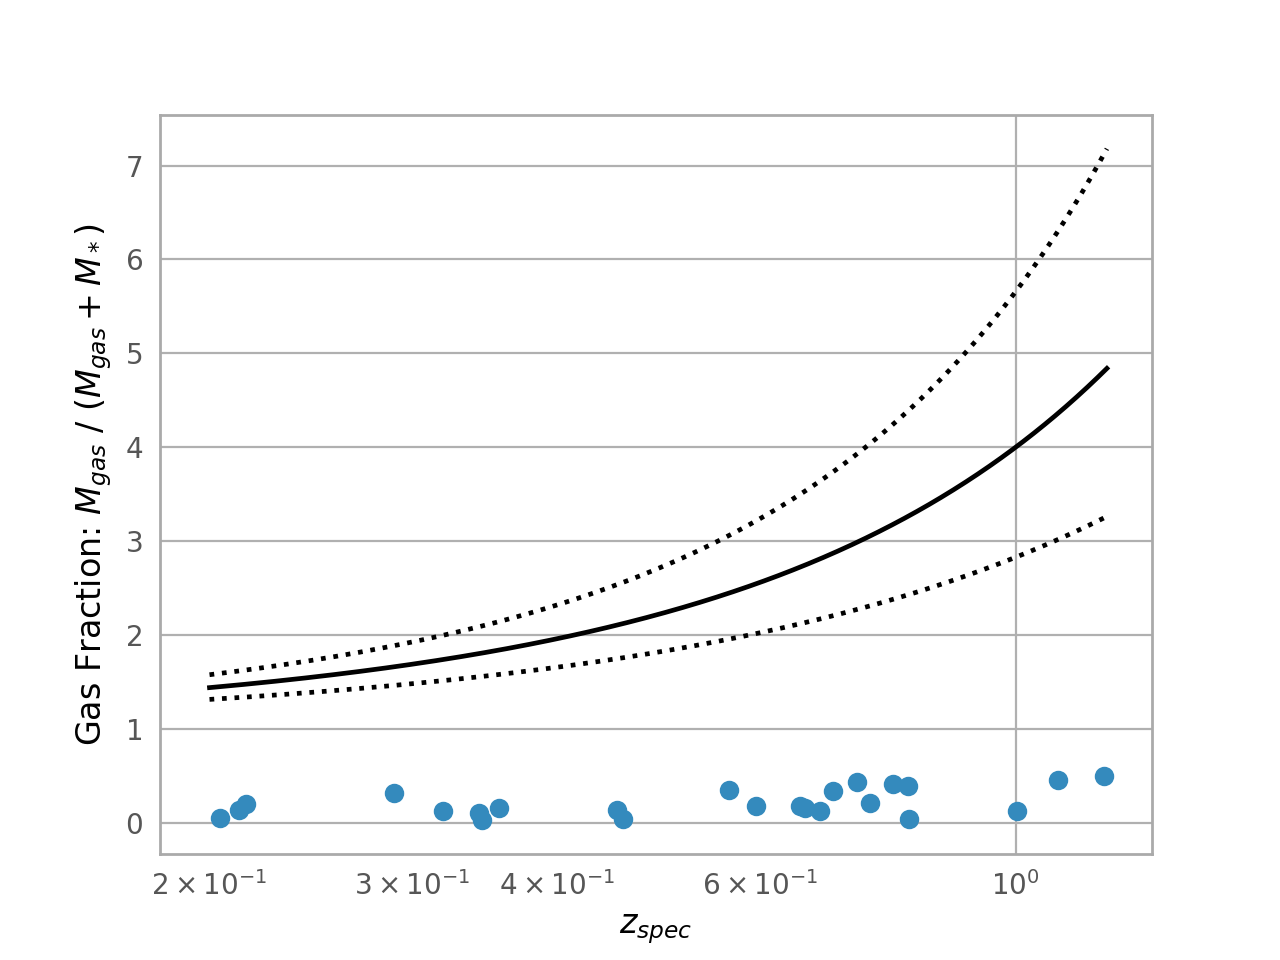

Text(0, 0.5, 'Gas Fraction: $M_{gas} \\ / \\ (M_{gas} + M_*)$')

In [126]:
# gas fraction main sequence plot - MS from Geach et al (2011)
mgas_ms = (1+z)**2
mgas_ms_up = (1+z)**2.5
mgas_ms_down = (1+z)**1.5

fgas = mgas/(mstar.value + mgas)

%matplotlib notebook
fig,ax = plt.subplots(1)
zrange = np.linspace(0.2, 1.2, num=500)

plt.scatter(z, fgas)

a = 1
b = 0.

plt.plot(zrange, a*(1+zrange)**2 - b, color='k', zorder=5)
plt.plot(zrange, a*(1+zrange)**2.5 - b, color='k', ls=':')
plt.plot(zrange, a*(1+zrange)**1.5 - b, color='k', ls=':')

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel(r'$z_{spec}$')
ax.set_ylabel(r'Gas Fraction: $M_{gas} \ / \ (M_{gas} + M_*)$')

## Kennicutt-Schmidt relation for resolved galaxies

In [831]:
# indices of resolved galaxies in full galaxy list
res = np.array([2, 3, 4, 6, 12, 15, 16, 19, 21, 22])

majax = np.array([2.74, 1.98, 1.9, 1.84, 1.18, 1.71, 1.4, 2.08, 1.44, 2.78])*u.arcsec

dmajax = np.array([1.14, 0.44, 1.3, 0.55, 0.4, 0.17, 0.26, 0.61, 0.39, 0.79])*u.arcsec

minax = np.array([0.87, 0.94, 1.5, 1., 0.7, 0.46, 1.02, 1.84, 0.61, 1.05])*u.arcsec

dminax = np.array([0.72, 0.33, 1.2, 0.65, 0.42, 0.37, 0.42, 0.94, 0.33, 0.58])*u.arcsec

zres = z[res]

area = np.pi * majax * minax / (cosmo.arcsec_per_kpc_comoving(zres).to(u.arcsec/u.pc))**2

darea = area * np.sqrt((dmajax/majax)**2 + (dminax/minax)**2)

sig_sfr = riekesfr[res]/(area.to(u.kpc**2))

sig_gas = (mgas[res]*u.Msun) / area

<IPython.core.display.Javascript object>


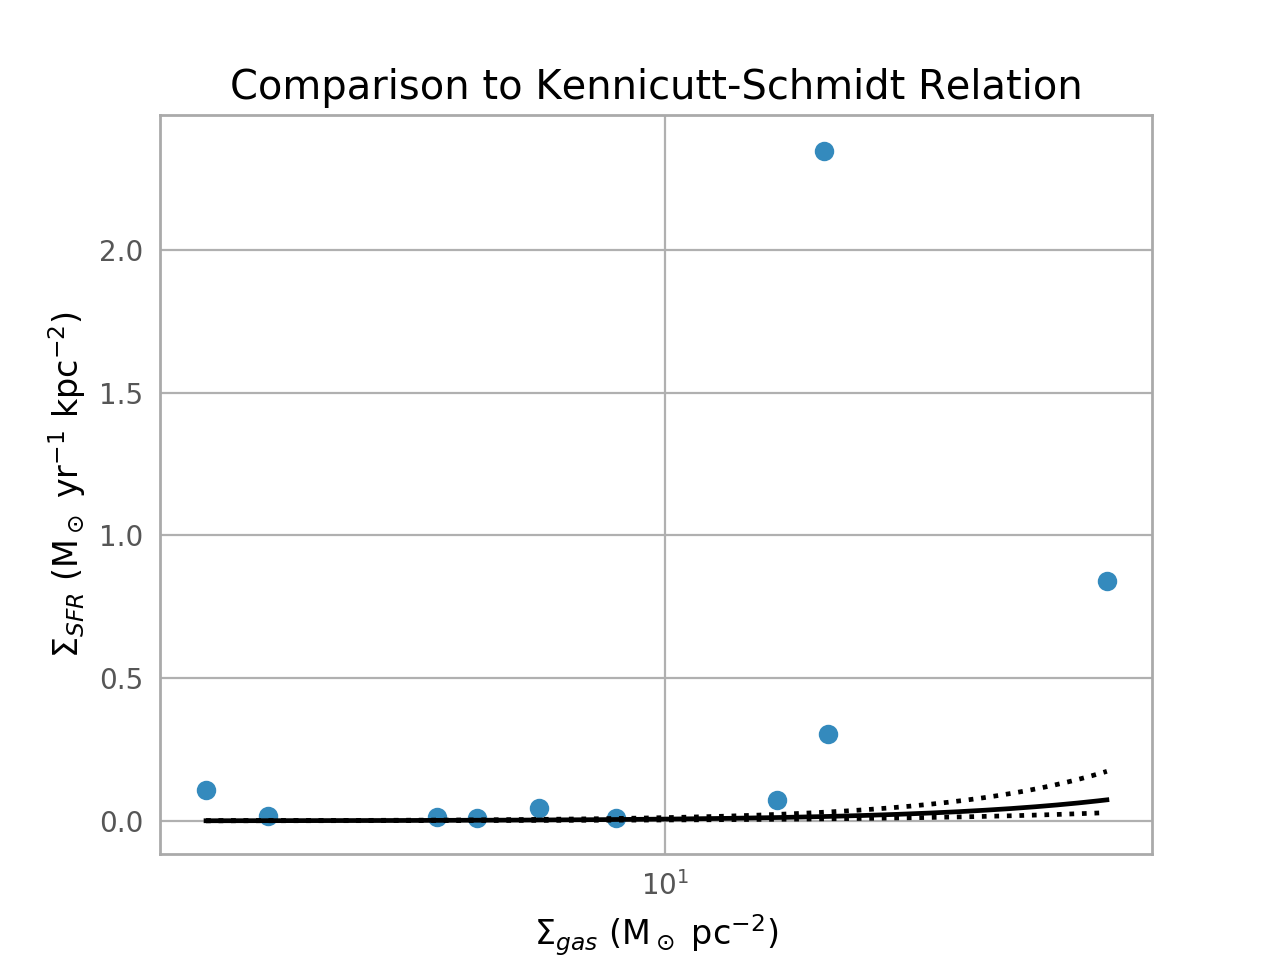

Text(0.5, 1.0, 'Comparison to Kennicutt-Schmidt Relation')

In [1258]:
%matplotlib notebook

fig,ax = plt.subplots(1)
ax.scatter(sig_gas, sig_sfr)

xvals = np.linspace(np.min(sig_gas/u.Msun), np.max(sig_gas/u.Msun), num=500)
ax.plot(xvals, 2.5e-4*xvals**1.4, color='k')
ax.plot(xvals, 3.2e-4*xvals**1.55, color='k', ls=':')
ax.plot(xvals, 1.8e-4*xvals**1.25, color='k', ls=':')

ax.set_xlabel(r'$\Sigma_{gas} \ (\mathrm{M}_\odot \ \mathrm{pc}^{-2})$')
ax.set_ylabel(r'$\Sigma_{SFR} \ (\mathrm{M}_\odot \ \mathrm{yr}^{-1}\ \mathrm{kpc}^{-2})$')
ax.set_xscale('log')

ax.set_title('Comparison to Kennicutt-Schmidt Relation')

<IPython.core.display.Javascript object>


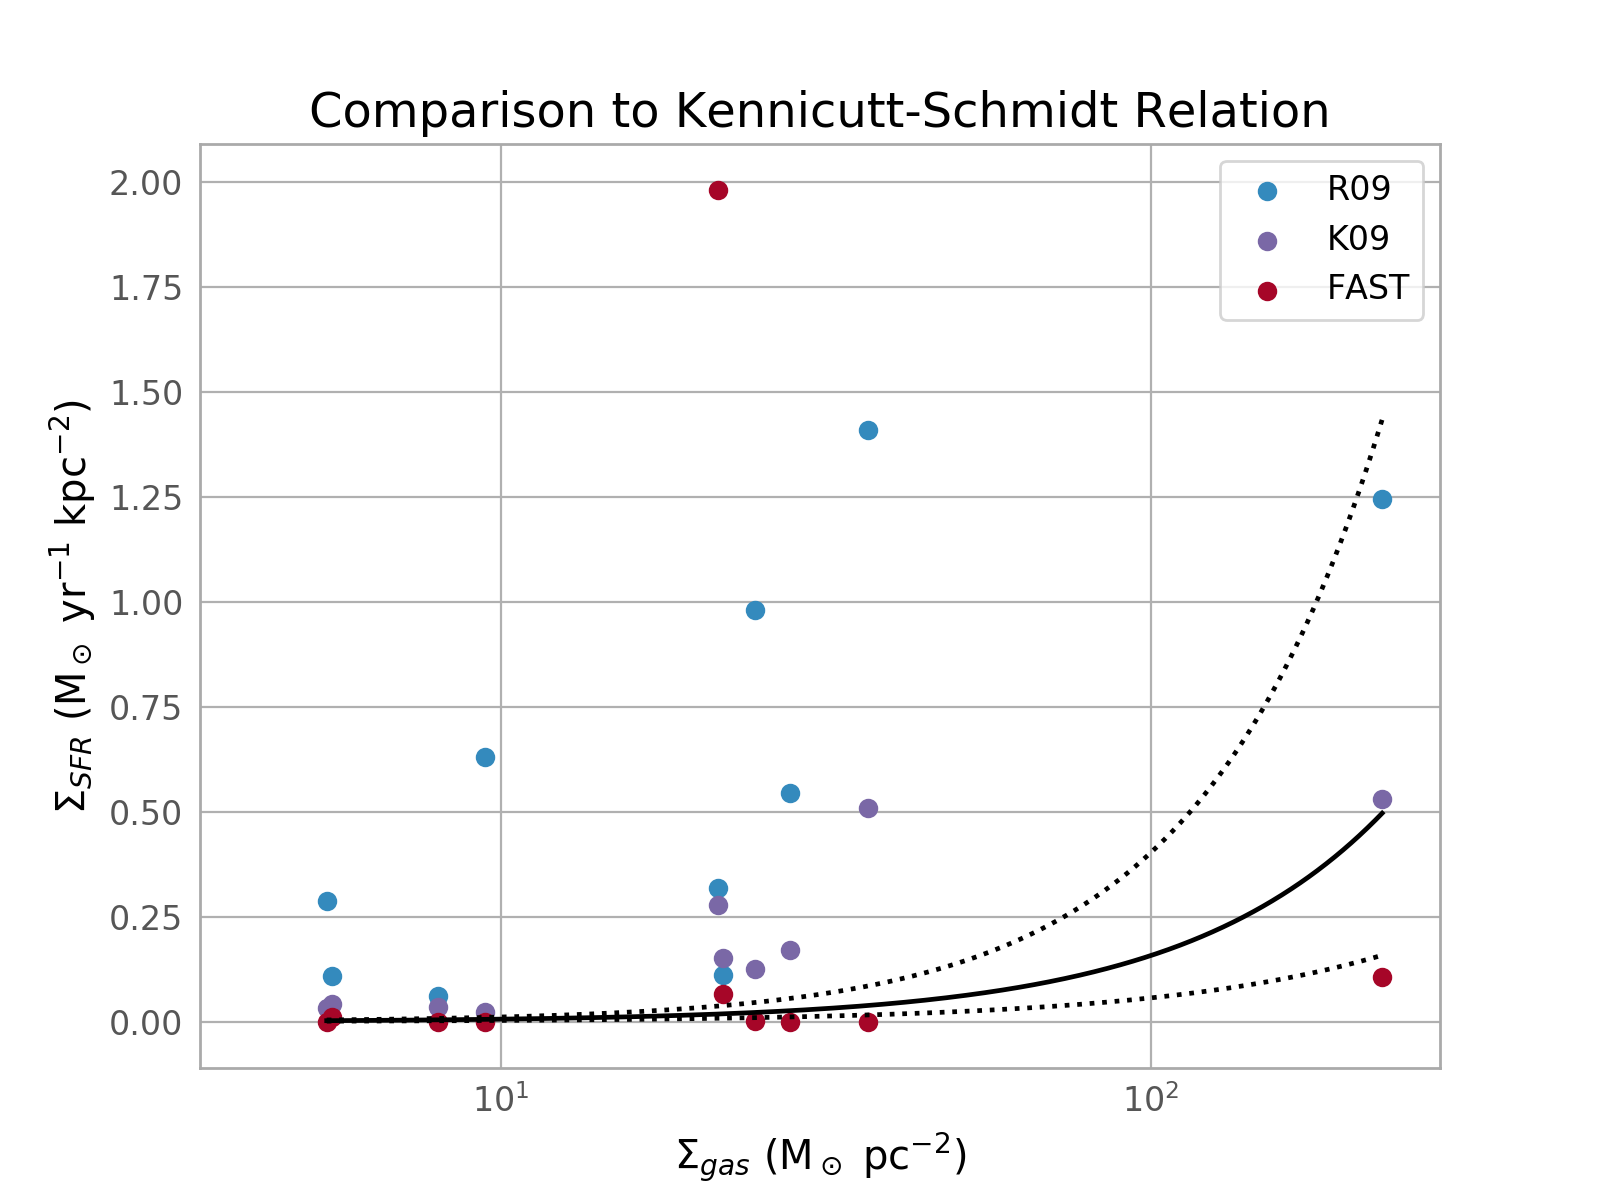

Text(0.5, 1.0, 'Comparison to Kennicutt-Schmidt Relation')

In [2421]:
%matplotlib notebook

fig,ax = plt.subplots(1)
ax.scatter(sig_gas, riekesfr[res] / (area.to(u.kpc **2)), label='R09')
ax.scatter(sig_gas, sig_sfr, label='K09')
ax.scatter(sig_gas, fastsfr[res] / (area.to(u.kpc**2)), label='FAST')

xvals = np.linspace(np.min(sig_gas/u.Msun), np.max(sig_gas/u.Msun), num=500)
ax.plot(xvals, 2.5e-4*xvals**1.4, color='k')
ax.plot(xvals, 3.2e-4*xvals**1.55, color='k', ls=':')
ax.plot(xvals, 1.8e-4*xvals**1.25, color='k', ls=':')

ax.set_xlabel(r'$\Sigma_{gas} \ (\mathrm{M}_\odot \ \mathrm{pc}^{-2})$')
ax.set_ylabel(r'$\Sigma_{SFR} \ (\mathrm{M}_\odot \ \mathrm{yr}^{-1}\ \mathrm{kpc}^{-2})$')
ax.set_xscale('log')
ax.legend()

ax.set_title('Comparison to Kennicutt-Schmidt Relation')

# IRAC colour-colour plot

In [161]:
eggoodidx

NameError: name 'eggoodidx' is not defined

## SFR from FAST

In [1280]:
logfastsfr = np.array([2.48, 1.80, 0.99, 1.77, -22.44, 3.49, -0.60, -0.59, -99, 0.42, 0.56, 0.15, -99, 2.86, 0.80,
                       0.86, -99, 0.93, -99, -99, -3.56, 2.73, -2.36, -99, 0.98])

logfastssfr = np.array([-7.72, -9.10, -10.02, -9.39, -33.41, -7.17, -11.11, -12.06, -99, -10.37, -10.38, 
                        -10.89, -99, -6.95, -10.48, -10.39, -99, -10.30, -99, -99, -14.60, -7.73, -13.54, -99, -9.74])

fastsfr = np.power(10, logfastsfr)
fastssfr = np.power(10, logfastssfr + 9)

In [1281]:
for i in range(len(fastssfr)):
    print(mips_sfr_ce[i], fastsfr[i], ssfr[i], fastssfr[i])

656.1077350350108 erg / s 301.9951720402016 41.39759941906053 1 / Gyr 19.054607179632484
27.32719823377332 erg / s 63.09573444801933 0.34402904289633884 1 / Gyr 0.7943282347242822
35.829966755884904 erg / s 9.772372209558107 0.3501437713946006 1 / Gyr 0.09549925860214369
135.88415595140185 erg / s 58.8843655355589 0.9400886754435848 1 / Gyr 0.4073802778041122
3.0208435713338324 erg / s 3.630780547701003e-23 0.025711548710213368 1 / Gyr 3.8904514499428364e-25
373.07868739360384 erg / s 3090.295432513592 7.976280900487794 1 / Gyr 67.60829753919819
11.05396758664121 erg / s 0.251188643150958 0.3416002554415062 1 / Gyr 0.007762471166286928
6.406316053848839 erg / s 0.2570395782768864 0.021707427572274327 1 / Gyr 0.0008709635899560796
75.36001733265549 erg / s 1e-99 7.536001733265549e+109 1 / Gyr 1e-90
75.36001733265549 erg / s 2.6302679918953817 1.2221963704724488 1 / Gyr 0.04265795188015934
44.02257469299341 erg / s 3.630780547701014 0.49394141211425274 1 / Gyr 0.041686938347033464
27.327

# COORDINATE SEARCHES IN FILES

In [164]:
# first load in the file
os.chdir('/Users/dee/Documents/ALMA/catalogues/')
os.listdir()

['CDFS_finalzIRAC.sav',
 'FAST_catalogs',
 '.DS_Store',
 'xmm_24_aopbmg.tbl',
 'XMMLSS_bgcs_v2.dat',
 'es1_alma_targets_CO.lst',
 'XMMLSS_finalzIRAC.sav',
 'ELAISS1_bgcs_v2.dat',
 'CDFS_bgcs_v2.dat',
 'CDFS_matched_both.dat',
 'cdfs_24_aopbmg.tbl',
 'ELAISS1_matched_both.dat',
 'es1_24_aopbmg.tbl',
 'XMM-LSS_zI1_v2.cat',
 'cdfs_alma_targets_CO.lst',
 'ELAISS1_finalzIRAC.sav',
 'ELAIS-S1_zI1_v2.cat',
 'XMM_matched_both.dat',
 'CDFS_zI1_v2.cat',
 'xmm_alma_targets_CO.lst']

In [5]:
# astropy coordinates module
from astropy.coordinates import SkyCoord
from scipy.io import readsav

In [6]:
xmmcat = np.genfromtxt('bcg.cat')

OSError: bcg.cat not found.

In [111]:
xmmcat = readsav('CDFS_finalzIRAC.sav', verbose=True)

--------------------------------------------------
Date: Tue Apr 16 08:30:09 2019
User: allison
Host: Allisons-MacBook-Pro-4.local
--------------------------------------------------
Format: 12
Architecture: x86_64
Operating System: darwin
IDL Version: 8.4.1
--------------------------------------------------
Successfully read 22 records of which:
 - 1 are of type TIMESTAMP
 - 19 are of type VARIABLE
 - 1 are of type VERSION
--------------------------------------------------
Available variables:
 - apmag_176 [<class 'numpy.ndarray'>]
 - apmag_366 [<class 'numpy.ndarray'>]
 - c1ebap [<class 'numpy.ndarray'>]
 - c1_3pxapc [<class 'numpy.ndarray'>]
 - c1_3pxerr [<class 'numpy.ndarray'>]
 - c2ebap [<class 'numpy.ndarray'>]
 - c2_3pxapc [<class 'numpy.ndarray'>]
 - c2_3pxerr [<class 'numpy.ndarray'>]
 - ch1bf [<class 'numpy.ndarray'>]
 - ch2bf [<class 'numpy.ndarray'>]
 - cnt [<class 'numpy.float32'>]
 - decr [<class 'numpy.ndarray'>]
 - eapmag_176 [<class 'numpy.ndarray'>]
 - eapmag_366 [<cl

In [113]:
xmmra = xmmcat['rar']
xmmdec = xmmcat['decr']
# xmmid = xmmcat['']
catcoords = SkyCoord(ra=xmmra*u.deg, dec=xmmdec*u.deg, frame='icrs')

In [ ]:
1  |  2902.51821 |    0.28907 |  52.26829,-28.798082 | 178.84398 |   268.266 | 5 | 6 |    
2  | 6130.124017 |    0.21505 | 52.905324,-28.404282 | 189.73904 | 284.60855 | 5 | 7 |
3  |  399.065864 |    0.80761 | 53.319815,-26.896216 | 127.53991 | 191.30986 | 4 | 5 |
4  |  646.354719 |    0.45114 | 53.462808,-27.335054 | 158.86987 | 238.30481 | 4 | 6 |
5  |  510.554238 |    0.69484 |  53.48398,-27.259376 | 136.02608 | 204.03911 | 4 | 5 |
7  |  232.944713 |    0.67603 | 53.728043,-27.090962 | 137.55269 | 206.32903 | 4 | 5 |
8  | 1042.294741 |    0.59499 | 53.776381,-29.260965 | 144.54161 | 216.81241 | 4 | 6 |
11 |  595.993927 |    0.31894 | 53.869955,-27.285624 |  174.7937 | 262.19055 | 5 | 6 |
12 |  263.126456 |    0.34224 | 53.896415,-27.263675 | 171.75946 |  257.6392 | 5 | 6 |
13 | 1897.386261 |    0.35673 | 54.071052,-28.380374 | 169.92506 | 254.88759 | 5 | 6 |

In [150]:
tol = 2*u.arcsec
searchra, searchdec = 54.071052,-28.380374
searchcoord = SkyCoord(ra=searchra*u.deg, dec=searchdec*u.deg, frame='fk5')

In [151]:
linenumber = np.where(catcoords.separation(searchcoord) < tol)[0]
# idval = xmmid[linenumber]
# idval

In [152]:
magval = xmmcat['ch2bf'][linenumber]
magval

array([14.51417746])

In [153]:
# apparent magnitude to flux for IRAC channel 1 cryogenic missions
fluxval = np.power(10, 1/2.5*(-magval + 2.5*np.log10(280.9)))
fluxval

array([0.00043942])

In [1592]:
bcgmstar[np.where(bcgid == idval[0])]

array([10.72])

In [1543]:
bcgcat = np.genfromtxt('bcg.fout')

In [1544]:
bcgid = bcgcat[:, 0]
bcgmstar = bcgcat[:, 6]

In [3090]:
with open('CDFS_bgcs_v2.dat', 'r') as ngalfile:
    ngalcat = np.genfromtxt(ngalfile, skip_header=2)

In [3091]:
catngals = ngalcat[:,2]
catengals = ngalcat[:,3]

In [3098]:
linenumbers = linenumber

ngals = []
engals = []

for ln in linenumbers:
    idx = ln - 3
    ngals.append(catngals[idx])
    engals.append(catengals[idx])

In [3099]:
for i in range(len(linenumbers)):
    print("{}     {}".format(ngals[i], engals[i]))

9.974     2.6565
-0.026     -0.0096
8.623     2.3683
2.5618     0.8449
13.5472     2.8178


In [3050]:
ngals

[array([21.4841, 18.0961, 22.1464, 18.1132, 15.202 , 22.11  , 30.6964,
        17.1404]),
 array([21.4841, 18.0961, 22.1464, 18.1132, 15.202 , 22.11  , 30.6964,
        17.1404]),
 array([21.4841, 18.0961, 22.1464, 18.1132, 15.202 , 22.11  , 30.6964,
        17.1404]),
 array([21.4841, 18.0961, 22.1464, 18.1132, 15.202 , 22.11  , 30.6964,
        17.1404]),
 array([21.4841, 18.0961, 22.1464, 18.1132, 15.202 , 22.11  , 30.6964,
        17.1404]),
 array([21.4841, 18.0961, 22.1464, 18.1132, 15.202 , 22.11  , 30.6964,
        17.1404]),
 array([21.4841, 18.0961, 22.1464, 18.1132, 15.202 , 22.11  , 30.6964,
        17.1404]),
 array([21.4841, 18.0961, 22.1464, 18.1132, 15.202 , 22.11  , 30.6964,
        17.1404])]

# RGB Images

In [1946]:
from astropy.visualization import make_lupton_rgb

In [2061]:
os.chdir('/Users/dee/Documents/ALMA/2019.1.01529.S/CDFS/CDFS-2/DECam_CDFS-2/')
os.listdir()

['i.resamp.weight.fits',
 'z.resamp.fits',
 'i.resamp.fits',
 'r.fits',
 'swarp.xml',
 'default.swarp',
 'i.fits',
 'r.resamp.fits',
 'z.resamp.weight.fits',
 'z.fits',
 'r.resamp.weight.fits']

In [2062]:
r_file = 'r.resamp.fits'
i_file = 'i.resamp.fits'

z_file = 'z.resamp.fits'

In [2063]:
rhdul = fits.open(r_file)
ihdul = fits.open(i_file)
zhdul = fits.open(z_file)

In [2064]:
rwcs = wcs.WCS(rhdul[0].header)
rwcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 52.89620062459  -28.38687129922  
CRPIX : 602.5  449.0  
CD1_1 CD1_2  : -7.319513679249e-05  0.0  
CD2_1 CD2_2  : 0.0  7.319513679249e-05  
NAXIS : 1176  895

In [2065]:
iwcs = wcs.WCS(ihdul[0].header)
iwcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 52.89620062459  -28.38687129922  
CRPIX : 602.5  451.0  
CD1_1 CD1_2  : -7.319513679249e-05  0.0  
CD2_1 CD2_2  : 0.0  7.319513679249e-05  
NAXIS : 1176  897

In [2066]:
zwcs = wcs.WCS(zhdul[0].header)
zwcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 52.89620062459  -28.38687129922  
CRPIX : 576.5  469.0  
CD1_1 CD1_2  : -7.319513679249e-05  0.0  
CD2_1 CD2_2  : 0.0  7.319513679249e-05  
NAXIS : 1153  918

In [2106]:
rdata = rhdul[0].data[:-2, 26:]
print(rdata.shape)
idata = ihdul[0].data[2:-2, 26:]
print(idata.shape)
zdata = zhdul[0].data[20:-5, :-3]
print(zdata.shape)

(893, 1150)
(893, 1150)
(893, 1150)


In [2107]:
rcutfile = fits.PrimaryHDU(data=rdata)
icutfile = fits.PrimaryHDU(data=idata)
zcutfile = fits.PrimaryHDU(data=zdata)

os.system('rm -rf r.resamp.cut.fits')
os.system('rm -rf i.resamp.cut.fits')
os.system('rm -rf z.resamp.cut.fits')

rcutfile.writeto('r.resamp.cut.fits')
icutfile.writeto('i.resamp.cut.fits')
zcutfile.writeto('z.resamp.cut.fits')

In [ ]:
fits

<IPython.core.display.Javascript object>


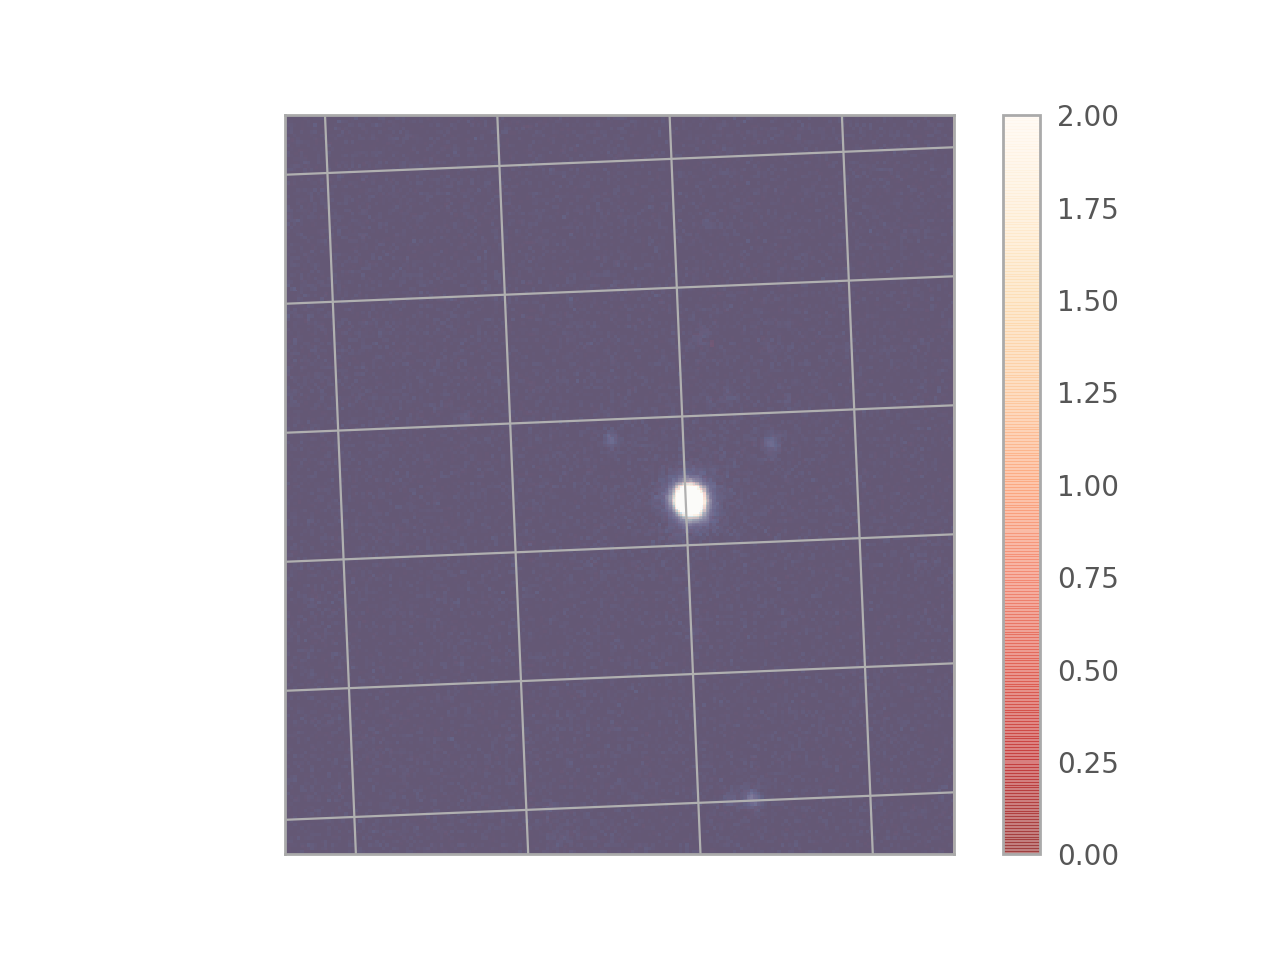

In [1664]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection=rwcs)
im = ax.imshow(rim, vmax=2, vmin=0, cmap='OrRd_r', alpha=0.5)
fig.colorbar(im)
ax.imshow(iim, transform=ax.get_transform(iwcs), cmap='Blues_r', alpha=0.5, vmin=0, vmax=2)

<IPython.core.display.Javascript object>


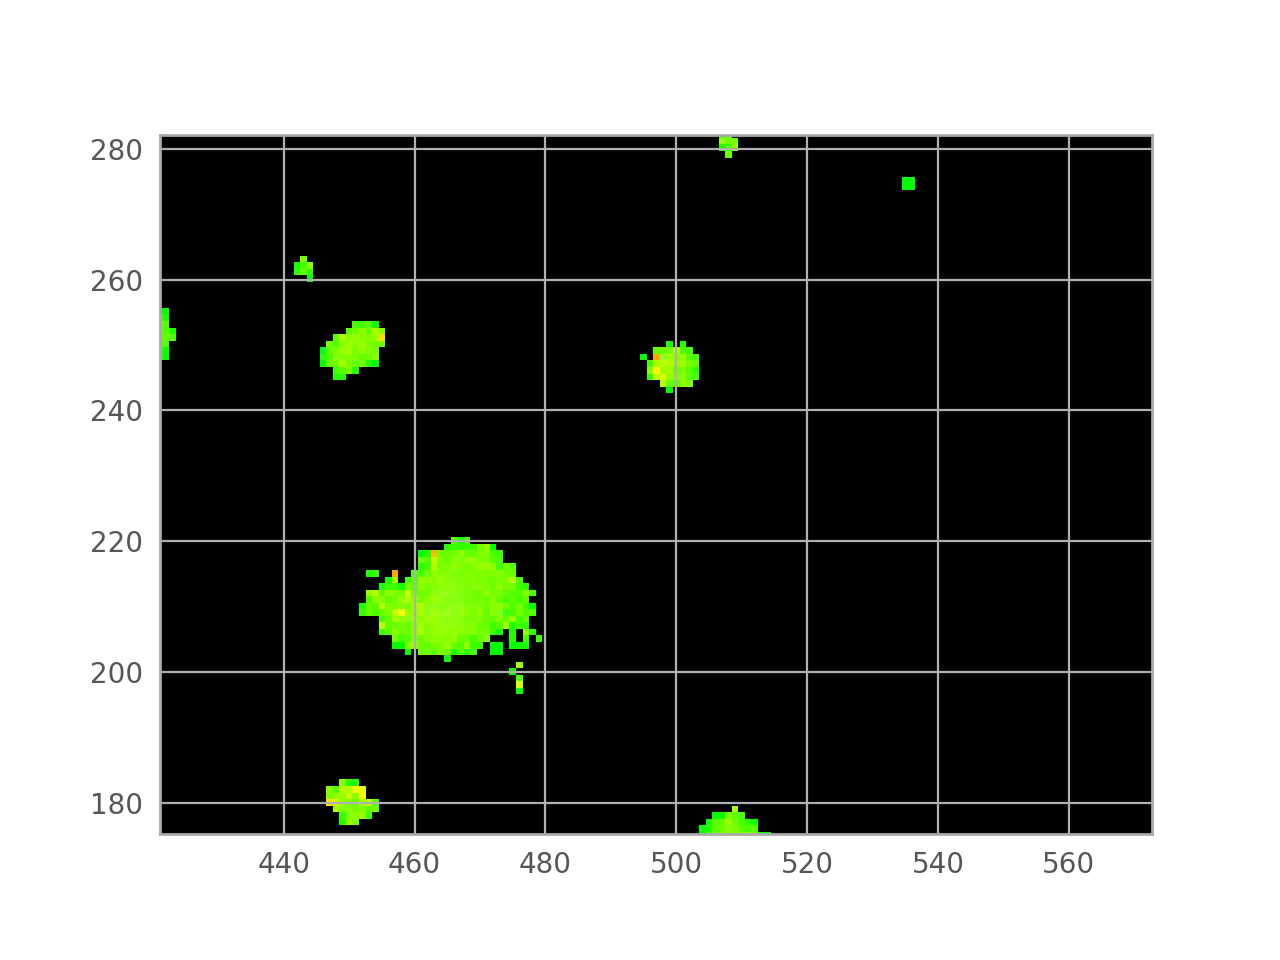

In [2104]:
# rim = fits.open('r.resamp.cut.fits')[0].data
# iim = fits.open(i_file)[0].data
# zim = fits.open('z.resamp.cut.fits')[0].data


%matplotlib notebook

rgb_default = make_lupton_rgb(rdata, idata, zdata, minimum=30, Q=0.1)
plt.imshow(rgb_default, origin='lower')